In [ ]:
!pip install neo4j
from neo4j import GraphDatabase
driver = GraphDatabase.driver("uri", auth=("neo4j", "password"))

In [ ]:
uri =       "uri"
username =  "username"
password =  "password"

In [ ]:
A=['PGM1-CDG','Cerebral cavernous malformations 3',"CLOVES syndrome","STT3B-CDG","Thoracolaryngopelvic dysplasia","Actinic prurigo","Non-syndromic polydactyly","Genitopatellar syndrome","Diaphanospondylodysostosis"]
B=['GARD0004329','GARD0018314',"GARD0010939","GARD0017603","GARD0005184", "GARD0017510","GARD0004410","GARD0010994","GARD0016674"]
for n in range(len(A)):
  disease= A[n]  #'Actinic prurigo' #'Non-syndromic polydactyly'   #'Cystic fibrosis'
  diseaseid=B[n] #'GARD0017510'
  #event_properties = {'GARDID': diseaseid ,'GARDname':disease }
  #create_Gard_node(event_properties)

# First part

In [ ]:
import pandas as pd
ClinicalTrial = pd.DataFrame()#pd.read_csv('/content/ClinicalTrial.csv')
Grant = pd.read_csv('/content/Grants.csv')#,  error_bad_lines=False)
Pubmed=pd.read_csv('/content/Pubmed.csv')

'''
data1=pd.read_csv('/content/pubmed1.csv')
data2=pd.read_csv('/content/pubmed2.csv')
data3=pd.read_csv('/content/pubmed3.csv')
data4=pd.read_csv('/content/Pubmed.csv')
data=pd.concat([data1,data2,data3,data4], ignore_index=True)
Pubmed = data.drop_duplicates()
Pubmed.index= range(Pubmed.shape[0])
'''
ClinicalTrial = ClinicalTrial.replace('"', '', regex=True)
Grant = Grant.replace('"', '', regex=True)
Pubmed = Pubmed.replace('"', '', regex=True)
print(ClinicalTrial.shape[0], Grant.shape[0], Pubmed.shape[0])

0 4 111


In [ ]:
A=['PGM1-CDG','Cerebral cavernous malformations 3',"CLOVES syndrome","STT3B-CDG","Thoracolaryngopelvic dysplasia","Actinic prurigo","Non-syndromic polydactyly","Genitopatellar syndrome","Diaphanospondylodysostosis"]
B=['GARD0004329','GARD0018314',"GARD0010939","GARD0017603","GARD0005184", "GARD0017510","GARD0004410","GARD0010994","GARD0016674"]


disease= 'Diaphanospondylodysostosis'   #'Cystic fibrosis'
diseaseid='GARD0016674'
#ClinicalTrial['GARDname']= disease
Grant['GARDname']= disease
Pubmed['GARDname']= disease

In [ ]:
print(ClinicalTrial.columns)
print(Grant.columns)
print(Pubmed.columns)

RangeIndex(start=0, stop=0, step=1)
Index(['pi.pi_name', 'pi.org_name', 'p.title', 'p.funding_year',
       'p.application_id', 'p.abstract', 'p.terms'],
      dtype='object')
Index(['ar.title', 'ar.pubmed_id', 'ar.abstractText', 'ar.publicationYear',
       'Keywords', 'a.fullName', 'a.affiliation'],
      dtype='object')


In [ ]:
rename_dict_1 = {
    'i.OfficialName':         'OfficialName',
    'i.OfficialAffiliation':  'OfficialAffiliation',
    'c. BriefTitle':       'BriefTitle',
    'c.OfficialTitle':    'OfficialTitle',
    'c.BriefSummary':     'BriefSummary',
    'c.NCTId':            'NCTId',
    'l.LocationCity':     'LocationCity',
    'l. LocationState':   'LocationState',
    'l.LocationCountry':  'LocationCountry',
    'l.LocationFacility': 'LocationFacility',
     'c.StartDate':     'StartDate' }

rename_dict_2 = {
    'pi.pi_name':           'pi_name',
    'pi.org_name':          'org_name',
    'p.title':              'title',
    'p.application_id':     'application_id',
    'p.abstract':           'abstract',
    'p.terms':              'terms',
    'p.funding_year':     'year'
}

rename_dict_3 = {
    'AuthorFullName':            'fullName'        ,
    'Title':              'title'       ,
    'AuthorAffiliation':        'affiliation'       ,
    'PubMedID':          'pubmed_id'      ,
    'Abstract':       'abstractText'     ,
    'Keywords':  'concatenatedKeywords',
    'ar.publicationYear':   'year'
}

rename_dict_3 = {
    'a.fullName':            'fullName'        ,
    'ar.title':              'title'       ,
    'a.affiliation':        'affiliation'       ,
    'ar.pubmed_id':          'pubmed_id'      ,
    'ar.abstractText':       'abstractText'     ,
    'Keywords':  'concatenatedKeywords',
    'ar.publicationYear':   'year'
}


# Rename the columns of each DataFrame
ClinicalTrial.rename(columns=rename_dict_1, inplace=True)
Grant.rename(columns=rename_dict_2, inplace=True)

Pubmed.rename(columns=rename_dict_3, inplace=True)

# Check the renamed columns
print("DF1 columns:", ClinicalTrial.columns)
print("DF2 columns:", Grant.columns)
print("DF3 columns:", Pubmed.columns)

DF1 columns: Index([], dtype='object')
DF2 columns: Index(['pi_name', 'org_name', 'title', 'year', 'application_id', 'abstract',
       'terms'],
      dtype='object')
DF3 columns: Index(['title', 'pubmed_id', 'abstractText', 'year', 'concatenatedKeywords',
       'fullName', 'affiliation'],
      dtype='object')


In [ ]:
def create_Gard_node(properties):
    with GraphDatabase.driver(uri, auth=(username, password)) as driver:
        with driver.session() as session:
            query = (
                "create (ga:Gard {"
                'GARDID: $GARDID,'
                'GARDname: $GARDname'
                "})"
            )
            session.run(query, **properties)
def create_ClinicalTrial_node(properties):
    with GraphDatabase.driver(uri, auth=(username, password)) as driver:
        with driver.session() as session:
            query = (
                "create (CT:ClinicalTrial {"
                'OfficialName: $OfficialName,'
                'OfficialAffiliation: $OfficialAffiliation,'
                'BriefTitle: $BriefTitle,'
                'OfficialTitle: $OfficialTitle,'
                'BriefSummary: $BriefSummary,'
                'NCTId: $NCTId,'
                'LocationCity: $LocationCity,'
                'LocationState: $LocationState,'
                'LocationCountry: $LocationCountry,'
                'LocationFacility: $LocationFacility,'
                'Interventions: $Interventions,'
                'GARDname: $GARDname,'
                 'year: $StartDate'
                "})"
            )
            session.run(query, **properties)

def create_ClinicalTrial_node(properties):
    with GraphDatabase.driver(uri, auth=(username, password)) as driver:
        with driver.session() as session:
            query = (
                "MERGE (CT:ClinicalTrial {"
                'NCTId: $NCTId'  # Unique identifier for the ClinicalTrial
                "}) "
                "ON CREATE SET "
                'CT.OfficialName = $OfficialName, '
                'CT.OfficialAffiliation = $OfficialAffiliation, '
                'CT.BriefTitle = $BriefTitle, '
                'CT.OfficialTitle = $OfficialTitle, '
                'CT.BriefSummary = $BriefSummary, '
                'CT.LocationCity = $LocationCity, '
                'CT.LocationState = $LocationState, '
                'CT.LocationCountry = $LocationCountry, '
                'CT.LocationFacility = $LocationFacility, '
                'CT.Interventions = $Interventions, '
                'CT.GARDname = $GARDname'
            )
            session.run(query, **properties)

def create_Grant_node(properties):
    with GraphDatabase.driver(uri, auth=(username, password)) as driver:
        with driver.session() as session:
            query = (
                "create (gr:Grant {"
    'pi_name: $pi_name,'
    'org_name: $org_name,'
    'title: $title,'
    'application_id: $application_id,'
    'abstract: $abstract,'
    'terms: $terms,'
    'GARDname: $GARDname,'
    'year: $year'
                "})"
            )
            session.run(query, **properties)
def create_Pubmed_node(properties):
    with GraphDatabase.driver(uri, auth=(username, password)) as driver:
        with driver.session() as session:
            query = (
                "create (pm:Pubmed {"
    'fullName: $fullName,'
    'ar_title: $ar_title,'
    'ar_affiliation: $ar_affiliation,'
    'pubmed_id: $pubmed_id,'
    'abstractText: $abstractText,'
    'concatenatedKeywords: $concatenatedKeywords,'
    'GARDname: $GARDname,'
     'year: $year'
                "})"
            )
            session.run(query, **properties)

In [ ]:
ClinicalTrial['StartDate'][2][-4:]

'2018'

In [ ]:
for i in range(len(ClinicalTrial)):
      event_properties = {
                'OfficialName': ClinicalTrial['OfficialName'][i],
                'OfficialAffiliation': ClinicalTrial['OfficialAffiliation'][i],
                'BriefTitle': ClinicalTrial['BriefTitle'][i],
                'OfficialTitle':ClinicalTrial['OfficialTitle'][i],
                'BriefSummary': ClinicalTrial['BriefSummary'][i],
                'NCTId': ClinicalTrial['NCTId'][i],
                'LocationCity': ClinicalTrial['LocationCity'][i],
                 'LocationState': ClinicalTrial['LocationState'][i],
                'LocationCountry': ClinicalTrial['LocationCountry'][i],
                'LocationFacility': ClinicalTrial['LocationFacility'][i],
                'Interventions': ClinicalTrial['Interventions'][i],
                'GARDname': ClinicalTrial['GARDname'][i],
                'year': ClinicalTrial['StartDate'][i][-4:]
        }
      create_ClinicalTrial_node(event_properties)
print('CT: finished')

for i in range(len(Grant)):
    event_properties = {
        'pi_name': str(Grant['pi_name'][i]),
        'org_name': str(Grant['org_name'][i]),
        'title': str(Grant['title'][i]),
        'application_id': str(Grant['application_id'][i]),
        'abstract': str(Grant['abstract'][i]),
        'terms': str(Grant['terms'][i]),
        'GARDname': Grant['GARDname'][i],
        'year': Grant['year'][i]
    }
    create_Grant_node(event_properties)
print('Grant: finished')

for i in range(len(Pubmed)):
    event_properties = {
        'fullName': Pubmed['fullName'][i],  # Convert to string
        'ar_title': Pubmed['title'][i],  # Convert to string
        'ar_affiliation': Pubmed['affiliation'][i],  # Convert to string
        'pubmed_id': Pubmed['pubmed_id'][i],  # Convert to string (or other appropriate type)
        'abstractText': Pubmed['abstractText'][i],  # Convert to string
        'concatenatedKeywords': Pubmed['concatenatedKeywords'][i],  # Convert to string
        'GARDname': Pubmed['GARDname'][i],  # Convert to string
        'year': Pubmed['year'][i]
    }
    create_Pubmed_node(event_properties)

print('Pubmed: finished')

CT: finished
Grant: finished
Pubmed: finished


In [ ]:
for i in range(len(Pubmed)):
    event_properties = {
        'fullName': Pubmed['fullName'][i],  # Convert to string
        'ar_title': Pubmed['title'][i],  # Convert to string
        'ar_affiliation': Pubmed['affiliation'][i],  # Convert to string
        'pubmed_id': Pubmed['pubmed_id'][i],  # Convert to string (or other appropriate type)
        'abstractText': Pubmed['abstractText'][i],  # Convert to string
        'concatenatedKeywords': Pubmed['concatenatedKeywords'][i],  # Convert to string
        'GARDname': Pubmed['GARDname'][i],  # Convert to string
        'year': Pubmed['year'][i]
    }
    create_Pubmed_node(event_properties)

print('Pubmed: finished')


Pubmed: finished


In [ ]:
#event_properties = {'GARDID': 'GARD0006233' ,'GARDname': 'Cystic fibrosis'}
event_properties = {'GARDID': diseaseid ,'GARDname': disease }
create_Gard_node(event_properties)

In [ ]:
def create_relationship_between_nodes(node1_label, node2_label, relationship_type):
    with driver.session() as session:
        query = (
        f"MATCH (n1:{node1_label}), (n2:{node2_label}) "
         f"WHERE n1.GARDname = n2.GARDname "
       f"CREATE (n1)-[:{relationship_type}]->(n2)"
        )
        session.run(query)


create_relationship_between_nodes('ClinicalTrial','Gard',  "RELATED_GARD")
create_relationship_between_nodes('Grant','Gard',  "RELATED_GARD")
create_relationship_between_nodes('Pubmed','Gard',  "RELATED_GARD")

In [ ]:
import pandas as pd
fips_finding=pd.read_csv('/content/uscities.csv')
fips_finding_dict=dict()
for i in fips_finding.index:
     fips_finding_dict[(fips_finding['city'][i].lower().strip(),fips_finding['state_name'][i].lower().strip() )]= ['{:0>5}'.format(fips_finding['county_fips'][i]),fips_finding['county_name'][i]]
     fips_finding_dict[fips_finding['city'][i].lower().strip()]= ['{:0>5}'.format(fips_finding['county_fips'][i]),fips_finding['county_name'][i]]

def find_fip(x,y):
 if y != None:
  try:
    return (fips_finding_dict[ (x.lower().strip(),y.lower().strip())][0]), fips_finding_dict[ (x.lower(),y.lower())][1]
  except:
    return  '',''
 else:
    try:
      return (fips_finding_dict[x.lower().strip()][0]),fips_finding_dict[ x.lower()][1]
    except:
      return  '',''

In [ ]:
def create_Researcher_node(properties):
    with GraphDatabase.driver(uri, auth=(username, password)) as driver:
        with driver.session() as session:
            query = (
                "MERGE (Re:Researcher {"
                    'Name: $Name,'
                    'Aff_name: $Aff_name'
                "}) "
                "ON CREATE SET "
                    "Re.Contact_info= $Contact_info,"
                    "Re.Aff_Zip = $Aff_Zip "

            )
            result = session.run(query, **properties)


def create_Location_node(properties, Name, Aff_name):
    with GraphDatabase.driver(uri, auth=(username, password)) as driver:
        with driver.session() as session:
            query = (
                "MERGE (Loc:Location {Aff_country: $Aff_country, Aff_state: $Aff_state, Aff_county: $Aff_county}) "
                "ON CREATE SET "
                "Loc.Aff_city = $Aff_city, "
                "Loc.Aff_FIPS = $Aff_FIPS "
                "WITH Loc "
                "MATCH (Re:Researcher {Name: $Name, Aff_name: $Aff_name}) "
                "CREATE (Re)-[:Researcher_location]->(Loc)"
            )
            # Execute the query, passing the properties dictionary and other parameters
            result = session.run(query, **properties, Name=Name, Aff_name=Aff_name)


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
nlp = spacy.load("en_core_web_sm")


def classify_entity(text):
    if not isinstance(text, str):  # Check if the input is a string
        return False
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            return True
    return False

display(classify_entity('Devon Leadman'))
classify_entity('NIH')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 100.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


True

False

In [ ]:
def extract_and_create_researcher_location_nodes_CT():
 with driver.session() as session:
  query = "MATCH (i:ClinicalTrial) where i.GARDname= $disease RETURN i.OfficialName AS OfficialName, i.OfficialAffiliation AS OfficialAffiliation, i.LocationCountry as LocationCountry, i.LocationCity as LocationCity,i.LocationState as LocationState"
  results = session.run(query, disease=disease)
  for ClinicalTrial in results:
   Name=  ClinicalTrial['OfficialName']
   Aff_name=   str(ClinicalTrial['OfficialAffiliation'])
   if  classify_entity(Name)==True and (Name, Aff_name) not in current_names:
    event_properties = {
        'Name': Name,
        'Contact_info': '',#str(ClinicalTrial['i.OfficialAffiliation'][i]),
        'Aff_name':Aff_name,
        'Aff_Zip': ''#str(ClinicalTrial['LocationZip'][i]),
    }
    create_Researcher_node(event_properties)
    city_  = str(ClinicalTrial['LocationCity']).lower().strip()
    State_ = str(ClinicalTrial['LocationState']).lower().strip()
    event_properties = {
        'Aff_country': str(ClinicalTrial['LocationCountry']),
        'Aff_state': State_,
        'Aff_county': find_fip(city_, State_ )[1] ,
        'Aff_city': city_,
        'Aff_FIPS': find_fip(city_, State_ )[0]
    }
    create_Location_node(event_properties, Name, Aff_name)
    current_names[(Name, Aff_name)] =1

current_names={}
extract_and_create_researcher_location_nodes_CT()

In [ ]:
#!pip install torch torchvision torchaudio
!pip install locationtagger
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install lxml[html_clean]
import nltk
import spacy
# essential entity models downloads
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')
import locationtagger

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 85.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 100.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 9.6 MB/s eta 0:00:00
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13539 sha256=45ef9d13fb1df74d0d81473dadbaabf6e2ca305ea57b3a776adc8affd38d45d7
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3342 sha256=

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
import nltk
nltk.download('all')

states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]
states_lower = [state.lower() for state in states]
states_lower_set = set(state.lower() for state in states)

def location_information(j):
 if j:
    place_entity = locationtagger.find_locations(text=j)
    if place_entity.countries and place_entity.countries[0] != 'United States':
       if place_entity.countries:country = place_entity.countries[0]
       else:country = None  # or some default value
       if place_entity.regions:region = place_entity.regions[0]
       else: region = None  # or some default value
       if place_entity.cities: city = place_entity.cities[0]
       else:city = None  # or some default value
       return country, region, city
    else:
     if place_entity.countries or (place_entity.regions and place_entity.regions[0].lower() in states_lower_set):
        # If country is specified as US or region matches a state, proceed
        city_lower=None
        for i in reversed(place_entity.cities):
            city_lower = i.lower()
            if city_lower in fips_finding_dict and city_lower not in ['hospital', 'university']:
                   break
        if place_entity.countries:country = place_entity.countries[0]
        else:country = None  # or some default value
        if place_entity.regions:region = place_entity.regions[0]
        else: region = None  # or some default value
        if city_lower: city = city_lower
        else:city = None  # or some default value
        return country, region, city
    return None, None, None
 return None, None, None

def extract_and_create_researcher_location_nodes_PubMed():
 with GraphDatabase.driver(uri, auth=(username, password)) as driver:

  with driver.session() as session:
   query = "MATCH (i:Pubmed)  where i.GARDname= $disease RETURN i.fullName AS fullName, i.ar_affiliation AS affiliation"
   results = session.run(query, disease=disease)
   for Pubmed in results:
    A,B=Pubmed['fullName'], str(Pubmed['affiliation'])
    if  (A, B) not in current_names:
     if B in pubmed_institution:
        place_entity=pubmed_institution[B]
     else:
       place_entity =location_information(B)
       pubmed_institution[B]= place_entity

     event_properties = {
        'Name': str(A),
        'Contact_info': '',#str(Pubmed['i.OfficialAffiliation'][i]),
        'Aff_name': B,
        'Aff_Zip': ''  }
     create_Researcher_node(event_properties)
     current_names[(A, B)] =1
     if place_entity[0] != None and place_entity[1] !=  None and place_entity[2] !=  None:
      event_properties = {
         'Aff_country': place_entity[0],
        'Aff_state':   place_entity[1],
        'Aff_county': find_fip(place_entity[2], place_entity[1] )[1],
        'Aff_city': place_entity[2],
        'Aff_FIPS': find_fip(place_entity[2], place_entity[1] )[0]  }
      create_Location_node(event_properties, A, B)

pubmed_institution={}
current_names={}
extract_and_create_researcher_location_nodes_PubMed()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

In [ ]:
import pandas as pd
organ_address=pd.read_csv('/content/Grant_org1.csv')
organ_address['n.org_name']=organ_address.apply(lambda x: x['n.org_name'].replace('"','').lower().strip(),axis=1)

def extract_and_create_researcher_location_nodes_Grant():
 with driver.session() as session:
  query = "MATCH (i:Grant)  where i.GARDname= $disease RETURN i.org_name AS org_name, i.pi_name AS pi_name"
  results = session.run(query, disease=disease)
  for Grant in results:
   Name= Grant['pi_name']
   Aff_name= str(Grant['org_name'])
   if (Name, Aff_name) not in current_names:
     data=organ_address[organ_address['n.org_name'] == Grant['org_name'].lower().strip()]
     '''
      or
      from geopy.geocoders import Nominatim
      geolocator = Nominatim(user_agent="GetLoc", timeout=30)  # You can adjust the timeout value as needed
      location = geolocator.geocode('NIH')
      if location:
              address = location.address.split(", ")
              data={}
              data['Country'] = address[-1]
              data['zip_code'] = address[-2]
              data['state']  = address[-3]  # Massachusetts (state)
              data['County'] = address[-4]  # Massachusetts (state)
              data['city'] = address[-5]  # Boston (city)
     '''
     if len(data) >0 :
       event_properties = {
        'Name': Name,
        'Contact_info': '',
        'Aff_name': Aff_name,
        'Aff_Zip':  data.iloc[0]['zip_code']
       }
       create_Researcher_node(event_properties)
       A,B,C=data.iloc[0]['Country'], data.iloc[0]['state'], data.iloc[0]['County']
       if  type(A)==str and type(B)==str and type(C) == str:
        event_properties = {
        'Aff_country': A ,
        'Aff_state': B,
        'Aff_county': C,
        'Aff_city': data.iloc[0]['city'],
        'Aff_FIPS': find_fip(data.iloc[0]['city'], data.iloc[0]['state'] )[0]
        }
        create_Location_node(event_properties, Name, Aff_name)
     else:
         event_properties = {'Name': Name,'Contact_info': '', 'Aff_name': Aff_name, 'Aff_Zip': ''    }
         create_Researcher_node(event_properties)
     current_names[(Name, Aff_name)] =1

current_names={}
extract_and_create_researcher_location_nodes_Grant()

In [ ]:
def create_relationship_between_nodes_1(node1_label, node2_label, relationship_type):
    with driver.session() as session:
        query = (
            f"MATCH (n1:{node1_label}), (n2:{node2_label}) "
            f"WHERE n1.Name = n2.OfficialName AND n1.Aff_name = n2.OfficialAffiliation "
            f"CREATE (n1)-[:{relationship_type}]->(n2)"
        )
        session.run(query)
def create_relationship_between_nodes_2(node1_label, node2_label, relationship_type):
    with driver.session() as session:
        query = (
        f"MATCH (n1:{node1_label}), (n2:{node2_label}) "
        f"WHERE n1.Name = n2.pi_name and  n1.Aff_name= n2.org_name "
       f"CREATE (n1)-[:{relationship_type}]->(n2)"
        )
        session.run(query)
def create_relationship_between_nodes_3(node1_label, node2_label, relationship_type):
  with GraphDatabase.driver(uri, auth=(username, password)) as driver:
    with driver.session() as session:
        query = (
        f"MATCH (n1:{node1_label}), (n2:{node2_label}) "
        f"WHERE n1.Name = n2.fullName and  n1.Aff_name= n2.ar_affiliation "
       f"CREATE (n1)-[:{relationship_type}]->(n2)"
        )
        session.run(query)

create_relationship_between_nodes_1('Researcher','ClinicalTrial',  "Involves_Researcher_ct")

create_relationship_between_nodes_2('Researcher','Grant',  "Involves_Researcher_g")
create_relationship_between_nodes_3('Researcher','Pubmed',  "Involves_Researcher_p")

In [ ]:
#faster way
def find_coauthors(df, name, affiliation, title):
    coauthors_dict = {}
    connection = {}
    # Group rows by title
    grouped = df.groupby(title)
    for title_value, group in grouped:
        author_affiliation_set = set()

        for _, row in group.iterrows():
            author = (row[name], row[affiliation])

            # Skip if author name or affiliation is empty
            if not all(author):
                continue

            # If the author is not already seen for this title
            if author not in author_affiliation_set:
                author_affiliation_set.add(author)
            else:
                # This author has already been considered for this title
                continue

            # Add author to coauthors_dict if not already present
            if author not in coauthors_dict:
                coauthors_dict[author] = []

            # Find co-authors within the same title group
            coauthors = group[(group[name] != row[name]) | (group[affiliation] != row[affiliation])]
            for _, coauthor_row in coauthors.iterrows():
                coauthor = (coauthor_row[name], coauthor_row[affiliation])

                # Skip if coauthor name or affiliation is empty
                if not all(coauthor):
                    continue

                # Avoid duplicates
                if coauthor not in coauthors_dict[author]:
                    coauthors_dict[author].append(coauthor)

                # Update connection count
                connection[(author, coauthor)] = connection.get((author, coauthor), 0) + 1

    return coauthors_dict, connection
import time
from collections import defaultdict

def merge_dicts(d1, d2):
    combined_dict = defaultdict(set)
    for key, values in d1.items():
        combined_dict[key].update(values)
    for key, values in d2.items():
        combined_dict[key].update(values)
    return combined_dict



def sum_dicts(dict1, dict2):
    result_dict = {}
    all_keys = set(dict1.keys()) | set(dict2.keys())
    for key in all_keys:
        value1 = dict1.get(key, 0)
        value2 = dict2.get(key, 0)
        result_dict[key] = value1 + value2
    return result_dict
def extract_and_create_researcher_connection(disease):
 with driver.session() as session:
  query = "MATCH (i:ClinicalTrial)--(g:Gard) where g.GARDname= $disease  RETURN i.OfficialName AS OfficialName, i.OfficialAffiliation AS OfficialAffiliation, i.NCTId as NCTId "
  results = session.run(query, disease=disease)
  data = [record.data() for record in results]  # Convert result to a list of dictionaries
  ClinicalTrial = pd.DataFrame(data)
  print("--- start ---")
  start_time = time.time()
  a,a1=find_coauthors(ClinicalTrial,'OfficialName','OfficialAffiliation','NCTId')
  print("--- %s seconds ---" % (time.time() - start_time))
  ######   Grant
  query = "MATCH (i:Grant)--(g:Gard) where g.GARDname= $disease  RETURN i.pi_name AS pi_name, i.org_name AS org_name, i.application_id as application_id "
  results = session.run(query, disease=disease)
  data = [record.data() for record in results]  # Convert result to a list of dictionaries
  Grant = pd.DataFrame(data)
  start_time = time.time()
  b,b1=find_coauthors(Grant,'pi_name','org_name','application_id')
  print("--- %s seconds ---" % (time.time() - start_time))
  ##################### pubmed
  query = "MATCH (i:Pubmed)--(g:Gard) where g.GARDname= $disease  RETURN i.fullName AS fullName, i.ar_affiliation AS affiliation, i.pubmed_id as pubmed_id "
  results = session.run(query, disease=disease)
  data = [record.data() for record in results]  # Convert result to a list of dictionaries
  Pubmed = pd.DataFrame(data)
  start_time = time.time()
  c,c1=find_coauthors(Pubmed,'fullName','affiliation','pubmed_id')
  print("--- %s seconds ---" % (time.time() - start_time))
  ###################
  combined_dict = merge_dicts(a, b)
  combined_dict = merge_dicts(combined_dict, c)
  ###########
  combined_dict1 = sum_dicts(a1, b1)
  result_dict1 = sum_dicts(combined_dict1, c1)
  for key in result_dict1:
    result_dict1[key] = result_dict1[key] %1000
  ###########
  result_dict = {key: list(values) for key, values in combined_dict.items()}
  return combined_dict, result_dict1, a,a1,b,b1,c,c1
result_dict, result_dict1, a,a1,b,b1,c,c1=extract_and_create_researcher_connection(disease)


--- start ---
--- 0.014131784439086914 seconds ---
--- 0.005818605422973633 seconds ---
--- 0.5867185592651367 seconds ---


# Figures

--- start ---
--- 0.0035042762756347656 seconds ---
--- 0.0071222782135009766 seconds ---
--- 0.5973477363586426 seconds ---


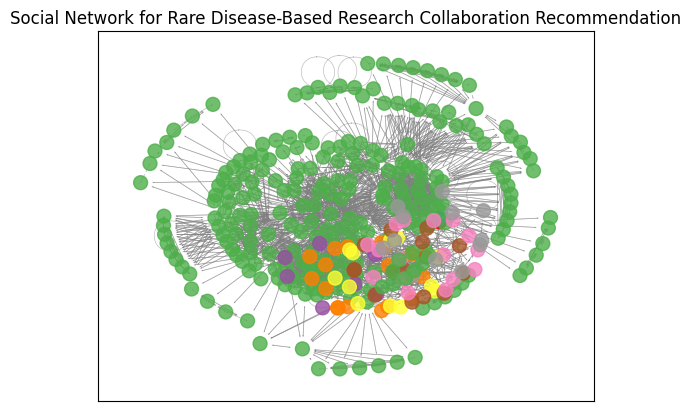

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
A=['PGM1-CDG','Cerebral cavernous malformations 3',"CLOVES syndrome","STT3B-CDG","Thoracolaryngopelvic dysplasia","Actinic prurigo","Non-syndromic polydactyly","Genitopatellar syndrome","Diaphanospondylodysostosis"]
B=['GARD0004329','GARD0018314',"GARD0010939","GARD0017603","GARD0005184", "GARD0017510","GARD0004410","GARD0010994","GARD0016674"]
#for n in range(len(A)):
n=0
disease= A[n]  #'Actinic prurigo' #'Non-syndromic polydactyly'   #'Cystic fibrosis'
diseaseid=B[n] #'GARD0017510'
result_dict, result_dict1, a,a1,b,b1,c,c1=extract_and_create_researcher_connection(disease)
import networkx as nx
layout_algorithms = [
    nx.circular_layout,
    nx.random_layout,
    nx.spring_layout,
    nx.spectral_layout,
    nx.shell_layout,
    nx.bipartite_layout,
    nx.planar_layout,
    nx.fruchterman_reingold_layout,
    nx.kamada_kawai_layout
]
data= dict(list(result_dict.items()))
G = nx.DiGraph()

# Add nodes and edges from the dictionary
for nodes, edges in data.items():
    G.add_node(nodes[0], institution=nodes[1])
    for edge in edges:
        G.add_node(edge[0], institution=edge[1])
        G.add_edge(nodes[0], edge[0])

# Determine connected components
components = list(nx.strongly_connected_components(G))
# Assign colors to nodes based on connected components
color_map = {}
for i, component in enumerate(components):
    for node in component:
        color_map[node] = plt.cm.Set1(i / len(components))  # Set1 colormap for variety

# Draw the graph with enhanced styling
#fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

#pos = nx.spring_layout(G, seed=42, k=1, iterations=1)
pos = nx.kamada_kawai_layout(G)

# Node styling with specified colors
node_colors = [color_map[node] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, alpha=0.8)
# Edge styling
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=1)
# Label styling
#labels = {node: f"{node[:10]}\n{G.nodes[node]['institution'][-25:]}" for node in G.nodes}
#nx.draw_networkx_labels(G, pos,  font_size=6, font_color='black')
# Add a title
plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")
# Show the plot
plt.show()

<ipython-input-16-93c7e8736fc9>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)  # Set color map
<ipython-input-16-93c7e8736fc9>:27: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)


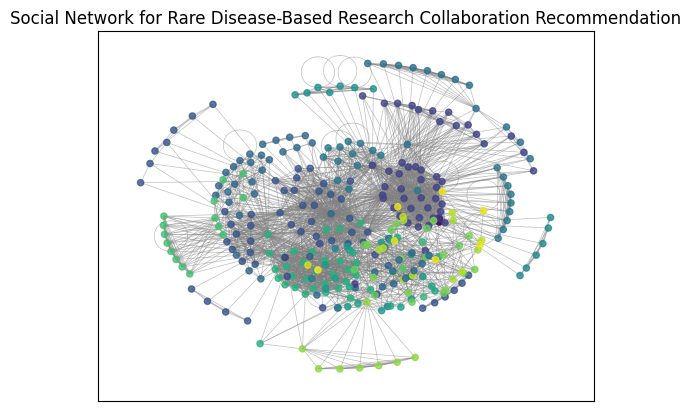

In [ ]:
!pip install python-louvain
import networkx as nx
import community
from community import community_louvain
import matplotlib.pyplot as plt


# Create a directed graph
G = nx.Graph()

# Add nodes and edges from the dictionary
for nodes, edges in result_dict.items():
    G.add_node(nodes[0], institution=nodes[1])
    #G.add_node(nodes[0], institution=nodes[1])
    for edge in edges:
        G.add_node(edge[0], institution=edge[1])
        G.add_edge(nodes[0], edge[0])

# Detect communities using Louvain method
partition = community_louvain.best_partition(G)

# Draw the graph with nodes colored by their community
pos = nx.kamada_kawai_layout(G)
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)  # Set color map
#nx.draw(G, pos, node_color=[cmap(partition[node]) for node in G.nodes()], with_labels=None)
nx.draw_networkx_nodes(G, pos, node_size=20, node_color=[cmap(partition[node]) for node in G.nodes()], alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)
plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")

plt.show()

<ipython-input-17-aa36fe27ad45>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)  # Set color map
<ipython-input-17-aa36fe27ad45>:23: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)


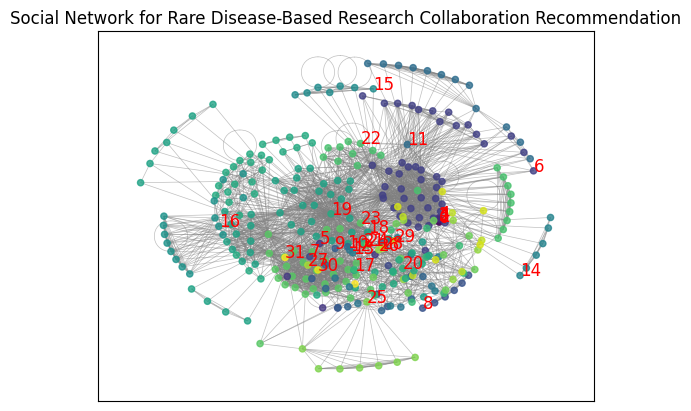

In [ ]:
import networkx as nx
import community
from community import community_louvain
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.Graph()

# Add nodes and edges from the dictionary
for nodes, edges in result_dict.items():
    G.add_node(nodes[0], institution=nodes[1])
    for edge in edges:
        G.add_node(edge[0], institution=edge[1])
        G.add_edge(nodes[0], edge[0])

# Detect communities using Louvain method
partition = community_louvain.best_partition(G)

# Draw the graph with nodes colored by their community
pos = nx.kamada_kawai_layout(G)
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)  # Set color map
nx.draw_networkx_nodes(G, pos, node_size=20, node_color=[cmap(partition[node]) for node in G.nodes()], alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=0.02)

# Label one node per community with its community partition value near its community
community_labels = {}
for node, community_id in partition.items():
    if community_id not in community_labels:
        community_labels[community_id] = node

for community_id, node in community_labels.items():
    x, y = pos[node]
    plt.text(x, y, str(community_id), fontsize=12, color='red')

plt.title("Social Network for Rare Disease-Based Research Collaboration Recommendation")
plt.show()



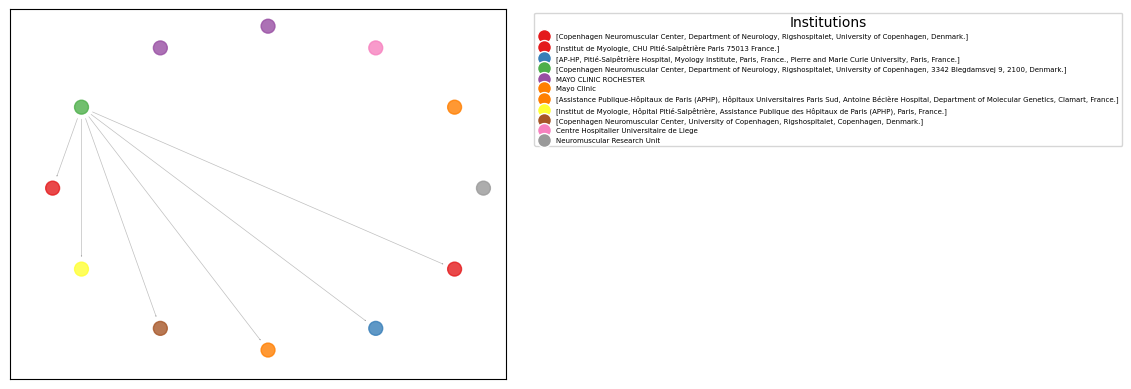

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Your provided dictionary
data= dict(list(result_dict.items())[:6])

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from the dictionary
for nodes, edges in data.items():
    G.add_node(nodes[0], institution=nodes[1])
    for edge in edges:
        G.add_node(edge[0], institution=edge[1])
        G.add_edge(nodes[0], edge[0])

unique_institutions = set(nx.get_node_attributes(G, 'institution').values())

# Assign colors to nodes based on institutions
color_map = {}
for i, institution in enumerate(unique_institutions):
    nodes_with_institution = [node for node, data in G.nodes(data=True) if data['institution'] == institution]
    for node in nodes_with_institution:
        color_map[node] = plt.cm.Set1(i / len(unique_institutions))
# Draw the graph with enhanced styling
#fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size

# Draw the graph with enhanced styling
#pos = nx.spring_layout(G , seed=42, k=1, iterations=1)
pos = layout_algorithms[0](G)

# Node styling with specified colors
node_colors = [color_map[node] for node in G.nodes]
nodes = nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, alpha=0.8)
# Rest of the code remains the same
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=1)

# Create a legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.Set1(i / len(unique_institutions)), markersize=10, label=institution) for i, institution in enumerate(unique_institutions)]
plt.legend(handles=legend_handles, title='Institutions', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=5)

# Label styling without displaying the institution names
#labels = {node: node for node in G.nodes}
#nx.draw_networkx_labels(G, pos, labels=labels, font_size=5, font_color='black')

# Show the plot
plt.show()

<ipython-input-19-68fd65e7945f>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(unique_institutions))


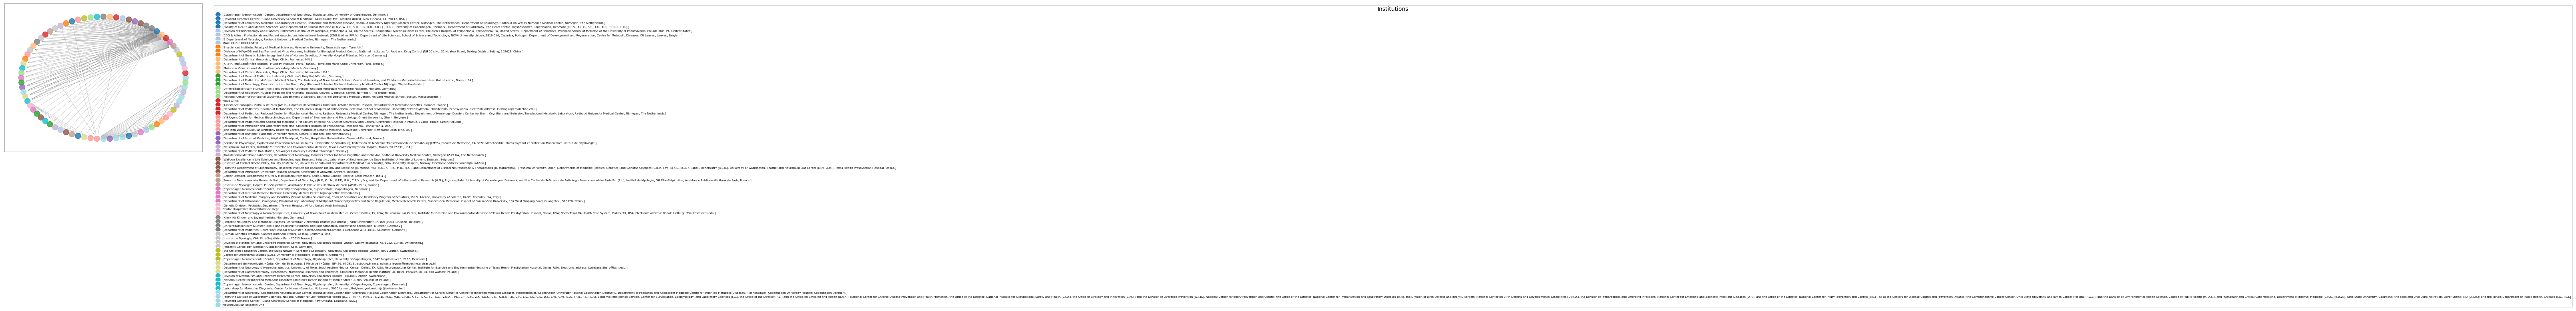

In [ ]:

# Define a colormap with enough distinct colors
cmap = plt.cm.get_cmap('tab20', len(unique_institutions))

# Assign colors to nodes based on institutions
color_map = {}
for i, institution in enumerate(unique_institutions):
    nodes_with_institution = [node for node, data in G.nodes(data=True) if data['institution'] == institution]
    for node in nodes_with_institution:
        color_map[node] = cmap(i)

# Draw the graph with enhanced styling
#pos = nx.spring_layout(G, seed=42, k=1, iterations=1)
pos=layout_algorithms[0](G)
# Node styling with specified colors
node_colors = [color_map[node] for node in G.nodes]
nodes = nx.draw_networkx_nodes(G, pos, node_size=100, node_color=node_colors, alpha=0.8)

# Rest of the code remains the same
nx.draw_networkx_edges(G, pos, edge_color='gray', width=0.5, alpha=0.5, arrowsize=1)

# Create a legend
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i), markersize=10, label=institution) for i, institution in enumerate(unique_institutions)]
plt.legend(handles=legend_handles, title='Institutions', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=5)

# Show the plot
plt.show()

In [ ]:
def create_relationship_between_Researchers(n1_Name, n1_Aff_name, n2_Name, n2_Aff_name, num_colab):
    with driver.session() as session:
        # Check if the relationship already exists in either direction
        check_query = (
            "MATCH (n1:Researcher)-[r:Collaborated_With]->(n2:Researcher) "
            "WHERE (n1.Name = $n1_Name AND n1.Aff_name = $n1_Aff_name AND n2.Name = $n2_Name AND n2.Aff_name = $n2_Aff_name) "
            "OR (n2.Name = $n1_Name AND n2.Aff_name = $n1_Aff_name AND n1.Name = $n2_Name AND n1.Aff_name = $n2_Aff_name) "
            "RETURN COUNT(r) AS relationship_count"
        )

        result = session.run(check_query, n1_Name=n1_Name, n1_Aff_name=n1_Aff_name, n2_Name=n2_Name, n2_Aff_name=n2_Aff_name)
        relationship_count = result.single()["relationship_count"]

        # If the relationship doesn't exist, create it
        if relationship_count == 0:
            create_query = (
                "MATCH (n1:Researcher), (n2:Researcher) "
                "WHERE n1.Name = $n1_Name AND n1.Aff_name = $n1_Aff_name "
                "AND n2.Name = $n2_Name AND n2.Aff_name = $n2_Aff_name "
                "CREATE (n1)-[:Collaborated_With {num_colab: $num_colab}]->(n2)"
            )
            session.run(create_query, n1_Name=n1_Name, n1_Aff_name=n1_Aff_name, n2_Name=n2_Name, n2_Aff_name=n2_Aff_name, num_colab=num_colab)


for key in result_dict1:
    create_relationship_between_Researchers(key[0][0], key[0][1], key[1][0], key[1][1], result_dict1[key])

# Us map

In [ ]:
A=['PGM1-CDG','Cerebral cavernous malformations 3',"CLOVES syndrome","STT3B-CDG","Thoracolaryngopelvic dysplasia","Actinic prurigo","Non-syndromic polydactyly","Genitopatellar syndrome","Diaphanospondylodysostosis"]
B=['GARD0004329','GARD0018314',"GARD0010939","GARD0017603","GARD0005184", "GARD0017510","GARD0004410","GARD0010994","GARD0016674"]
disease= A[0]  #'Actinic prurigo' #'Non-syndromic polydactyly'   #'Cystic fibrosis'
diseaseid=B[0] #'GARD0017510'

In [ ]:
!pip install python-louvain
import networkx as nx
layout_algorithms = [
    nx.circular_layout,
    nx.random_layout,
    nx.spring_layout,
    nx.spectral_layout,
    nx.shell_layout,
    nx.bipartite_layout,
    nx.planar_layout,
    nx.fruchterman_reingold_layout,
    nx.kamada_kawai_layout
]

In [ ]:
#faster way
import pandas as pd
def find_coauthors(df, name, affiliation, title):
    coauthors_dict = {}
    connection = {}
    # Group rows by title
    grouped = df.groupby(title)
    for title_value, group in grouped:
        author_affiliation_set = set()

        for _, row in group.iterrows():
            author = (row[name], row[affiliation])

            # Skip if author name or affiliation is empty
            if not all(author):
                continue

            # If the author is not already seen for this title
            if author not in author_affiliation_set:
                author_affiliation_set.add(author)
            else:
                # This author has already been considered for this title
                continue

            # Add author to coauthors_dict if not already present
            if author not in coauthors_dict:
                coauthors_dict[author] = []

            # Find co-authors within the same title group
            coauthors = group[(group[name] != row[name]) | (group[affiliation] != row[affiliation])]
            for _, coauthor_row in coauthors.iterrows():
                coauthor = (coauthor_row[name], coauthor_row[affiliation])

                # Skip if coauthor name or affiliation is empty
                if not all(coauthor):
                    continue

                # Avoid duplicates
                if coauthor not in coauthors_dict[author]:
                    coauthors_dict[author].append(coauthor)

                # Update connection count
                connection[(author, coauthor)] = connection.get((author, coauthor), 0) + 1

    return coauthors_dict, connection
import time
from collections import defaultdict

def merge_dicts(d1, d2):
    combined_dict = defaultdict(set)
    for key, values in d1.items():
        combined_dict[key].update(values)
    for key, values in d2.items():
        combined_dict[key].update(values)
    return combined_dict



def sum_dicts(dict1, dict2):
    result_dict = {}
    all_keys = set(dict1.keys()) | set(dict2.keys())
    for key in all_keys:
        value1 = dict1.get(key, 0)
        value2 = dict2.get(key, 0)
        result_dict[key] = value1 + value2
    return result_dict
def extract_and_create_researcher_connection(disease):
 with GraphDatabase.driver(uri, auth=(username, password)) as driver:
  with driver.session() as session:
   query = "MATCH (l:Location)--(r:Researcher)--(i:ClinicalTrial)--(g:Gard) where g.GARDname= $disease and COALESCE(size(l.Aff_FIPS), 0) > 3    RETURN i.OfficialName AS OfficialName, i.OfficialAffiliation AS OfficialAffiliation, i.NCTId as NCTId, l.Aff_FIPS as FIPS "
   results = session.run(query, disease=disease)
   data = [record.data() for record in results]  # Convert result to a list of dictionaries
   ClinicalTrial = pd.DataFrame(data)
   print("--- start ---")
   start_time = time.time()
   if ClinicalTrial.shape[0]>0: a,a1=find_coauthors(ClinicalTrial,'OfficialName','OfficialAffiliation','NCTId')
   else: a,a1=pd.DataFrame(),pd.DataFrame()
   print("--- %s seconds ---" % (time.time() - start_time))
   ######   Grant
   query = "MATCH (l:Location)--(r:Researcher)--(i:Grant)--(g:Gard) where g.GARDname= $disease and COALESCE(size(l.Aff_FIPS), 0) > 3    RETURN i.pi_name AS pi_name, i.org_name AS org_name, i.application_id as application_id , l.Aff_FIPS as FIPS "
   results = session.run(query, disease=disease)
   data = [record.data() for record in results]  # Convert result to a list of dictionaries
   Grant = pd.DataFrame(data)
   start_time = time.time()
   if Grant.shape[0]>0:b,b1=find_coauthors(Grant,'pi_name','org_name','application_id')
   else: b,b1=pd.DataFrame(),pd.DataFrame()
   print("--- %s seconds ---" % (time.time() - start_time))
   ##################### pubmed
   query = "MATCH (l:Location)--(r:Researcher)--(i:Pubmed)--(g:Gard) where g.GARDname= $disease and COALESCE(size(l.Aff_FIPS), 0) > 3   RETURN i.fullName AS fullName, i.ar_affiliation AS affiliation, i.pubmed_id as pubmed_id, l.Aff_FIPS as FIPS "
   results = session.run(query, disease=disease)
   data = [record.data() for record in results]  # Convert result to a list of dictionaries
   Pubmed = pd.DataFrame(data)
   start_time = time.time()
   if Pubmed.shape[0]>0:c,c1=find_coauthors(Pubmed,'fullName','affiliation','pubmed_id')
   else: c,c1=pd.DataFrame(),pd.DataFrame()
   print("--- %s seconds ---" % (time.time() - start_time))
   ###################
   combined_dict = merge_dicts(a, b)
   combined_dict = merge_dicts(combined_dict, c)
   ###########
   combined_dict1 = sum_dicts(a1, b1)
   result_dict1 = sum_dicts(combined_dict1, c1)
   for key in result_dict1:
    result_dict1[key] = result_dict1[key] %1000
   ###########
   result_dict = {key: list(values) for key, values in combined_dict.items()}
   return combined_dict, result_dict1, a,a1,b,b1,c,c1
disease= A[0]
result_dict, result_dict1, a,a1,b,b1,c,c1=extract_and_create_researcher_connection(disease)
print(len(result_dict))

--- start ---
--- 0.0020461082458496094 seconds ---
--- 0.009773492813110352 seconds ---
--- 0.004009723663330078 seconds ---
6


In [ ]:
import networkx as nx
import community
from community import community_louvain
import matplotlib.pyplot as plt
# Create a directed graph
G = nx.Graph()
# Add nodes and edges from the dictionary
for nodes, edges in result_dict.items():
    G.add_node(nodes)
    for edge in edges:
        G.add_node(edge)
        G.add_edge(nodes, edge)

# Detect communities using Louvain method
partition = community_louvain.best_partition(G)
data_table = pd.DataFrame(partition.items(), columns=['name', 'Community'])
data_table['network']=data_table.apply(lambda x: result_dict[x['name']] ,axis=1)
index_community_detection= list(set(data_table[data_table['network']!=set()]['Community'].values))

In [ ]:
data_table

,name,Community,network
0,"(Eva Morava-Kozicz, Mayo Clinic)",0,{}
1,"(FREEZE, HUDSON H., MAYO CLINIC ROCHESTER)",1,{}
2,"(MORAVA-KOZICZ, EVA, MAYO CLINIC ROCHESTER)",2,{}
3,"(Ackermann AM, [Division of Endocrinology and ...",3,{}
4,"(Kronn D, [Department of Pediatrics, New York ...",4,{}
5,"(Morava E, [Department of Clinical Genomics, M...",5,{}


In [ ]:
def merge_community_detection_and_researchers_info(disease):
 with GraphDatabase.driver(uri, auth=(username, password)) as driver:
  with driver.session() as session:
   query = "MATCH (l:Location)--(r:Researcher)--(i:ClinicalTrial)--(g:Gard) WHERE g.GARDname= $disease and COALESCE(size(l.Aff_FIPS), 0) > 3 RETURN i.OfficialName as OfficialName , i.OfficialAffiliation as OfficialAffiliation, i.OfficialTitle as OfficialTitle  ,i.Interventions as concatenatedInterventions, i.BriefSummary as BriefSummary, l.Aff_FIPS as FIPS"
   results = session.run(query, disease=disease)
   data = [record.data() for record in results]  # Convert result to a list of dictionaries
   if data==[]:  ClinicalTrial = pd.DataFrame(columns=["OfficialName", "OfficialAffiliation", "OfficialTitle", "concatenatedInterventions", "BriefSummary,FIPS"])
   else: ClinicalTrial = pd.DataFrame(data)
   ######   Grant
   query = "MATCH (l:Location)--(r:Researcher)--(i:Grant)--(g:Gard) WHERE g.GARDname= $disease and COALESCE(size(l.Aff_FIPS), 0) > 3 RETURN i.pi_name as pi_name,i.org_name as org_name,i.title as title ,i.terms as terms,i.abstract as abstract, l.Aff_FIPS as FIPS"
   results = session.run(query, disease=disease)
   data = [record.data() for record in results]  # Convert result to a list of dictionaries

   if data==[]:  Grant = pd.DataFrame(columns=["pi_name", "org_name", "title", "terms", "abstract","FIPS"])
   else: Grant = pd.DataFrame(data)
   ##################### pubmed
   query = "MATCH (l:Location)--(r:Researcher)--(i:Pubmed)--(g:Gard) WHERE g.GARDname= $disease and COALESCE(size(l.Aff_FIPS), 0) > 3 RETURN i.fullName as fullName, i.ar_affiliation as affiliation, i.title as title, i.concatenatedKeywords as concatenatedKeywords,i.abstractText as abstractText, l.Aff_FIPS as FIPS "
   results = session.run(query, disease=disease)
   data = [record.data() for record in results]  # Convert result to a list of dictionaries

   if data==[]:  Pubmed = pd.DataFrame(columns=["fullName", "affiliation", "title", "concatenatedKeywords","abstractText", "FIPS"])
   else: Pubmed = pd.DataFrame(data)
   ################
   if ClinicalTrial.shape[0]>0:  ClinicalTrial['name'] = ClinicalTrial.apply(lambda row: (row['OfficialName'], row['OfficialAffiliation']), axis=1)
   else: ClinicalTrial['name'] = None
   if Grant.shape[0]>0:          Grant['name'] = Grant.apply(lambda row: (row['pi_name'], row['org_name']), axis=1)
   else: Grant['name'] = None
   if Pubmed.shape[0]>0:         Pubmed['name'] = Pubmed.apply(lambda row: (row['fullName'], row['affiliation']), axis=1)
   else: Pubmed['name'] = None

   ClinicalTrial['BriefSummary']=ClinicalTrial['OfficialTitle'].fillna("").astype(str)+' '+ ClinicalTrial['BriefSummary'].fillna("").astype(str)   #+ClinicalTrial['concatenatedInterventions'].fillna("").astype(str)+
   Grant['BriefSummary']=Grant['title'].fillna("").astype(str)+' '+ Grant['abstract'].fillna("").astype(str)                   #+Grant['terms'].fillna("").astype(str)
   Pubmed['abstractText']=Pubmed['title'].fillna("").astype(str)+' '+ Pubmed['abstractText'].fillna("").astype(str)    #+Pubmed['concatenatedKeywords'].fillna("").astype(str)

   ClinicalTrial['Terms']=ClinicalTrial['concatenatedInterventions']
   Grant['Terms']=Grant['terms']
   Pubmed['Terms']=Pubmed['concatenatedKeywords']
   #df1=ClinicalTrial[['i.OfficialName',  'c.BriefSummary', 'i.OfficialAffiliation','name']]
   df1=ClinicalTrial[['OfficialName',  'BriefSummary','OfficialAffiliation', 'name','Terms',"FIPS"]]
   df2=Grant[['pi_name', 'abstract', 'org_name','name','Terms',"FIPS"]]
   df3=Pubmed[['fullName',  'abstractText', 'affiliation','name','Terms',"FIPS"]]
   # Rename columns to avoid conflicts
   df1.columns = ['PI','Abstract', 'affiliation','name','Terms',"FIPS"]
   df2.columns = ['PI','Abstract', 'affiliation','name','Terms',"FIPS"]
   df3.columns = ['PI','Abstract', 'affiliation','name','Terms',"FIPS"]
   #df2['Location']=  df2['locationCity'] +' , '+df2['Location']
   result_df = pd.concat([df1  , df2, df3])
   #result_df = pd.concat([df1,  df3])
   result_df=result_df.drop_duplicates()
   result_df.index= range(result_df.shape[0])
   #################################################### merging with c

   merged_data1 = pd.merge(result_df,data_table , on='name', how='outer')
   concatenated_data = merged_data1.drop_duplicates(subset=['name'])
   concatenated_data.reset_index(drop=True, inplace=True)
   #concatenated_data=concatenated_data.drop(['name'],axis=1)
   return concatenated_data
   '''
   #return result_df
   '''
concatenated_data=merge_community_detection_and_researchers_info(disease)

In [ ]:
concatenated_data

,PI,Abstract,affiliation,name,Terms,FIPS,Community,network
0,Ackermann AM,PurposePhosphoglucomutase-1 deficiency is a s...,"[Division of Endocrinology and Diabetes, Child...","(Ackermann AM, [Division of Endocrinology and ...",[],42101,3,{}
1,Eva Morava-Kozicz,"A Phase 2b, Multicenter, Randomized, Double-bl...",Mayo Clinic,"(Eva Morava-Kozicz, Mayo Clinic)",[AVTX-801],27109,0,{}
2,"FREEZE, HUDSON H.",DIAGNOSTICS AND BIOMARKER DISCOVERY-ABSTRACT/P...,MAYO CLINIC ROCHESTER,"(FREEZE, HUDSON H., MAYO CLINIC ROCHESTER)","[accurate diagnosis, Address, Affect, Affectiv...",27109,1,{}
3,Kronn D,Phosphoglucomutase 1 deficiency is a congenit...,"[Department of Pediatrics, New York Medical Co...","(Kronn D, [Department of Pediatrics, New York ...","[exercise intolerance, dilated cardiomyopathy,...",36119,4,{}
4,"MORAVA-KOZICZ, EVA",CLINICAL TRIAL PROJECT-ABSTRCAT/PRPOJET SUMMAR...,MAYO CLINIC ROCHESTER,"(MORAVA-KOZICZ, EVA, MAYO CLINIC ROCHESTER)","[Address, Animal Model, Biochemical Genetics, ...",27109,2,{}
5,Morava E,Phosphoglucomutase-1-congenital disorder of g...,"[Department of Clinical Genomics, Mayo Clinic,...","(Morava E, [Department of Clinical Genomics, M...","[c, o, a, g, u, l, t, i, n, , b, r, m, e, s, ...",36055,5,{}


In [ ]:
concatenated_data

,PI,Abstract,affiliation,name,Terms,FIPS,Community,network
0,Ackermann AM,PurposePhosphoglucomutase-1 deficiency is a s...,"[Division of Endocrinology and Diabetes, Child...","(Ackermann AM, [Division of Endocrinology and ...",[],42101,3,{}
1,Eva Morava-Kozicz,"A Phase 2b, Multicenter, Randomized, Double-bl...",Mayo Clinic,"(Eva Morava-Kozicz, Mayo Clinic)",[AVTX-801],27109,0,{}
2,"FREEZE, HUDSON H.",DIAGNOSTICS AND BIOMARKER DISCOVERY-ABSTRACT/P...,MAYO CLINIC ROCHESTER,"(FREEZE, HUDSON H., MAYO CLINIC ROCHESTER)","[accurate diagnosis, Address, Affect, Affectiv...",27109,1,{}
3,Kronn D,Phosphoglucomutase 1 deficiency is a congenit...,"[Department of Pediatrics, New York Medical Co...","(Kronn D, [Department of Pediatrics, New York ...","[exercise intolerance, dilated cardiomyopathy,...",36119,4,{}
4,"MORAVA-KOZICZ, EVA",CLINICAL TRIAL PROJECT-ABSTRCAT/PRPOJET SUMMAR...,MAYO CLINIC ROCHESTER,"(MORAVA-KOZICZ, EVA, MAYO CLINIC ROCHESTER)","[Address, Animal Model, Biochemical Genetics, ...",27109,2,{}
5,Morava E,Phosphoglucomutase-1-congenital disorder of g...,"[Department of Clinical Genomics, Mayo Clinic,...","(Morava E, [Department of Clinical Genomics, M...","[c, o, a, g, u, l, t, i, n, , b, r, m, e, s, ...",36055,5,{}


In [ ]:
fip_finding=pd.read_csv('/content/uscities.csv')
fip_finding_dict=dict()
lat_finding_dict=dict()
lon_finding_dict=dict()
lon_lag_fip_info=dict()
for i in fip_finding.index:
     fip_finding_dict[fip_finding['city'][i].lower()]= fip_finding['county_fips'][i]
     lat_finding_dict[fip_finding['city'][i].lower()]= fip_finding['lat'][i]
     lon_finding_dict[fip_finding['city'][i].lower()]= fip_finding['lng'][i]
     lon_lag_fip_info[( round(fip_finding['lat'][i]) ,round(fip_finding['lng'][i]) )]=fip_finding['city'][i]
for i in concatenated_data.index:
  concatenated_data.at[i,'lat']= fip_finding[fip_finding['county_fips'].astype(str)== concatenated_data['FIPS'][i] ]['lat'].iloc[0]
  concatenated_data.at[i,'lng']= fip_finding[fip_finding['county_fips'].astype(str)== concatenated_data['FIPS'][i] ]['lng'].iloc[0]

In [ ]:
concatenated_data ['fip']=concatenated_data ['FIPS']
concatenated_data= concatenated_data.drop('FIPS' , axis=1)
concatenated_data

,PI,Abstract,affiliation,name,Terms,Community,network,lat,lng,fip
0,Ackermann AM,PurposePhosphoglucomutase-1 deficiency is a s...,"[Division of Endocrinology and Diabetes, Child...","(Ackermann AM, [Division of Endocrinology and ...",[],3,{},40.0077,-75.1339,42101
1,Eva Morava-Kozicz,"A Phase 2b, Multicenter, Randomized, Double-bl...",Mayo Clinic,"(Eva Morava-Kozicz, Mayo Clinic)",[AVTX-801],0,{},44.0154,-92.4780,27109
2,"FREEZE, HUDSON H.",DIAGNOSTICS AND BIOMARKER DISCOVERY-ABSTRACT/P...,MAYO CLINIC ROCHESTER,"(FREEZE, HUDSON H., MAYO CLINIC ROCHESTER)","[accurate diagnosis, Address, Affect, Affectiv...",1,{},44.0154,-92.4780,27109
3,Kronn D,Phosphoglucomutase 1 deficiency is a congenit...,"[Department of Pediatrics, New York Medical Co...","(Kronn D, [Department of Pediatrics, New York ...","[exercise intolerance, dilated cardiomyopathy,...",4,{},40.9466,-73.8673,36119
4,"MORAVA-KOZICZ, EVA",CLINICAL TRIAL PROJECT-ABSTRCAT/PRPOJET SUMMAR...,MAYO CLINIC ROCHESTER,"(MORAVA-KOZICZ, EVA, MAYO CLINIC ROCHESTER)","[Address, Animal Model, Biochemical Genetics, ...",2,{},44.0154,-92.4780,27109
5,Morava E,Phosphoglucomutase-1-congenital disorder of g...,"[Department of Clinical Genomics, Mayo Clinic,...","(Morava E, [Department of Clinical Genomics, M...","[c, o, a, g, u, l, t, i, n, , b, r, m, e, s, ...",5,{},43.1680,-77.6162,36055


In [ ]:
concatenated_data=pd.read_csv('/content/concatenated_data.csv')
import ast
import pandas as pd

def safe_dict_conversion(x):
    try:
        # Try to evaluate if it's a valid string representation of a dictionary
        if isinstance(x, str):
            # Handle the specific case of 'set()' by replacing it with an empty dictionary
            if x == 'set()' or x == '' or x.lower() == 'none':
                return {}
            else:
                return ast.literal_eval(x) if isinstance(ast.literal_eval(x), dict) else {}
        # If it's not a string, return an empty dictionary
        return {}
    except (ValueError, SyntaxError):
        # If there's any error in eval, return an empty dictionary
        return {}

# Apply the function to the 'network' column
concatenated_data['network'] = concatenated_data['network'].apply(safe_dict_conversion)
concatenated_data['name'] = concatenated_data['name'].apply(ast.literal_eval)


In [ ]:
concatenated_data.shape[0]

3542

In [ ]:
concatenated_data1=concatenated_data
Node=[]
Edge=[]
Node=list(set(list(concatenated_data1['fip'].values)))
for i in concatenated_data1.index:
     for j in concatenated_data1['network'][i]:
           filtered_data = concatenated_data1[concatenated_data1['name'] == j]
           if not filtered_data.empty:
                  value = filtered_data['fip'].iloc[0]
                  edge=( concatenated_data1['fip'][i],value )
                  Edge.append(edge)
           else: pass

Edge=list(set(Edge))

In [ ]:
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
#G = nx.Graph()
G=nx.DiGraph()
G.add_nodes_from(Node)
G.add_edges_from(Edge)
#nx.info(G)

In [ ]:
Node_utility=Node
Edge_utility=[]
Fips_utlity=Node
Lat_utlity=[]
Log_utlity=[]
n=0
while n < len(Node_utility):
      Lat_utlity.append(  concatenated_data1[concatenated_data1['fip']==Node[n]]['lat'].iloc[0] )
      Log_utlity.append(  concatenated_data1[concatenated_data1['fip']==Node[n]]['lng'].iloc[0] )
      n+=1
      #Node_utility.append(Utility_County[0][i])

G_utility=nx.DiGraph()
G_utility.add_nodes_from(Node_utility)
G_utility.add_edges_from(Edge_utility)

In [ ]:
import numpy as np
Fips_latlong_utility=pd.DataFrame()
Fips_latlong_utility['Utility Number']=Node_utility
Fips_latlong_utility['fips']=Node_utility
Fips_latlong_utility['Latitude']=Lat_utlity
Fips_latlong_utility['Longitude']=Log_utlity


data_G=pd.DataFrame()
data_G['Node']=Node
d = nx.degree(G)
data_G['degree']=d

data_G_utility=pd.DataFrame()
data_G_utility['Node']=Fips_latlong_utility['Utility Number']
data_G_utility['degree']=''
for i in range(data_G_utility.shape[0]):
    if Fips_latlong_utility['fips'][i] in data_G['Node'].values:
        data_G_utility.at[i,'degree'] = data_G.loc[data_G['Node'] == Fips_latlong_utility['fips'][i]]['degree'].item()
    else:
        data_G_utility.at[i,'degree'] = 1

In [ ]:
for i in range(data_G_utility.shape[0]):
     data_G_utility.at[i,'degree']=data_G_utility['degree'][i][1]
List=np.array(data_G_utility['degree'].astype(float))

In [ ]:
!python -m pip install basemap
#!python -m pip install basemap-data-hires

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 107.7 MB/s eta 0:00:00
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.7.0
    Uninstalling pyproj-3.7.0:
      Successfully uninstalled pyproj-3.7.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [ ]:
n=0
for node in G.nodes():
  n+=1
print(n)

181


NetworkXError: Node 29189 has no position.

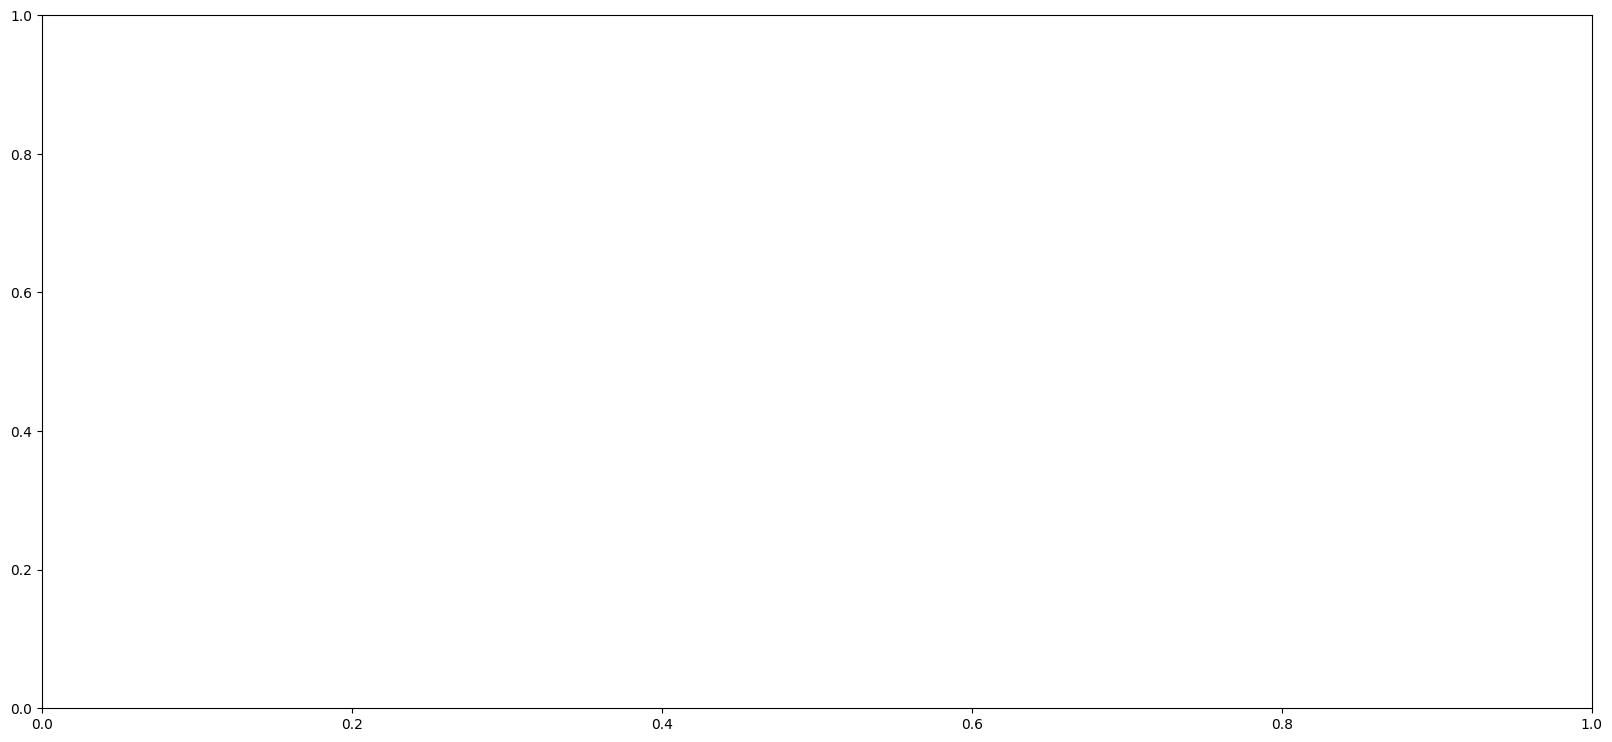

In [ ]:
from mpl_toolkits.basemap import Basemap as Basemap
plt.figure(figsize = (20,9))
m = Basemap(
         #projection='merc',   'mill',  'cyl'
         llcrnrlon=-130,    #-180,  left
         llcrnrlat=25,         #   10,  south
         urcrnrlon=-50,   #-50, right
         urcrnrlat=50,    #70,  North
         lat_ts=0,
         resolution='l',     #   c - crude,  l - low,  h - high,  f - full
         suppress_ticks=True)

mx, my = m(pd.to_numeric(fip_finding['lng'].astype(str).str.replace('–', '-', regex=True), downcast='float').values,  pd.to_numeric(fip_finding['lat'], downcast='float').values)

############ Counties
#mx, my = m(pd.to_numeric(fip_finding['lng'].str.replace('–', '-', regex=True), downcast='float').values,  pd.to_numeric(fip_finding['lat'], downcast='float').values)
pos = {}

fip_finding['county_fips'] = fip_finding['county_fips'].astype(str)
fip_finding['county_fips'] = fip_finding['county_fips'].apply(lambda x: '{0:0>5}'.format(x))

for count, elem in enumerate (fip_finding['county_fips'].values):
      pos[elem] = (mx[count], my[count])


#pos=nx.spring_layout(G)
d = nx.degree(G)
d = [(d[node]+1) * 25 for node in G.nodes()]
#nx.draw_networkx_nodes(G , pos = pos, node_color = 'r', alpha = 0.8, node_size=d) #node_size = 4)


valid_nodes = [node for node in G.nodes() if str(node) in pos]
# Now pass only the valid nodes to the draw function
d_valid = [(d[node]+1) * 2500 for node in valid_nodes]
nx.draw_networkx_nodes(G, pos=pos, nodelist=valid_nodes, node_color='r', alpha=0.8, node_size=d_valid)
nx.draw_networkx_edges(G , pos = pos, edge_color='g',alpha=0.2, arrows = False, width=2)



####### Utilities
#mx1, my1 = m(pd.to_numeric(Fips_latlong_utility['Longitude'].str.replace('–', '-', regex=True), downcast='float').values,  pd.to_numeric(Fips_latlong_utility['Latitude'], downcast='float').values)
pos1 = {}
#for count, elem in enumerate (Fips_latlong_utility['Utility Number'].values):
#       pos1[elem] = (mx[count], my[count])
n=0
while n<len(Node_utility):
  pos1[Node_utility[n]] = (Log_utlity[n],Lat_utlity[n])
  n+=1

dd = List*1
nx.draw_networkx_nodes(G_utility , pos = pos1,node_shape ='s' , node_color = 'k', alpha = 0.8,node_size=50) #node_size = 4,   node_shape  'so^>v<dph8'
#filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')


m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=3)
#m.drawcounties(color='darkred')
#m.bluemarble()
#m.etopo()

plt.tight_layout()
#plt.savefig("/content/drive/Shareddrives/MY Files/Utility-based /map_1.png", format = "png", dpi = 300)
plt.show()

In [ ]:
d

[25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25]

In [ ]:
!pip install python-louvain

In [ ]:
G=nx.Graph()
G.add_nodes_from(Node)
G.add_edges_from(Edge)

###########################################################  Cliques ###################################
cl=nx.enumerate_all_cliques(G)
#print last 10 cliques
print([l for l in cl][-10:])
#"5 Largest Cliques"
print("5 Largest Cliques",sorted([l for l in nx.find_cliques(G)],key=lambda x: len(x),reverse=True)[:5])

##################################################### PAGERANK and HITS  ###################################
pg_rank=sorted([l for l in nx.pagerank(G).items()],key=lambda x: x[1],reverse=True)
print("Top 10 county By Pagerank",pg_rank[:10])

hubs,authorities=nx.hits(G)
hubs=sorted([l for l in hubs.items()],key=lambda x: x[1],reverse=True)
authorities=sorted([l for l in authorities.items()],key=lambda x: x[1],reverse=True)
print("Top 10 Biggest Hubs",hubs[:10])
print("\nTop 10 Biggest Authorities",authorities[:10])


[[24033], [26081], [2020], [27109], [44007], [44009], [48113], [27123], [29173], [5119]]
5 Largest Cliques [[29189], [48135], [22033], [42003], [48167]]
Top 10 county By Pagerank [(29189, 0.005524861878453028), (48135, 0.005524861878453028), (22033, 0.005524861878453028), (42003, 0.005524861878453028), (48167, 0.005524861878453028), (42027, 0.005524861878453028), (41003, 0.005524861878453028), (22061, 0.005524861878453028), (42029, 0.005524861878453028), (51760, 0.005524861878453028)]
Top 10 Biggest Hubs [(29189, nan), (48135, nan), (22033, nan), (42003, nan), (48167, nan), (42027, nan), (41003, nan), (22061, nan), (42029, nan), (51760, nan)]

Top 10 Biggest Authorities [(27109, 0.07904865125885929), (42129, 0.07689477663711461), (24021, 0.07436981815474722), (48215, 0.07322049348020351), (48167, 0.07145902244991588), (41051, 0.06871528205340763), (51760, 0.06820218290375027), (39061, 0.0661931969916058), (6059, 0.06558067703746177), (26081, 0.06307828577049855)]


/usr/local/lib/python3.10/dist-packages/networkx/algorithms/link_analysis/hits_alg.py:92: RuntimeWarning: invalid value encountered in divide
  h /= h.sum()


In [ ]:
len(valid_nodes)

0

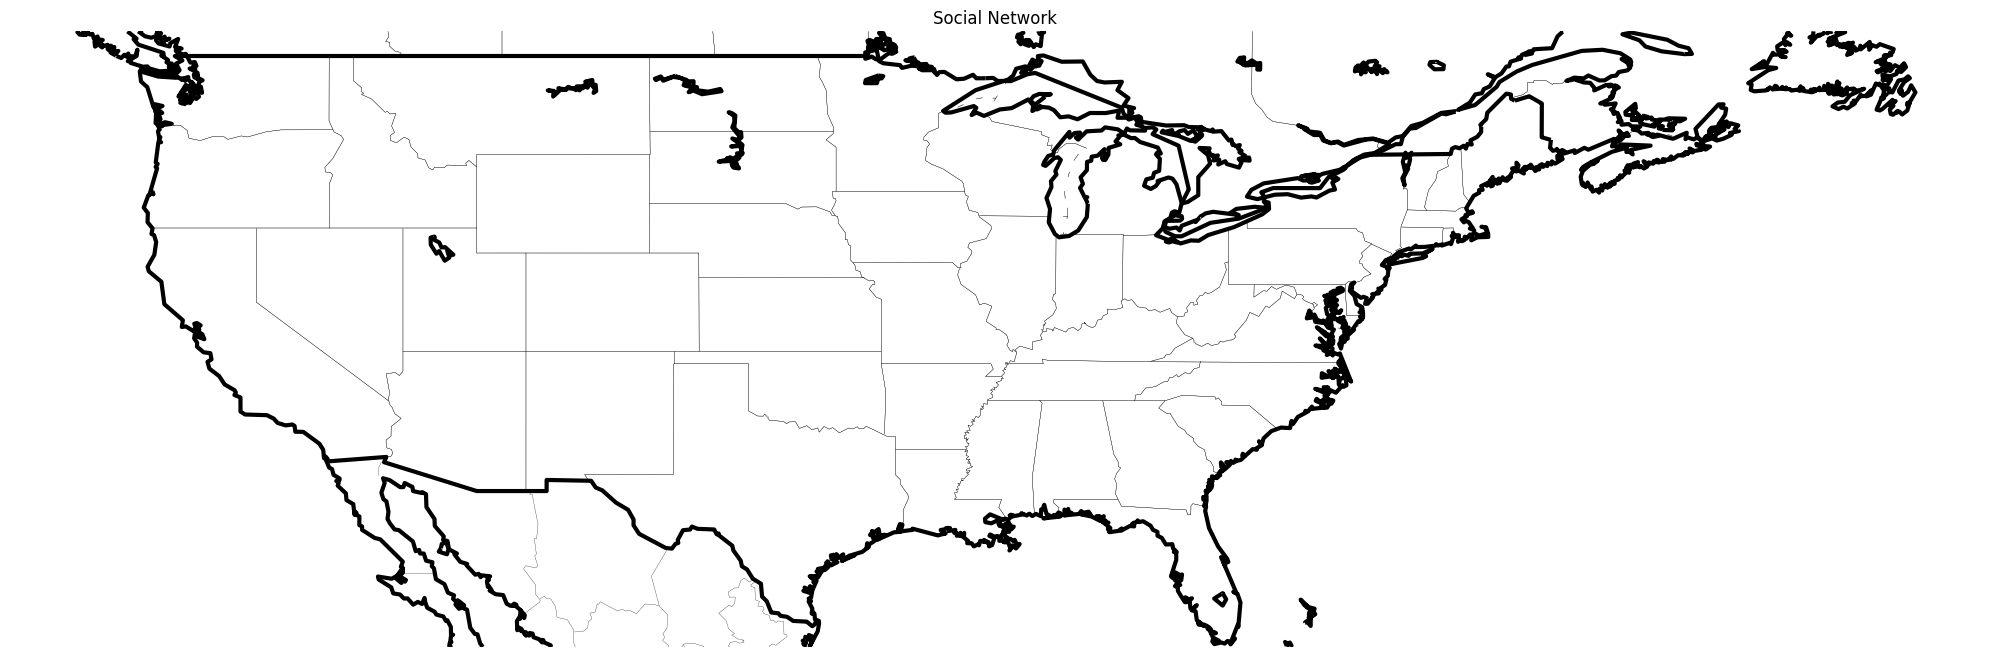

In [ ]:
############################  Communty Detection  ######################
import community #requires separate install -  pip install python-louvain
from community import community_louvain
import warnings

plt.figure(figsize=(20,9))
#pos = nx.spring_layout(Gc,iterations=50,k=2)
partition = community_louvain.best_partition(G)
values = [partition.get(node) for node in G.nodes()]


#####################################################################


plt.axis("off")
plt.title('Social Network'.format(len(set(partition.values()))))
#nx.draw_networkx(Gc, pos = pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 1, with_labels = False)

valid_nodes = [node for node in G.nodes() if node in pos]
# Now pass only the valid nodes to the draw function
d_valid = [(d[node]+1) * 2500 for node in valid_nodes]
nx.draw_networkx_nodes(G, pos=pos, nodelist=valid_nodes, node_color='r', alpha=0.8, node_size=d_valid)
#nx.draw_networkx_nodes(G , pos = pos, cmap = plt.get_cmap("jet"), node_color = values, alpha = 0.8, node_size=50) #node_size = 4)
nx.draw_networkx_edges(G , pos = pos, edge_color='k',alpha=0.2, arrows = False,width=5)


m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=3)
#m.drawcounties(color='darkred')
#m.bluemarble()
#m.etopo()

plt.tight_layout()
plt.show()

In [ ]:
L = nx.laplacian_matrix(G)
eig_values, eig_vectors = np.linalg.eigh(L.todense()) # Eigen values sorted from smallest to biggest
f = eig_vectors[:,1] # use the second smallest Eigen vector for spectral clustering
labels = np.ravel(np.sign(f)) # decides the label of each node


#####################################################################

fig = plt.figure(figsize=(9,6))
plt.axis("off")
#nx.draw_networkx(Gc, pos,node_size=45, cmap = plt.get_cmap("jet"), node_color=labels, with_labels = False)
nx.draw_networkx_nodes(G , pos = pos, cmap = plt.get_cmap("jet"), node_color = labels, alpha = 0.8, node_size=10) #node_size = 4)
nx.draw_networkx_edges(G , pos = pos, edge_color='k',alpha=0.2, arrows = False)


m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=3)
#m.drawcounties(color='darkred')
#m.bluemarble()
#m.etopo()

plt.tight_layout()
plt.show()


# all codes in one section

In [ ]:
disease='Actinic prurigo' #'Non-syndromic polydactyly'   #'Cystic fibrosis'
diseaseid='GARD0017510'

ClinicalTrial =pd.DataFrame()# pd.read_csv('/content/ClinicalTrial.csv')
Grant = pd.read_csv('/content/Grants.csv')#,  error_bad_lines=False)
Pubmed=pd.read_csv('/content/Pubmed.csv')


ClinicalTrial = ClinicalTrial.replace('"', '', regex=True)
Grant = Grant.replace('"', '', regex=True)
Pubmed = Pubmed.replace('"', '', regex=True)
print(ClinicalTrial.shape[0], Grant.shape[0], Pubmed.shape[0])

ClinicalTrial['GARDname']= disease
Grant['GARDname']= disease
Pubmed['GARDname']= disease


# Rename the columns of each DataFrame
ClinicalTrial.rename(columns=rename_dict_1, inplace=True)
Grant.rename(columns=rename_dict_2, inplace=True)

Pubmed.rename(columns=rename_dict_3, inplace=True)
'''
for i in range(len(ClinicalTrial)):
      event_properties = {
                'OfficialName': ClinicalTrial['OfficialName'][i],
                'OfficialAffiliation': ClinicalTrial['OfficialAffiliation'][i],
                'BriefTitle': ClinicalTrial['BriefTitle'][i],
                'OfficialTitle':ClinicalTrial['OfficialTitle'][i],
                'BriefSummary': ClinicalTrial['BriefSummary'][i],
                'NCTId': ClinicalTrial['NCTId'][i],
                'LocationCity': ClinicalTrial['LocationCity'][i],
                 'LocationState': ClinicalTrial['LocationState'][i],
                'LocationCountry': ClinicalTrial['LocationCountry'][i],
                'LocationFacility': ClinicalTrial['LocationFacility'][i],
                'Interventions': ClinicalTrial['Interventions'][i],
                'GARDname': ClinicalTrial['GARDname'][i],
                'year': ClinicalTrial['StartDate'][i][-4:]
        }
      create_ClinicalTrial_node(event_properties)
print('CT: finished')
'''
for i in range(len(Grant)):
    event_properties = {
        'pi_name': str(Grant['pi_name'][i]),
        'org_name': str(Grant['org_name'][i]),
        'title': str(Grant['title'][i]),
        'application_id': str(Grant['application_id'][i]),
        'abstract': str(Grant['abstract'][i]),
        'terms': str(Grant['terms'][i]),
        'GARDname': Grant['GARDname'][i],
        'year': Grant['year'][i]
    }
    create_Grant_node(event_properties)
print('Grant: finished')

for i in range(len(Pubmed)):
    event_properties = {
        'fullName': Pubmed['fullName'][i],  # Convert to string
        'ar_title': Pubmed['title'][i],  # Convert to string
        'ar_affiliation': Pubmed['affiliation'][i],  # Convert to string
        'pubmed_id': Pubmed['pubmed_id'][i],  # Convert to string (or other appropriate type)
        'abstractText': Pubmed['abstractText'][i],  # Convert to string
        'concatenatedKeywords': Pubmed['concatenatedKeywords'][i],  # Convert to string
        'GARDname': Pubmed['GARDname'][i],  # Convert to string
        'year': Pubmed['year'][i]
    }
    create_Pubmed_node(event_properties)

print('Pubmed: finished')



event_properties = {'GARDID': diseaseid ,'GARDname':disease }
create_Gard_node(event_properties)
#create_relationship_between_nodes('ClinicalTrial','Gard',  "RELATED_GARD")
create_relationship_between_nodes('Grant','Gard',  "RELATED_GARD")
create_relationship_between_nodes('Pubmed','Gard',  "RELATED_GARD")
'''
def extract_and_create_researcher_location_nodes_CT():
 with driver.session() as session:
  query = "MATCH (i:ClinicalTrial) where i.GARDname= $disease RETURN i.OfficialName AS OfficialName, i.OfficialAffiliation AS OfficialAffiliation, i.LocationCountry as LocationCountry, i.LocationCity as LocationCity,i.LocationState as LocationState"
  results = session.run(query, disease=disease)
  for ClinicalTrial in results:
   Name=  ClinicalTrial['OfficialName']
   Aff_name=   str(ClinicalTrial['OfficialAffiliation'])
   if  classify_entity(Name)==True and (Name, Aff_name) not in current_names:
    event_properties = {
        'Name': Name,
        'Contact_info': '',#str(ClinicalTrial['i.OfficialAffiliation'][i]),
        'Aff_name':Aff_name,
        'Aff_Zip': ''#str(ClinicalTrial['LocationZip'][i]),
    }
    create_Researcher_node(event_properties)
    city_  = str(ClinicalTrial['LocationCity']).lower().strip()
    State_ = str(ClinicalTrial['LocationState']).lower().strip()
    event_properties = {
        'Aff_country': str(ClinicalTrial['LocationCountry']),
        'Aff_state': State_,
        'Aff_county': find_fip(city_, State_ )[1] ,
        'Aff_city': city_,
        'Aff_FIPS': find_fip(city_, State_ )[0]
    }
    create_Location_node(event_properties, Name, Aff_name)
    current_names[(Name, Aff_name)] =1

current_names={}
extract_and_create_researcher_location_nodes_CT()
'''
def extract_and_create_researcher_location_nodes_PubMed():
 with GraphDatabase.driver(uri, auth=(username, password)) as driver:

  with driver.session() as session:
   query = "MATCH (i:Pubmed)  where i.GARDname= $disease RETURN i.fullName AS fullName, i.ar_affiliation AS affiliation"
   results = session.run(query, disease=disease)
   for Pubmed in results:
    A,B=Pubmed['fullName'], str(Pubmed['affiliation'])
    if  (A, B) not in current_names:
     if B in pubmed_institution:
        place_entity=pubmed_institution[B]
     else:
       place_entity =location_information(B)
       pubmed_institution[B]= place_entity

     event_properties = {
        'Name': str(A),
        'Contact_info': '',#str(Pubmed['i.OfficialAffiliation'][i]),
        'Aff_name': B,
        'Aff_Zip': ''  }
     create_Researcher_node(event_properties)
     current_names[(A, B)] =1
     if place_entity[0] != None and place_entity[1] !=  None and place_entity[2] !=  None:
      event_properties = {
         'Aff_country': place_entity[0],
        'Aff_state':   place_entity[1],
        'Aff_county': find_fip(place_entity[2], place_entity[1] )[1],
        'Aff_city': place_entity[2],
        'Aff_FIPS': find_fip(place_entity[2], place_entity[1] )[0]  }
      create_Location_node(event_properties, A, B)

pubmed_institution={}
current_names={}
extract_and_create_researcher_location_nodes_PubMed()

def extract_and_create_researcher_location_nodes_Grant():
 with driver.session() as session:
  query = "MATCH (i:Grant)  where i.GARDname= $disease RETURN i.org_name AS org_name, i.pi_name AS pi_name"
  results = session.run(query, disease=disease)
  for Grant in results:
   Name= Grant['pi_name']
   Aff_name= str(Grant['org_name'])
   if (Name, Aff_name) not in current_names:
     data=organ_address[organ_address['n.org_name'] == Grant['org_name'].lower().strip()]
     '''
      or
      from geopy.geocoders import Nominatim
      geolocator = Nominatim(user_agent="GetLoc", timeout=30)  # You can adjust the timeout value as needed
      location = geolocator.geocode('NIH')
      if location:
              address = location.address.split(", ")
              data={}
              data['Country'] = address[-1]
              data['zip_code'] = address[-2]
              data['state']  = address[-3]  # Massachusetts (state)
              data['County'] = address[-4]  # Massachusetts (state)
              data['city'] = address[-5]  # Boston (city)
     '''
     if len(data) >0 :
       event_properties = {
        'Name': Name,
        'Contact_info': '',
        'Aff_name': Aff_name,
        'Aff_Zip':  data.iloc[0]['zip_code']
       }
       create_Researcher_node(event_properties)
       A,B,C=data.iloc[0]['Country'], data.iloc[0]['state'], data.iloc[0]['County']
       if  type(A)==str and type(B)==str and type(C) == str:
        event_properties = {
        'Aff_country': A ,
        'Aff_state': B,
        'Aff_county': C,
        'Aff_city': data.iloc[0]['city'],
        'Aff_FIPS': find_fip(data.iloc[0]['city'], data.iloc[0]['state'] )[0]
        }
        create_Location_node(event_properties, Name, Aff_name)
     else:
         event_properties = {'Name': Name,'Contact_info': '', 'Aff_name': Aff_name, 'Aff_Zip': ''    }
         create_Researcher_node(event_properties)
     current_names[(Name, Aff_name)] =1

current_names={}
extract_and_create_researcher_location_nodes_Grant()

#create_relationship_between_nodes_1('Researcher','ClinicalTrial',  "Involves_Researcher_ct")
create_relationship_between_nodes_2('Researcher','Grant',  "Involves_Researcher_g")
create_relationship_between_nodes_3('Researcher','Pubmed',  "Involves_Researcher_p")

def extract_and_create_researcher_connection():
 with driver.session() as session:
  query = "MATCH (i:ClinicalTrial) where i.GARDname= $disease  RETURN i.OfficialName AS OfficialName, i.OfficialAffiliation AS OfficialAffiliation, i.NCTId as NCTId "
  results = session.run(query, disease=disease)
  data = [record.data() for record in results]  # Convert result to a list of dictionaries
  ClinicalTrial = pd.DataFrame(data)
  print("--- start ---")
  start_time = time.time()
  a,a1=pd.DataFrame(),pd.DataFrame()#find_coauthors(ClinicalTrial,'OfficialName','OfficialAffiliation','NCTId')
  print("--- %s seconds ---" % (time.time() - start_time))
  ######   Grant
  query = "MATCH (i:Grant) where i.GARDname= $disease  RETURN i.pi_name AS pi_name, i.org_name AS org_name, i.application_id as application_id "
  results = session.run(query, disease=disease)
  data = [record.data() for record in results]  # Convert result to a list of dictionaries
  Grant = pd.DataFrame(data)
  start_time = time.time()
  b,b1=find_coauthors(Grant,'pi_name','org_name','application_id')
  print("--- %s seconds ---" % (time.time() - start_time))
  ##################### pubmed
  query = "MATCH (i:Pubmed) where i.GARDname= $disease  RETURN i.fullName AS fullName, i.ar_affiliation AS affiliation, i.pubmed_id as pubmed_id "
  results = session.run(query, disease=disease)
  data = [record.data() for record in results]  # Convert result to a list of dictionaries
  Pubmed = pd.DataFrame(data)
  start_time = time.time()
  c,c1=find_coauthors(Pubmed,'fullName','affiliation','pubmed_id')
  print("--- %s seconds ---" % (time.time() - start_time))
  ###################
  combined_dict = merge_dicts(a, b)
  combined_dict = merge_dicts(combined_dict, c)
  ###########
  combined_dict1 = sum_dicts(a1, b1)
  result_dict1 = sum_dicts(combined_dict1, c1)
  for key in result_dict1:
    result_dict1[key] = result_dict1[key] %1000
  ###########
  result_dict = {key: list(values) for key, values in combined_dict.items()}
  return combined_dict, result_dict1, a,a1,b,b1,c,c1
result_dict, result_dict1, a,a1,b,b1,c,c1=extract_and_create_researcher_connection()


for key in result_dict1:
    create_relationship_between_Researchers(key[0][0], key[0][1], key[1][0], key[1][1], result_dict1[key])




0 7 734
Grant: finished
Pubmed: finished
--- start ---
--- 0.0005049705505371094 seconds ---
--- 0.005098104476928711 seconds ---
--- 0.3682534694671631 seconds ---


# clustering

In [ ]:
!pip install python-louvain
import networkx as nx
layout_algorithms = [
    nx.circular_layout,
    nx.random_layout,
    nx.spring_layout,
    nx.spectral_layout,
    nx.shell_layout,
    nx.bipartite_layout,
    nx.planar_layout,
    nx.fruchterman_reingold_layout,
    nx.kamada_kawai_layout
]

In [ ]:
import networkx as nx
import community
from community import community_louvain
import matplotlib.pyplot as plt
# Create a directed graph
G = nx.Graph()
# Add nodes and edges from the dictionary
for nodes, edges in result_dict.items():
    G.add_node(nodes)
    for edge in edges:
        G.add_node(edge)
        G.add_edge(nodes, edge)

# Detect communities using Louvain method
partition = community_louvain.best_partition(G)
data_table = pd.DataFrame(partition.items(), columns=['Node', 'Community'])
data_table['network']=data_table.apply(lambda x: result_dict[x['Node']] ,axis=1)
index_community_detection= list(set(data_table[data_table['network']!=set()]['Community'].values))

In [ ]:
def merge_community_detection_and_researchers_info(disease):
 with GraphDatabase.driver(uri, auth=(username, password)) as driver:
  with driver.session() as session:
   query = "MATCH (i:ClinicalTrial)--(g:Gard) WHERE g.GARDname= $disease RETURN i.OfficialName as OfficialName , i.OfficialAffiliation as OfficialAffiliation, i.OfficialTitle as OfficialTitle  ,i.Interventions as concatenatedInterventions, i.BriefSummary as BriefSummary"
   results = session.run(query, disease=disease)
   data = [record.data() for record in results]  # Convert result to a list of dictionaries
   if data==[]:  ClinicalTrial = pd.DataFrame(columns=["OfficialName", "OfficialAffiliation", "OfficialTitle", "concatenatedInterventions", "BriefSummary"])
   else: ClinicalTrial = pd.DataFrame(data)
   ######   Grant
   query = "MATCH (i:Grant)--(g:Gard) WHERE g.GARDname= $disease RETURN i.pi_name as pi_name,i.org_name as org_name,i.title as title ,i.terms as terms,i.abstract as abstract"
   results = session.run(query, disease=disease)
   data = [record.data() for record in results]  # Convert result to a list of dictionaries
   Grant = pd.DataFrame(data)
   ##################### pubmed
   query = "MATCH (i:Pubmed)--(g:Gard) WHERE g.GARDname= $disease RETURN i.fullName as fullName, i.ar_affiliation as affiliation, i.title as title, i.concatenatedKeywords as concatenatedKeywords,i.abstractText as abstractText "
   results = session.run(query, disease=disease)
   data = [record.data() for record in results]  # Convert result to a list of dictionaries
   Pubmed = pd.DataFrame(data)
   ################
   ClinicalTrial['name'] = ClinicalTrial.apply(lambda row: (row['OfficialName'], row['OfficialAffiliation']), axis=1)
   Grant['name'] = Grant.apply(lambda row: (row['pi_name'], row['org_name']), axis=1)
   Pubmed['name'] = Pubmed.apply(lambda row: (row['fullName'], row['affiliation']), axis=1)

   ClinicalTrial['BriefSummary']=ClinicalTrial['OfficialTitle'].fillna("").astype(str)+' '+ ClinicalTrial['BriefSummary'].fillna("").astype(str)   #+ClinicalTrial['concatenatedInterventions'].fillna("").astype(str)+
   Grant['BriefSummary']=Grant['title'].fillna("").astype(str)+' '+ Grant['abstract'].fillna("").astype(str)                   #+Grant['terms'].fillna("").astype(str)
   Pubmed['abstractText']=Pubmed['title'].fillna("").astype(str)+' '+ Pubmed['abstractText'].fillna("").astype(str)    #+Pubmed['concatenatedKeywords'].fillna("").astype(str)

   ClinicalTrial['Terms']=ClinicalTrial['concatenatedInterventions']
   Grant['Terms']=Grant['terms']
   Pubmed['Terms']=Pubmed['concatenatedKeywords']
   #df1=ClinicalTrial[['i.OfficialName',  'c.BriefSummary', 'i.OfficialAffiliation','name']]
   df1=ClinicalTrial[['OfficialName',  'BriefSummary','OfficialAffiliation', 'name','Terms']]
   df2=Grant[['pi_name', 'abstract', 'org_name','name','Terms']]
   df3=Pubmed[['fullName',  'abstractText', 'affiliation','name','Terms']]
   # Rename columns to avoid conflicts
   df1.columns = ['PI','Abstract', 'affiliation','name','Terms']
   df2.columns = ['PI','Abstract', 'affiliation','name','Terms']
   df3.columns = ['PI','Abstract', 'affiliation','name','Terms']
   #df2['Location']=  df2['locationCity'] +' , '+df2['Location']
   result_df = pd.concat([df1  , df2, df3])
   #result_df = pd.concat([df1,  df3])
   result_df=result_df.drop_duplicates()
   result_df.index= range(result_df.shape[0])
   #################################################### merging with c
   '''
  merged_data1 = pd.merge(result_df,data_table , left_on='name', right_on='Node', how='outer')
  concatenated_data = merged_data1.drop_duplicates(subset=['name'])
  concatenated_data.reset_index(drop=True, inplace=True)
  concatenated_data=concatenated_data.drop(['name'],axis=1)
  return concatenated_data
   '''
   return result_df


In [ ]:
def merge_community_detection_and_researchers_info(disease):
 with GraphDatabase.driver(uri, auth=(username, password)) as driver:
  with driver.session() as session:
   query = "MATCH (i:ClinicalTrial)--(g:Gard) WHERE g.GARDname= $disease RETURN i.OfficialName as OfficialName , i.OfficialAffiliation as OfficialAffiliation, i.OfficialTitle as OfficialTitle  ,i.Interventions as concatenatedInterventions, i.BriefSummary as BriefSummary"
   results = session.run(query, disease=disease)
   data = [record.data() for record in results]  # Convert result to a list of dictionaries
   if data==[]:  ClinicalTrial = pd.DataFrame(columns=["OfficialName", "OfficialAffiliation", "OfficialTitle", "concatenatedInterventions", "BriefSummary"])
   else: ClinicalTrial = pd.DataFrame(data)
   ######   Grant
   query = "MATCH (i:Grant)--(g:Gard) WHERE g.GARDname= $disease RETURN i.pi_name as pi_name,i.org_name as org_name,i.title as title ,i.terms as terms,i.abstract as abstract"
   results = session.run(query, disease=disease)
   data = [record.data() for record in results]  # Convert result to a list of dictionaries
   Grant = pd.DataFrame(data)
   ##################### pubmed
   query = "MATCH (i:Pubmed)--(g:Gard) WHERE g.GARDname= $disease RETURN i.fullName as fullName, i.ar_affiliation as affiliation, i.title as title, i.concatenatedKeywords as concatenatedKeywords,i.abstractText as abstractText "
   results = session.run(query, disease=disease)
   data = [record.data() for record in results]  # Convert result to a list of dictionaries
   Pubmed = pd.DataFrame(data)
   ################
   ClinicalTrial['name'] = ClinicalTrial.apply(lambda row: (row['OfficialName'], row['OfficialAffiliation']), axis=1)
   Grant['name'] = Grant.apply(lambda row: (row['pi_name'], row['org_name']), axis=1)
   Pubmed['name'] = Pubmed.apply(lambda row: (row['fullName'], row['affiliation']), axis=1)

   ClinicalTrial['BriefSummary']=ClinicalTrial['OfficialTitle'].fillna("").astype(str)+' '+ ClinicalTrial['BriefSummary'].fillna("").astype(str)   #+ClinicalTrial['concatenatedInterventions'].fillna("").astype(str)+
   Grant['BriefSummary']=Grant['title'].fillna("").astype(str)+' '+ Grant['abstract'].fillna("").astype(str)                   #+Grant['terms'].fillna("").astype(str)
   Pubmed['abstractText']=Pubmed['title'].fillna("").astype(str)+' '+ Pubmed['abstractText'].fillna("").astype(str)    #+Pubmed['concatenatedKeywords'].fillna("").astype(str)

   ClinicalTrial['Terms']=ClinicalTrial['concatenatedInterventions']
   Grant['Terms']=Grant['terms']
   Pubmed['Terms']=Pubmed['concatenatedKeywords']
   #df1=ClinicalTrial[['i.OfficialName',  'c.BriefSummary', 'i.OfficialAffiliation','name']]
   df1=ClinicalTrial[['OfficialName',  'BriefSummary','OfficialAffiliation', 'name','Terms']]
   df2=Grant[['pi_name', 'abstract', 'org_name','name','Terms']]
   df3=Pubmed[['fullName',  'abstractText', 'affiliation','name','Terms']]
   # Rename columns to avoid conflicts
   df1.columns = ['PI','Abstract', 'affiliation','name','Terms']
   df2.columns = ['PI','Abstract', 'affiliation','name','Terms']
   df3.columns = ['PI','Abstract', 'affiliation','name','Terms']
   #df2['Location']=  df2['locationCity'] +' , '+df2['Location']
   result_df = pd.concat([df1  , df2, df3])
   #result_df = pd.concat([df1,  df3])
   result_df=result_df.drop_duplicates()
   result_df.index= range(result_df.shape[0])
   #################################################### merging with c
   '''
  merged_data1 = pd.merge(result_df,data_table , left_on='name', right_on='Node', how='outer')
  concatenated_data = merged_data1.drop_duplicates(subset=['name'])
  concatenated_data.reset_index(drop=True, inplace=True)
  concatenated_data=concatenated_data.drop(['name'],axis=1)
  return concatenated_data
   '''
   return result_df


In [ ]:
import pandas as pd

def sum_strings(series):
    # Convert all items to string, handling NaNs, and remove duplicates by converting to a set
    return ', '.join(sorted(set(str(item) for item in series if pd.notna(item))))

# Function to clean and flatten terms
def sum_terms(series):
    result = []
    for item in series:
        if isinstance(item, list):  # Check if item is a list
            for subitem in item:
                if isinstance(subitem, str):  # Ensure it's a string
                    subitem_cleaned = subitem.strip('[]')  # Remove surrounding brackets
                    result.extend(subitem_cleaned.split(','))  # Split and add terms
        elif pd.notna(item):  # Handle non-list, non-NaN values
            item_cleaned = str(item).strip('[]')  # Convert to string and remove brackets
            result.extend(item_cleaned.split(','))  # Split and add terms
    # Remove extra whitespace from terms
    return [term.strip() for term in result if term.strip()]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans  # Use MiniBatchKMeans for faster clustering
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD  # Dimensionality reduction to speed up vectorization

def name_clusters(df, text_column, cluster_column, num_clusters=5, n_components=100):
    # Extract abstracts from the specified column and handle NaN values
    abstracts = df[text_column].fillna("").astype(str).tolist()

    # TF-IDF vectorization with ngram_range (optimize based on your dataset)
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))  # Bi-grams may help for better context
    tfidf_matrix = vectorizer.fit_transform(abstracts)

    # Optionally reduce dimensionality to speed up clustering
    #if n_components:
    #    svd = TruncatedSVD(n_components=n_components, random_state=42)
    #    tfidf_matrix = svd.fit_transform(tfidf_matrix)

    # MiniBatchKMeans clustering (faster than KMeans)
    kmeans = MiniBatchKMeans(n_clusters=num_clusters, random_state=10, n_init=10, batch_size=1000)
    clusters = kmeans.fit_predict(tfidf_matrix)

    # Assign cluster labels to the DataFrame
    df[cluster_column] = clusters

    return df


disease= A[8]  #'Actinic prurigo' #'Non-syndromic polydactyly'   #'Cystic fibrosis'
diseaseid=B[8] #'GARD0017510'

concatenated_data= merge_community_detection_and_researchers_info(disease)
# Assuming you have a DataFrame `clustering_2`
clustering_ = name_clusters(concatenated_data, 'Abstract', 'Community', num_clusters=3, n_components=100)
# Group by 'Community' and aggregate columns using sum_strings and sum_terms functions
result = clustering_.groupby('Community').agg(
    Abstract=('Abstract', sum_strings),
    Terms=('Terms', sum_terms),
    Size=('Community', 'size')  # Count of occurrences
).reset_index()

data=result

print(len(clustering_['Abstract'].unique()))
print('------------------')
for i in clustering_['Community'].unique():
    ASD= clustering_[clustering_['Community']==i]
    print( ASD['Abstract'].drop_duplicates().shape[0] )

18
------------------
6
3
9


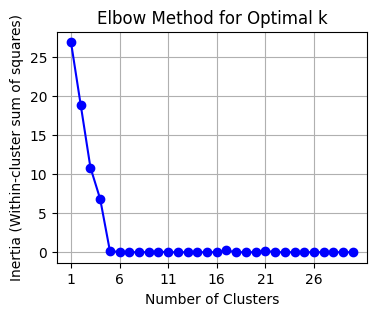

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
disease= A[3]  #'Actinic prurigo' #'Non-syndromic polydactyly'   #'Cystic fibrosis'
diseaseid=B[3] #'GARD0017510'

concatenated_data= merge_community_detection_and_researchers_info(disease)
# Function to calculate the Elbow plot
def plot_elbow_method(df, text_column, min_clusters=1, max_clusters=10):
    # Extract abstracts and handle NaN values
    abstracts = df[text_column].fillna("").astype(str).tolist()

    # TF-IDF vectorization
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
    tfidf_matrix = vectorizer.fit_transform(abstracts)

    # List to store inertia values for each k
    inertia_values = []

    # Run MiniBatchKMeans for a range of cluster sizes
    for k in range(min_clusters, max_clusters+1):
        kmeans = MiniBatchKMeans(n_clusters=k, random_state=10, n_init=10, batch_size=1000)
        kmeans.fit(tfidf_matrix)
        inertia_values.append(kmeans.inertia_)

    # Plotting the Elbow method
    plt.figure(figsize=(4, 3))
    plt.plot(range(min_clusters, max_clusters+1), inertia_values, marker='o', linestyle='-', color='b')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia (Within-cluster sum of squares)')
    #plt.xticks(range(min_clusters, max_clusters+1))
    #plt.xticks(range(min_clusters, max_clusters+1), rotation=90)  # Rotate x-ticks by 90 degrees
    ticks = range(min_clusters, max_clusters+1, 5)  # Every 5th tick
    plt.xticks(ticks, rotation=0)
    plt.grid(True)
    plt.show()

# Call the function with your dataframe to plot the elbow graph
# Assuming 'concatenated_data' is your dataframe and 'Abstract' is the column with text data
plot_elbow_method(concatenated_data, 'Abstract', min_clusters=1, max_clusters=30)

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_distances

def name_clusters(df, text_column, cluster_column, eps=0.5, min_samples=5, n_components=100):
    # Extract abstracts from the specified column and handle NaN values
    abstracts = df[text_column].fillna("").astype(str).tolist()

    # TF-IDF vectorization with ngram_range (optimize based on your dataset)
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))  # Bi-grams may help for better context
    tfidf_matrix = vectorizer.fit_transform(abstracts)

    # Optionally reduce dimensionality to speed up clustering
    # if n_components:
    #     svd = TruncatedSVD(n_components=n_components, random_state=42)
    #     tfidf_matrix = svd.fit_transform(tfidf_matrix)

    # DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')  # Using cosine distance as the metric
    clusters = dbscan.fit_predict(tfidf_matrix)

    # Assign cluster labels to the DataFrame
    df[cluster_column] = clusters

    return df

disease= A[0]  #'Actinic prurigo' #'Non-syndromic polydactyly'   #'Cystic fibrosis'
diseaseid=B[0] #'GARD0017510'

concatenated_data= merge_community_detection_and_researchers_info(disease)
# Assuming you have a DataFrame `clustering_2`
clustering_ = name_clusters(concatenated_data, 'Abstract', 'Community', eps=0.9, min_samples=10, n_components=100)
# Group by 'Community' and aggregate columns using sum_strings and sum_terms functions
result = clustering_.groupby('Community').agg(
    Abstract=('Abstract', sum_strings),
    Terms=('Terms', sum_terms),
    Size=('Community', 'size')  # Count of occurrences
).reset_index()

data=result

print(len(clustering_['Abstract'].unique()))
print('------------------')
for i in clustering_['Community'].unique():
    ASD= clustering_[clustering_['Community']==i]
    print( ASD['Abstract'].drop_duplicates().shape[0] )

65
------------------
18
36
2
4
1
1
3


In [ ]:
A=['PGM1-CDG','Cerebral cavernous malformations 3',"CLOVES syndrome","STT3B-CDG","Thoracolaryngopelvic dysplasia","Actinic prurigo","Non-syndromic polydactyly","Genitopatellar syndrome","Diaphanospondylodysostosis"]
B=['GARD0004329','GARD0018314',"GARD0010939","GARD0017603","GARD0005184", "GARD0017510","GARD0004410","GARD0010994","GARD0016674"]
#for n in range(len(A)):
disease= A[0]  #'Actinic prurigo' #'Non-syndromic polydactyly'   #'Cystic fibrosis'
diseaseid=B[0] #'GARD0017510'

concatenated_data= merge_community_detection_and_researchers_info(disease)
# Assuming you have a DataFrame `clustering_2`
clustering_ = name_clusters(concatenated_data, 'Abstract', 'Community', num_clusters=9, n_components=100)
# Group by 'Community' and aggregate columns using sum_strings and sum_terms functions
result = clustering_.groupby('Community').agg(
    Abstract=('Abstract', sum_strings),
    Terms=('Terms', sum_terms),
    Size=('Community', 'size')  # Count of occurrences
).reset_index()

data=result

print(len(clustering_['Abstract'].unique()))
print('------------------')
for i in data.index:
    ASD= clustering_[clustering_['Community']==i]
    print( ASD['Abstract'].drop_duplicates().shape[0] )

TypeError: name_clusters() got an unexpected keyword argument 'num_clusters'

In [ ]:
print(len(result['Abstract'][0]))
clustering_['Community'][0]

88251


0

In [ ]:
result = pd.read_csv('/content/data_u4.csv')
result

,Unnamed: 0.1,Unnamed: 0,Community,Abstract,Terms,Size,frequent_words,Mistral
0,0,0,1,Development of a New Tool for Dyspnea Measurem...,['Cross sectional psychometric evaluation of a...,2,Cross sectional psychometric evaluation of a s...,1. Psychometrics: The study focused on the psy...
1,1,1,2,The Effects of a Low Glycemic Load Diet on Dys...,"['Low Glycemic Load Diet', 'Low Glycemic Load ...",2,Low Glycemic Load Diet,1. Glycemic Control\n2. Nutrition Management\n...
2,2,2,3,"A Phase 1/2 Study to Evaluate the Safety, Tole...","['PTI-808, Placebo, PTI-428, PTI-801', 'PTI-80...",2,"PTI-808, Placebo, PTI-428, PTI-801",1. Pharmacokinetics: The study will evaluate t...
3,3,3,4,In Vitro Comparison of Continuous and Breath-s...,['Nebulization of Amikacin during NIV (RR: 25 ...,7,Nebulization of Amikacin during NIV (RR: 25 cy...,1. Nebulization\n2. Inhaled and Lost Doses\n3....
4,4,4,5,Intraduodenal Aspiration Study to Assess the B...,"['Pancrelipase', 'Pancrelipase']",2,Pancrelipase,1. Pancreatic Enzyme Replacement Therapy (PERT...
...,...,...,...,...,...,...,...,...
108,108,108,109,Project Summary/Abstract Cilia dysfunction lea...,"['[Actins, Adaptor Signaling Protein, Addres...",4,"[Actins, Adaptor Signaling Protein, Address,...",1. Microtubule dynamics\n2. Protein traffickin...
109,109,109,110,...,"['[bacteria infection mechanism, respiratory i...",7,"[16S ribosomal RNA sequencing, Adopted, Adop...",1. Bioinformatics - The use of computational t...
110,110,110,111,DESCRIPTION (provided by applicant): Cystic Fi...,"['[absorption, Affect, Animal Model, Area, Bac...",11,"[absorption, Affect, Animal Model, Area, Bacte...",1. Comparative Pathology: The study of the dif...
111,111,111,112,This project will test the hypothesis that som...,"['[lung disorder, chloride channels, protein d...",3,"[lung disorder, chloride channels, protein deg...","1. Molecular biology: Genetic engineering, gen..."


# LLM

In [ ]:
%%capture
!pip install unsloth
# Also get the latest nightly Unsloth!
!pip uninstall unsloth -y && pip install --upgrade --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git

In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 10000 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Meta-Llama-3.1-8B-bnb-4bit",      # Llama-3.1 15 trillion tokens model 2x faster!
    "unsloth/Meta-Llama-3.1-8B-Instruct-bnb-4bit",
    "unsloth/Meta-Llama-3.1-70B-bnb-4bit",
    "unsloth/Meta-Llama-3.1-405B-bnb-4bit",    # We also uploaded 4bit for 405b!
    "unsloth/Mistral-Nemo-Base-2407-bnb-4bit", # New Mistral 12b 2x faster!
    "unsloth/Mistral-Nemo-Instruct-2407-bnb-4bit",
    "unsloth/mistral-7b-v0.3-bnb-4bit",        # Mistral v3 2x faster!
    "unsloth/mistral-7b-instruct-v0.3-bnb-4bit",
    "unsloth/Phi-3.5-mini-instruct",           # Phi-3.5 2x faster!
    "unsloth/Phi-3-medium-4k-instruct",
    "unsloth/gemma-2-9b-bnb-4bit",
    "unsloth/gemma-2-27b-bnb-4bit",            # Gemma 2x faster!
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!
==((====))==  Unsloth 2025.1.6: Fast Llama patching. Transformers: 4.47.1.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu121. CUDA: 7.5. CUDA Toolkit: 12.1. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""

EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples):
    instructions = examples["instruction"]
    inputs       = examples["input"]
    outputs      = examples["output"]
    texts = []
    for instruction, input, output in zip(instructions, inputs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = alpaca_prompt.format(instruction, input, output) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }
pass

from datasets import load_dataset
dataset = load_dataset("yahma/alpaca-cleaned", split = "train")
dataset = dataset.map(formatting_prompts_func, batched = True,)
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 2,
    packing = False, # Can make training 5x faster for short sequences.
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        # num_train_epochs = 1, # Set this for 1 full training run.
        max_steps = 60,
        learning_rate = 2e-4,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none", # Use this for WandB etc
    ),
)
trainer_stats = trainer.train()
# alpaca_prompt = Copied from above
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[
    alpaca_prompt.format(
        "Continue the fibonnaci sequence.", # instruction
        "1, 1, 2, 3, 5, 8", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

outputs = model.generate(**inputs, max_new_tokens = 64, use_cache = True)
tokenizer.batch_decode(outputs)

# alpaca_prompt = Copied from above
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[
    alpaca_prompt.format(
        "Continue the fibonnaci sequence.", # instruction
        "1, 1, 2, 3, 5, 8", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128)


model.save_pretrained("lora_model") # Local saving
tokenizer.save_pretrained("lora_model")
# model.push_to_hub("your_name/lora_model", token = "...") # Online saving
# tokenizer.push_to_hub("your_name/lora_model", token = "...") # Online saving


# example

In [ ]:
2. List 3 key research areas described from the below abstracts (the best one)


Given the work of authors (or principal investigators) in the field of rare diseases, identify 3 key detailed research expertise areas they have contributed to. Follow these steps: 1-Research Contribution Summary: Based on their publications, clinical trials, or grant proposals, summarize the major contributions made by the researchers in the context of {}.
    2- Identify Expertise Areas: Based on their contributions, identify 3 key detailed research expertise areas that emerge from their work. 3-Generate Keywords: Condense each expertise area into a clear keyword or phrase that best represents their contribution.

   Identify Expertise Areas: From the contributions, identify the key research expertise areas that emerge from their work. These can be areas of disease research, treatment strategies, technology, or clinical trial methods.

In [ ]:

### Example 1:
**Input**:
'Cerebral cavernous malformations (CCM) are rare vascular anomalies affecting the central nervous system. Mutations in CCM1, CCM2, and CCM3 are implicated in disease. The study explores the molecular pathophysiology of CCM3, particularly through a mouse model, focusing on the interaction between neural and endothelial cells, and its effect on Akt signaling.'

**Output**:
'Research Contribution Summary: The researchers studying CCM3 have made important contributions to understanding its molecular pathophysiology, particularly the role of mutations in the CCM3 gene (PDCD10). They have identified how CCM3 interacts with Akt signaling and endothelial-neural cell interactions, which contribute to vascular lesions and neurological symptoms.

Expertise Areas:
1. **Molecular Signaling in CCM3**: The study investigates how CCM3 regulates key molecular pathways like Akt signaling, which impacts vascular pathology.
2. **Neurovascular Pathology and Cell Interactions**: Focuses on how CCM3 modulates the interaction between neural and endothelial cells to drive vascular lesions in the brain.
3. **Mouse Models in Disease Mechanism Study**: Advanced use of conditional knockout mouse models to study CCM3 expression and its effects on vascular health in vivo.'

### Example 2:
**Input**:
'Polydactyly is a congenital limb deformity, which may occur as a syndrome or independently. The GLI3 gene is associated with both syndromic and non-syndromic polydactyly. This study examines GLI3 mutations in non-syndromic cases and explores the role of FGFR2 mutations in related syndromes.'

**Output**:
'Research Contribution Summary: The researchers have identified key mutations in the GLI3 gene, specifically in non-syndromic bilateral polydactyly cases. They also explored the role of FGFR2 mutations, particularly the S252W variant, in syndromic polydactyly, including Apert syndrome.

Expertise Areas:
1. **GLI3 Mutations in Non-Syndromic Polydactyly**: The study highlights how GLI3 mutations contribute to non-syndromic bilateral polydactyly.
2. **FGFR2 and Osteoblastic Differentiation in Polydactyly Syndromes**: Investigates how FGFR2 mutations (S252W) impact osteoblastic differentiation in polydactyly-related bone anomalies.
3. **Genetic Basis of Polydactyly Syndromes**: Explores the genetic factors, including GLI3 and FGFR2 mutations, that underlie various polydactyly syndromes and their clinical manifestations.'


In [ ]:
Given the work of authors (or principal investigators) in the context of {} which is a rare disease, identify 3 key detailed research expertise areas they have contributed to. Follow these steps: 1-Research Contribution Summary: Based on their publications, clinical trials, or grant proposals, summarize the major contributions made by the researchers in the field.
    2- Identify Expertise Areas: Based on their contributions, identify 3 key detailed research expertise areas that emerge from their work.

Here are two examples:
example1: if the input is: 'DESCRIPTION (provided by applicant): Cerebral cavernous malformations (CCM), characterized by dilated sinusoidal vascular spaces lined by a single layer of endothelium, affect the central nervous system and may lead to neurological problems including bleeding and seizures. Mutations in the three genes, CCM1 (KRIT1, Krev1/Rap1a Interaction Trapped 1), CCM2 (OSM, malcavernin) and CCM3 (PDCD10, Programmed Cell Death Protein 10) have been shown to cause CCM. While recent in vitro studies have begun to illuminate the nature of CCM signaling, an in vivo, mechanistic understanding of CCM pathophysiology is lacking. Based on our recent data from in vitro cell culture studies, in vivo data from our mouse conditional knock-out of Ccm3 in neural cells, and intriguing observations in animal models from various groups, we hypothesize that CCM3 is a negative modulator of Akt signaling via interactions with PP2A, and CCM lesions are the consequence of altered expression of Akt and its downstream effectors. We further hypothesize that CCM3 signaling mediates an interaction between neural and endothelial cells and alteration of this interaction caused by neural CCM3 loss, results in a vascular phenotype. We propose to test these hypotheses using in vitro and in vivo approaches aimed at elaborating this novel Ccm3 signaling pathway and to investigate its potential influence on the interactions among various cell types within the neurovascular unit in CCM lesion development. We will perform studies aimed at clarifying the nature of Ccm3 interactions with the Akt signaling pathway. We will comprehensively study the Emx1-Cre;Ccm3lox/lox mouse model that we have recently generated. Unlike other conditional Ccm3 knockouts, these mice survive long term and develop vascular pathology. The vascular pathology is characterized by dilated vessels throughout the brain and isolated lesions that are reminiscent of human CCM disease. We will take advantage of our findings to gain insight into CCM3 function and signaling. In addition, we propose to cross inducible VE-cadherin-CreER and GFAP-CreER to Ccm3lox/lox mice to study cell autonomous effects of CCM3 in endothelial cells and postnatal astrocytes. The proposed experiments are focused on identifying the molecular pathways relevant to CCM disease and on studying these pathways in vivo with a long-term goal of defining new and more effective therapies.       PUBLIC HEALTH RELEVANCE: Mutations in the gene Programmed Cell Death Protein 10 (PDCD10) cause Cerebral Cavernous Malformation 3 (CCM3), a vascular disorder mainly affecting the brain. The root causes of CCM are largely unknown. To study these causes, we propose to use a mouse model, Emx1-Cre;Ccm3lox/lox that we recently developed which leads, in part, to the same of abnormalities seen in humans suffering from CCM. These mice develop spontaneous vascular lesions identical to those in human CCM. By using a variety of assays, we plan to identify the molecular mechanisms that lead to the vascular pathology. We also propose to develop new models with inducible Cre lines that will allow us to modulate CCC3 expression in astrocytes or endothelial cells at postnatal stages to study cell specific effects of CCM3. A deeper understanding of the causes of CCM pathology at the cellular and molecular level in vivo will set the stage for efforts to define new and more effective therapies for this potentially debilitating and sometimes fatal disorder.'
          its response is : 'Research_contribution_summary = The researchers studying Cerebral Cavernous Malformations 3 (CCM3) have made several major contributions to understanding the pathophysiology and molecular mechanisms behind this rare neurovascular disorder. Their work has focused on the genetic basis of CCM3, particularly the role of mutations in the PDCD10 gene (Programmed Cell Death Protein 10), which causes CCM3. This disease manifests in the brain as vascular lesions, leading to neurological complications such as bleeding and seizures.\n A key area of their research involves the use of animal models, particularly the Emx1-Cre;Ccm3lox/lox mouse model, which replicates the vascular pathology found in human CCM3 patients. This model has been instrumental in studying the loss of CCM3 in neural cells, which results in altered vascular development and signaling. The researchers have also proposed hypotheses that CCM3 negatively modulates Akt signaling through interactions with PP2A, suggesting that alterations in these pathways contribute to the formation of CCM lesions.\n Through both in vitro and in vivo experiments, they aim to elaborate on the molecular mechanisms behind CCM3 and its impact on the neurovascular unit, with a particular focus on the interaction between neural cells and endothelial cells. The long-term goal is to understand the fundamental biological pathways involved in CCM3, with an emphasis on discovering new therapeutic targets for treating this debilitating disease.   \n\n expertise_areas=\n 1. Molecular Signaling Pathways in CCM3:\n The researchers have focused on understanding the role of CCM3 in regulating key signaling pathways, particularly how it interacts with the Akt signaling pathway and its downstream effectors. Their hypothesis suggests that CCM3 may act as a negative modulator of Akt signaling via interactions with PP2A. This has significant implications for understanding how alterations in these molecular pathways contribute to the pathogenesis of CCM lesions. Detailed knowledge of these signaling mechanisms is essential for identifying potential therapeutic targets.\n 2. Neurovascular Interactions and CCM Pathogenesis:\n A core part of the researchers’ work is the study of the interactions between neural cells and endothelial cells within the neurovascular unit. By investigating how the loss of CCM3 in neural cells affects the development of vascular pathology, they aim to better understand the cellular interactions that contribute to the formation of vascular lesions seen in CCM3. Their use of conditional knockout mouse models, such as the Emx1-Cre;Ccm3lox/lox model, allows them to study these effects in a controlled in vivo environment, offering insights into how these cellular dynamics drive disease progression.\n 3. Mouse Models and Disease Mechanisms:\n The researchers have developed and utilized advanced mouse models to study CCM3. Specifically, they have created inducible models to manipulate CCM3 expression in postnatal stages of astrocytes and endothelial cells. These models are crucial for studying cell-specific effects and understanding the mechanisms that lead to vascular abnormalities. The ability to study the disease in these models is pivotal for defining the molecular underpinnings of CCM3 and for evaluating potential therapeutic strategies.'
example2: if the input is: 'Polydactyly is a common congenital limb deformity. This anomaly may occur in isolation (non-syndromic) or as part of a syndrome. The glioma-associated oncogene family zinc finger 3 (GLI3) is known to be associated with both syndromic and non-syndromic polydactyly. GLI3 plays a predominant role in the pathogenesis of syndromic polydactyly: mutations have been identified in 68% of patients with Greig cephalopolysyndactyly syndrome and 91% of patients with Pallister-Hall syndrome. The knowledge regarding the contribution of GLI3 in non-syndromic polydactyly is currently very limited. In this study, we assembled a cohort of individuals of Chinese ethnicity with non-syndromic postaxial polydactyly. We presented the clinical features and molecular evaluations of 19 probands. GLI3 mutations were identified in 15.8% of probands (3/19) including two novel frame-shift mutations c.3855dupC (p.Met1286HisfsTer18) and c.4141delA (p.Arg1381GlyfsTer38) detected in sporadic cases and one previously reported nonsense mutation (c.1927C>T/p.Arg643Ter) in a familial case. Of note, GLI3 mutations were exclusively detected in patients with bilateral polydactyly affecting both hands and feet. Three out of five (60%) probands with bilateral polydactyly on both hands and feet carried pathogenic mutations in GLI3. Our study demonstrated the role of GLI3 in a significant fraction of patients with non-syndromic bilateral polydactyly affecting both hands and feet. Apert syndrome is an autosomal dominant disease characterized by craniosynostosis and bony syndactyly associated with point mutations (S252W and P253R) in the fibroblast growth factor receptor (FGFR) 2 that cause FGFR2 activation. Here we investigated the role of the S252W mutation of FGFR2 on osteoblastic differentiation. Osteoblastic cells derived from digital bone in two Apert patients with the S252W mutation showed more prominent alkaline phosphatase activity, osteocalcin and osteopontin mRNA expression, and mineralized nodule formation compared with the control osteoblastic cells derived from two independent non-syndromic polydactyly patients. Stable clones of the human MG63 osteosarcoma cells (MG63-Ap and MG63-IIIc) overexpressing a splice variant form of FGFR2 with or without the S252W mutation (FGFR2IIIcS252W and FGFR2IIIc) showed a higher RUNX2 mRNA expression than parental MG63 cells. Furthermore MG63-Ap exhibited a higher osteopontin mRNA expression than did MG63-IIIc. The enhanced osteoblastic marker gene expression and mineralized nodule formation of the MG63-Ap was inhibited by the conditioned medium from the COS-1 cells overexpressing the soluble FGFR2IIIcS252W. Furthermore the FGF2-induced osteogenic response in the mouse calvarial organ culture system was blocked by the soluble FGFR2IIIcS252W. These results show that the S252W mutation in the FGFR2 gene enhances the osteoblast phenotype in human osteoblasts and that a soluble FGFR2 with the S252W mutation controls osteoblast differentiation induced by the S252W mutation through a dominant negative effect on FGFR2 signaling in Apert syndrome. Acrocallosal syndrome is characterized by postaxial polydactyly, macrocephaly, agenesis of the corpus callosum, and severe developmental delay. In a few patients with this disorder, a mutation in the KIF7 gene has been reported, which was associated with impaired GLI3 processing and dysregulaton of GLI3 transcription factors. A single patient with acrocallosal syndrome and a de novo p.Ala934Pro mutation in GLI3 has been reported, whereas diverse and numerous GLI3 mutations have also been described in syndromes with overlapping clinical manifestations, including Greig cephalopolysyndactyly syndrome, Pallister-Hall syndrome, trigonocephaly with craniosynostosis and polydactyly, oral-facial-digital syndrome, and non-syndromic polydactyly. Here, we describe a second patient with acrocallosal syndrome, who has a de novo, novel c.2786T>C mutation in GLI3, which predicts p.Leu929Pro. This mutation is in the same domain as the mutation in the previously reported patient. These data confirm that mutations in GLI3 are a cause of the acrocallosal phenotype. Human GLI3 gene mutations have been identified in several phenotypes of digital abnormality such as Greig cephalopolysyndactyly syndrome, Pallister-Hall syndrome, preaxial polydactyly type-IV (PPD-IV) and postaxial polydactyly. However, the different phenotypes resulting from GLI3 mutations have not yet been properly defined. We have experienced two types of digital abnormality without other complicating developmental defects; a family with foot PPD-IV with syndactyly of the third and fourth fingers, and four sporadic cases with biphalangeal thumb polydactyly (PPD-I). The genes responsible for syndactyly of the third and fourth fingers (syndactyly type-I) and PPD-I have not yet been identified; we therefore examined the involvement of the GLI3 gene in these subtypes of digital abnormality. We found a non-sense mutation in the GLI3 gene in the family with foot PPD-IV accompanied with hand syndactyly of the third and fourth fingers, but no mutations were detected in the GLI3 gene in the four other cases with PPD-I alone. Thus, the phenotype of foot PPD-IV accompanied with hand syndactyly of the third and fourth fingers may result from a GLI3 mutation, whereas the PPD-I phenotype alone is not caused by GLI3 gene defect. These results will help to define the phenotypic spectrum of GLI3 morphopathies, which have been recently proposed.'
          its response is: 'Research_contribution_summary = Polydactyly is a common congenital limb deformity. This anomaly may occur in isolation (non-syndromic) or as part of a syndrome. The glioma-associated oncogene family zinc finger 3 (GLI3) is known to be associated with both syndromic and non-syndromic polydactyly. GLI3 plays a predominant role in the pathogenesis of syndromic polydactyly: mutations have been identified in 68% of patients with Greig cephalopolysyndactyly syndrome and 91% of patients with Pallister-Hall syndrome. The knowledge regarding the contribution of GLI3 in non-syndromic polydactyly is currently very limited. In this study, we assembled a cohort of individuals of Chinese ethnicity with non-syndromic postaxial polydactyly. We presented the clinical features and molecular evaluations of 19 probands. GLI3 mutations were identified in 15.8% of probands (3/19) including two novel frame-shift mutations c.3855dupC (p.Met1286HisfsTer18) and c.4141delA (p.Arg1381GlyfsTer38) detected in sporadic cases and one previously reported nonsense mutation (c.1927C>T/p.Arg643Ter) in a familial case. Of note, GLI3 mutations were exclusively detected in patients with bilateral polydactyly affecting both hands and feet. Three out of five (60%) probands with bilateral polydactyly on both hands and feet carried pathogenic mutations in GLI3. Our study demonstrated the role of GLI3 in a significant fraction of patients with non-syndromic bilateral polydactyly affecting both hands and feet.\n Apert syndrome is an autosomal dominant disease characterized by craniosynostosis and bony syndactyly associated with point mutations (S252W and P253R) in the fibroblast growth factor receptor (FGFR) 2 that cause FGFR2 activation. Here we investigated the role of the S252W mutation of FGFR2 on osteoblastic differentiation. Osteoblastic cells derived from digital bone in two Apert patients with the S252W mutation showed more prominent alkaline phosphatase activity, osteocalcin and osteopontin mRNA expression, and mineralized nodule formation compared with the control osteoblastic cells derived from two independent non-syndromic polydactyly patients. Stable clones of the human MG63 osteosarcoma cells (MG63-Ap and MG63-IIIc) overexpressing a splice variant form of FGFR2 with or without the S252W mutation (FGFR2IIIcS252W and FGFR2IIIc) showed a higher RUNX2 mRNA expression than parental MG63 cells. Furthermore MG63-Ap exhibited a higher osteopontin mRNA expression than did MG63-IIIc. The enhanced osteoblastic marker gene expression and mineralized nodule formation of the MG63-Ap was inhibited by the conditioned medium from the COS-1 cells overexpressing the soluble FGFR2IIIcS252W. Furthermore the FGF2-induced osteogenic response in the mouse calvarial organ culture system was blocked by the soluble FGFR2IIIcS252W. These results show that the S252W mutation in the FGFR2 gene enhances the osteoblast phenotype in human osteoblasts and that a soluble FGFR2 with the S252W mutation controls osteoblast differentiation induced by the S252W mutation through a dominant negative effect on FGFR2 signaling in Apert syndrome.\n Acrocallosal syndrome is characterized by postaxial polydactyly, macrocephaly, agenesis of the corpus callosum, and severe developmental delay. In a few patients with this disorder, a mutation in the KIF7 gene has been reported, which was associated with impaired GLI3 processing and dysregulation of GLI3 transcription factors. A single patient with acrocallosal syndrome and a de novo p.Ala934Pro mutation in GLI3 has been reported, whereas diverse and numerous GLI3 mutations have also been described in syndromes with overlapping clinical manifestations, including Greig cephalopolysyndactyly syndrome, Pallister-Hall syndrome, trigonocephaly with craniosynostosis and polydactyly, oral-facial-digital syndrome, and non-syndromic polydactyly. Here, we describe a second patient with acrocallosal syndrome, who has a de novo, novel c.2786T>C mutation in GLI3, which predicts p.Leu929Pro. This mutation is in the same domain as the mutation in the previously reported patient. These data confirm that mutations in GLI3 are a cause of the acrocallosal phenotype. Human GLI3 gene mutations have been identified in several phenotypes of digital abnormality such as Greig cephalopolysyndactyly syndrome, Pallister-Hall syndrome, preaxial polydactyly type-IV (PPD-IV) and postaxial polydactyly. However, the different phenotypes resulting from GLI3 mutations have not yet been properly defined. We have experienced two types of digital abnormality without other complicating developmental defects; a family with foot PPD-IV with syndactyly of the third and fourth fingers, and four sporadic cases with biphalangeal thumb polydactyly (PPD-I). The genes responsible for syndactyly of the third and fourth fingers (syndactyly type-I) and PPD-I have not yet been identified; we therefore examined the involvement of the GLI3 gene in these subtypes of digital abnormality. We found a non-sense mutation in the GLI3 gene in the family with foot PPD-IV accompanied with hand syndactyly of the third and fourth fingers, but no mutations were detected in the GLI3 gene in the four other cases with PPD-I alone. Thus, the phenotype of foot PPD-IV accompanied with hand syndactyly of the third and fourth fingers may result from a GLI3 mutation, whereas the PPD-I phenotype alone is not caused by GLI3 gene defect. These results will help to define the phenotypic spectrum of GLI3 morphopathies, which have been recently proposed. \n\n expertise_areas = \n 1. Molecular Genetics of Non-Syndromic Polydactyly and GLI3 Mutations:\n The researchers have made significant contributions in understanding the genetic basis of non-syndromic postaxial polydactyly, specifically the role of **GLI3 mutations**. Their study identified **novel frame-shift mutations** and **previously reported mutations** in **GLI3**, demonstrating its involvement in **bilateral polydactyly** affecting both hands and feet. Their findings underscore the role of GLI3 as a genetic modifier in non-syndromic polydactyly, specifically in cases with bilateral manifestations.\n 2. Role of FGFR2 Mutations in Osteoblastic Differentiation in Polydactyly-Related Syndromes:\n The research has also focused on understanding how mutations in the **FGFR2 gene**, particularly the **S252W mutation**, contribute to osteoblastic differentiation in conditions like **Apert syndrome**, which overlaps with polydactyly phenotypes. They demonstrated that the **S252W mutation** in FGFR2 enhances osteoblastic activity, leading to higher expression of osteoblastic markers. Their study provides insights into the molecular mechanisms affecting **bone differentiation** and its potential impact on polydactyly-related syndromes.\n 3. GLI3 Mutations in Acrocallosal Syndrome and Digital Abnormalities:\n The researchers also contributed to the understanding of **GLI3 mutations** in rare conditions like **Acrocallosal syndrome** and other digital abnormalities such as **preaxial and postaxial polydactyly**. They identified novel mutations in GLI3 that contribute to **impaired GLI3 processing**, which impacts the development of polydactyly and other associated features. This work highlights how **GLI3 mutations** contribute to different polydactyly subtypes and how these mutations expand the phenotypic spectrum of **GLI3 morphopathies**.'


example1: if the input is: 'DESCRIPTION (provided by applicant): Cerebral cavernous malformations (CCM), characterized by dilated sinusoidal vascular spaces lined by a single layer of endothelium, affect the central nervous system and may lead to neurological problems including bleeding and seizures. Mutations in the three genes, CCM1 (KRIT1, Krev1/Rap1a Interaction Trapped 1), CCM2 (OSM, malcavernin) and CCM3 (PDCD10, Programmed Cell Death Protein 10) have been shown to cause CCM. While recent in vitro studies have begun to illuminate the nature of CCM signaling, an in vivo, mechanistic understanding of CCM pathophysiology is lacking. Based on our recent data from in vitro cell culture studies, in vivo data from our mouse conditional knock-out of Ccm3 in neural cells, and intriguing observations in animal models from various groups, we hypothesize that CCM3 is a negative modulator of Akt signaling via interactions with PP2A, and CCM lesions are the consequence of altered expression of Akt and its downstream effectors. We further hypothesize that CCM3 signaling mediates an interaction between neural and endothelial cells and alteration of this interaction caused by neural CCM3 loss, results in a vascular phenotype. We propose to test these hypotheses using in vitro and in vivo approaches aimed at elaborating this novel Ccm3 signaling pathway and to investigate its potential influence on the interactions among various cell types within the neurovascular unit in CCM lesion development. We will perform studies aimed at clarifying the nature of Ccm3 interactions with the Akt signaling pathway. We will comprehensively study the Emx1-Cre;Ccm3lox/lox mouse model that we have recently generated. Unlike other conditional Ccm3 knockouts, these mice survive long term and develop vascular pathology. The vascular pathology is characterized by dilated vessels throughout the brain and isolated lesions that are reminiscent of human CCM disease. We will take advantage of our findings to gain insight into CCM3 function and signaling. In addition, we propose to cross inducible VE-cadherin-CreER and GFAP-CreER to Ccm3lox/lox mice to study cell autonomous effects of CCM3 in endothelial cells and postnatal astrocytes. The proposed experiments are focused on identifying the molecular pathways relevant to CCM disease and on studying these pathways in vivo with a long-term goal of defining new and more effective therapies.       PUBLIC HEALTH RELEVANCE: Mutations in the gene Programmed Cell Death Protein 10 (PDCD10) cause Cerebral Cavernous Malformation 3 (CCM3), a vascular disorder mainly affecting the brain. The root causes of CCM are largely unknown. To study these causes, we propose to use a mouse model, Emx1-Cre;Ccm3lox/lox that we recently developed which leads, in part, to the same of abnormalities seen in humans suffering from CCM. These mice develop spontaneous vascular lesions identical to those in human CCM. By using a variety of assays, we plan to identify the molecular mechanisms that lead to the vascular pathology. We also propose to develop new models with inducible Cre lines that will allow us to modulate CCC3 expression in astrocytes or endothelial cells at postnatal stages to study cell specific effects of CCM3. A deeper understanding of the causes of CCM pathology at the cellular and molecular level in vivo will set the stage for efforts to define new and more effective therapies for this potentially debilitating and sometimes fatal disorder.'
          its response is : 'expertise_areas=\n 1. Molecular Signaling Pathways in CCM3:\n The researchers have focused on understanding the role of CCM3 in regulating key signaling pathways, particularly how it interacts with the Akt signaling pathway and its downstream effectors. Their hypothesis suggests that CCM3 may act as a negative modulator of Akt signaling via interactions with PP2A. This has significant implications for understanding how alterations in these molecular pathways contribute to the pathogenesis of CCM lesions. Detailed knowledge of these signaling mechanisms is essential for identifying potential therapeutic targets.\n 2. Neurovascular Interactions and CCM Pathogenesis:\n A core part of the researchers’ work is the study of the interactions between neural cells and endothelial cells within the neurovascular unit. By investigating how the loss of CCM3 in neural cells affects the development of vascular pathology, they aim to better understand the cellular interactions that contribute to the formation of vascular lesions seen in CCM3. Their use of conditional knockout mouse models, such as the Emx1-Cre;Ccm3lox/lox model, allows them to study these effects in a controlled in vivo environment, offering insights into how these cellular dynamics drive disease progression.\n 3. Mouse Models and Disease Mechanisms:\n The researchers have developed and utilized advanced mouse models to study CCM3. Specifically, they have created inducible models to manipulate CCM3 expression in postnatal stages of astrocytes and endothelial cells. These models are crucial for studying cell-specific effects and understanding the mechanisms that lead to vascular abnormalities. The ability to study the disease in these models is pivotal for defining the molecular underpinnings of CCM3 and for evaluating potential therapeutic strategies.'
example2: if the input is: 'Polydactyly is a common congenital limb deformity. This anomaly may occur in isolation (non-syndromic) or as part of a syndrome. The glioma-associated oncogene family zinc finger 3 (GLI3) is known to be associated with both syndromic and non-syndromic polydactyly. GLI3 plays a predominant role in the pathogenesis of syndromic polydactyly: mutations have been identified in 68% of patients with Greig cephalopolysyndactyly syndrome and 91% of patients with Pallister-Hall syndrome. The knowledge regarding the contribution of GLI3 in non-syndromic polydactyly is currently very limited. In this study, we assembled a cohort of individuals of Chinese ethnicity with non-syndromic postaxial polydactyly. We presented the clinical features and molecular evaluations of 19 probands. GLI3 mutations were identified in 15.8% of probands (3/19) including two novel frame-shift mutations c.3855dupC (p.Met1286HisfsTer18) and c.4141delA (p.Arg1381GlyfsTer38) detected in sporadic cases and one previously reported nonsense mutation (c.1927C>T/p.Arg643Ter) in a familial case. Of note, GLI3 mutations were exclusively detected in patients with bilateral polydactyly affecting both hands and feet. Three out of five (60%) probands with bilateral polydactyly on both hands and feet carried pathogenic mutations in GLI3. Our study demonstrated the role of GLI3 in a significant fraction of patients with non-syndromic bilateral polydactyly affecting both hands and feet. Apert syndrome is an autosomal dominant disease characterized by craniosynostosis and bony syndactyly associated with point mutations (S252W and P253R) in the fibroblast growth factor receptor (FGFR) 2 that cause FGFR2 activation. Here we investigated the role of the S252W mutation of FGFR2 on osteoblastic differentiation. Osteoblastic cells derived from digital bone in two Apert patients with the S252W mutation showed more prominent alkaline phosphatase activity, osteocalcin and osteopontin mRNA expression, and mineralized nodule formation compared with the control osteoblastic cells derived from two independent non-syndromic polydactyly patients. Stable clones of the human MG63 osteosarcoma cells (MG63-Ap and MG63-IIIc) overexpressing a splice variant form of FGFR2 with or without the S252W mutation (FGFR2IIIcS252W and FGFR2IIIc) showed a higher RUNX2 mRNA expression than parental MG63 cells. Furthermore MG63-Ap exhibited a higher osteopontin mRNA expression than did MG63-IIIc. The enhanced osteoblastic marker gene expression and mineralized nodule formation of the MG63-Ap was inhibited by the conditioned medium from the COS-1 cells overexpressing the soluble FGFR2IIIcS252W. Furthermore the FGF2-induced osteogenic response in the mouse calvarial organ culture system was blocked by the soluble FGFR2IIIcS252W. These results show that the S252W mutation in the FGFR2 gene enhances the osteoblast phenotype in human osteoblasts and that a soluble FGFR2 with the S252W mutation controls osteoblast differentiation induced by the S252W mutation through a dominant negative effect on FGFR2 signaling in Apert syndrome. Acrocallosal syndrome is characterized by postaxial polydactyly, macrocephaly, agenesis of the corpus callosum, and severe developmental delay. In a few patients with this disorder, a mutation in the KIF7 gene has been reported, which was associated with impaired GLI3 processing and dysregulaton of GLI3 transcription factors. A single patient with acrocallosal syndrome and a de novo p.Ala934Pro mutation in GLI3 has been reported, whereas diverse and numerous GLI3 mutations have also been described in syndromes with overlapping clinical manifestations, including Greig cephalopolysyndactyly syndrome, Pallister-Hall syndrome, trigonocephaly with craniosynostosis and polydactyly, oral-facial-digital syndrome, and non-syndromic polydactyly. Here, we describe a second patient with acrocallosal syndrome, who has a de novo, novel c.2786T>C mutation in GLI3, which predicts p.Leu929Pro. This mutation is in the same domain as the mutation in the previously reported patient. These data confirm that mutations in GLI3 are a cause of the acrocallosal phenotype. Human GLI3 gene mutations have been identified in several phenotypes of digital abnormality such as Greig cephalopolysyndactyly syndrome, Pallister-Hall syndrome, preaxial polydactyly type-IV (PPD-IV) and postaxial polydactyly. However, the different phenotypes resulting from GLI3 mutations have not yet been properly defined. We have experienced two types of digital abnormality without other complicating developmental defects; a family with foot PPD-IV with syndactyly of the third and fourth fingers, and four sporadic cases with biphalangeal thumb polydactyly (PPD-I). The genes responsible for syndactyly of the third and fourth fingers (syndactyly type-I) and PPD-I have not yet been identified; we therefore examined the involvement of the GLI3 gene in these subtypes of digital abnormality. We found a non-sense mutation in the GLI3 gene in the family with foot PPD-IV accompanied with hand syndactyly of the third and fourth fingers, but no mutations were detected in the GLI3 gene in the four other cases with PPD-I alone. Thus, the phenotype of foot PPD-IV accompanied with hand syndactyly of the third and fourth fingers may result from a GLI3 mutation, whereas the PPD-I phenotype alone is not caused by GLI3 gene defect. These results will help to define the phenotypic spectrum of GLI3 morphopathies, which have been recently proposed.'
          its response is: 'expertise_areas = \n 1. Molecular Genetics of Non-Syndromic Polydactyly and GLI3 Mutations:\n The researchers have made significant contributions in understanding the genetic basis of non-syndromic postaxial polydactyly, specifically the role of **GLI3 mutations**. Their study identified **novel frame-shift mutations** and **previously reported mutations** in **GLI3**, demonstrating its involvement in **bilateral polydactyly** affecting both hands and feet. Their findings underscore the role of GLI3 as a genetic modifier in non-syndromic polydactyly, specifically in cases with bilateral manifestations.\n 2. Role of FGFR2 Mutations in Osteoblastic Differentiation in Polydactyly-Related Syndromes:\n The research has also focused on understanding how mutations in the **FGFR2 gene**, particularly the **S252W mutation**, contribute to osteoblastic differentiation in conditions like **Apert syndrome**, which overlaps with polydactyly phenotypes. They demonstrated that the **S252W mutation** in FGFR2 enhances osteoblastic activity, leading to higher expression of osteoblastic markers. Their study provides insights into the molecular mechanisms affecting **bone differentiation** and its potential impact on polydactyly-related syndromes.\n 3. GLI3 Mutations in Acrocallosal Syndrome and Digital Abnormalities:\n The researchers also contributed to the understanding of **GLI3 mutations** in rare conditions like **Acrocallosal syndrome** and other digital abnormalities such as **preaxial and postaxial polydactyly**. They identified novel mutations in GLI3 that contribute to **impaired GLI3 processing**, which impacts the development of polydactyly and other associated features. This work highlights how **GLI3 mutations** contribute to different polydactyly subtypes and how these mutations expand the phenotypic spectrum of **GLI3 morphopathies**.'



In [ ]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given the work of authors (or principal investigators) in the context of {} which is a rare disease, identify 3 key detailed research expertise areas they have contributed to. Follow these steps: 1-Research Contribution Summary: Based on their publications, clinical trials, or grant proposals, summarize the major contributions made by the researchers in the field.
    2- Identify Expertise Areas: Based on their contributions, identify 3 key detailed research expertise areas that emerge from their work. Here are two examples:
example1: if the input is: 'DESCRIPTION (provided by applicant): Cerebral cavernous malformations (CCM), characterized by dilated sinusoidal vascular spaces lined by a single layer of endothelium, affect the central nervous system and may lead to neurological problems including bleeding and seizures. Mutations in the three genes, CCM1 (KRIT1, Krev1/Rap1a Interaction Trapped 1), CCM2 (OSM, malcavernin) and CCM3 (PDCD10, Programmed Cell Death Protein 10) have been shown to cause CCM. While recent in vitro studies have begun to illuminate the nature of CCM signaling, an in vivo, mechanistic understanding of CCM pathophysiology is lacking. Based on our recent data from in vitro cell culture studies, in vivo data from our mouse conditional knock-out of Ccm3 in neural cells, and intriguing observations in animal models from various groups, we hypothesize that CCM3 is a negative modulator of Akt signaling via interactions with PP2A, and CCM lesions are the consequence of altered expression of Akt and its downstream effectors. We further hypothesize that CCM3 signaling mediates an interaction between neural and endothelial cells and alteration of this interaction caused by neural CCM3 loss, results in a vascular phenotype. We propose to test these hypotheses using in vitro and in vivo approaches aimed at elaborating this novel Ccm3 signaling pathway and to investigate its potential influence on the interactions among various cell types within the neurovascular unit in CCM lesion development. We will perform studies aimed at clarifying the nature of Ccm3 interactions with the Akt signaling pathway. We will comprehensively study the Emx1-Cre;Ccm3lox/lox mouse model that we have recently generated. Unlike other conditional Ccm3 knockouts, these mice survive long term and develop vascular pathology. The vascular pathology is characterized by dilated vessels throughout the brain and isolated lesions that are reminiscent of human CCM disease. We will take advantage of our findings to gain insight into CCM3 function and signaling. In addition, we propose to cross inducible VE-cadherin-CreER and GFAP-CreER to Ccm3lox/lox mice to study cell autonomous effects of CCM3 in endothelial cells and postnatal astrocytes. The proposed experiments are focused on identifying the molecular pathways relevant to CCM disease and on studying these pathways in vivo with a long-term goal of defining new and more effective therapies.       PUBLIC HEALTH RELEVANCE: Mutations in the gene Programmed Cell Death Protein 10 (PDCD10) cause Cerebral Cavernous Malformation 3 (CCM3), a vascular disorder mainly affecting the brain. The root causes of CCM are largely unknown. To study these causes, we propose to use a mouse model, Emx1-Cre;Ccm3lox/lox that we recently developed which leads, in part, to the same of abnormalities seen in humans suffering from CCM. These mice develop spontaneous vascular lesions identical to those in human CCM. By using a variety of assays, we plan to identify the molecular mechanisms that lead to the vascular pathology. We also propose to develop new models with inducible Cre lines that will allow us to modulate CCC3 expression in astrocytes or endothelial cells at postnatal stages to study cell specific effects of CCM3. A deeper understanding of the causes of CCM pathology at the cellular and molecular level in vivo will set the stage for efforts to define new and more effective therapies for this potentially debilitating and sometimes fatal disorder.'
          its response is : 'expertise_areas=\n 1. Molecular Signaling Pathways in CCM3:\n The researchers have focused on understanding the role of CCM3 in regulating key signaling pathways, particularly how it interacts with the Akt signaling pathway and its downstream effectors. Their hypothesis suggests that CCM3 may act as a negative modulator of Akt signaling via interactions with PP2A. This has significant implications for understanding how alterations in these molecular pathways contribute to the pathogenesis of CCM lesions. Detailed knowledge of these signaling mechanisms is essential for identifying potential therapeutic targets.\n 2. Neurovascular Interactions and CCM Pathogenesis:\n A core part of the researchers’ work is the study of the interactions between neural cells and endothelial cells within the neurovascular unit. By investigating how the loss of CCM3 in neural cells affects the development of vascular pathology, they aim to better understand the cellular interactions that contribute to the formation of vascular lesions seen in CCM3. Their use of conditional knockout mouse models, such as the Emx1-Cre;Ccm3lox/lox model, allows them to study these effects in a controlled in vivo environment, offering insights into how these cellular dynamics drive disease progression.\n 3. Mouse Models and Disease Mechanisms:\n The researchers have developed and utilized advanced mouse models to study CCM3. Specifically, they have created inducible models to manipulate CCM3 expression in postnatal stages of astrocytes and endothelial cells. These models are crucial for studying cell-specific effects and understanding the mechanisms that lead to vascular abnormalities. The ability to study the disease in these models is pivotal for defining the molecular underpinnings of CCM3 and for evaluating potential therapeutic strategies.'
example2: if the input is: 'Polydactyly is a common congenital limb deformity. This anomaly may occur in isolation (non-syndromic) or as part of a syndrome. The glioma-associated oncogene family zinc finger 3 (GLI3) is known to be associated with both syndromic and non-syndromic polydactyly. GLI3 plays a predominant role in the pathogenesis of syndromic polydactyly: mutations have been identified in 68% of patients with Greig cephalopolysyndactyly syndrome and 91% of patients with Pallister-Hall syndrome. The knowledge regarding the contribution of GLI3 in non-syndromic polydactyly is currently very limited. In this study, we assembled a cohort of individuals of Chinese ethnicity with non-syndromic postaxial polydactyly. We presented the clinical features and molecular evaluations of 19 probands. GLI3 mutations were identified in 15.8% of probands (3/19) including two novel frame-shift mutations c.3855dupC (p.Met1286HisfsTer18) and c.4141delA (p.Arg1381GlyfsTer38) detected in sporadic cases and one previously reported nonsense mutation (c.1927C>T/p.Arg643Ter) in a familial case. Of note, GLI3 mutations were exclusively detected in patients with bilateral polydactyly affecting both hands and feet. Three out of five (60%) probands with bilateral polydactyly on both hands and feet carried pathogenic mutations in GLI3. Our study demonstrated the role of GLI3 in a significant fraction of patients with non-syndromic bilateral polydactyly affecting both hands and feet. Apert syndrome is an autosomal dominant disease characterized by craniosynostosis and bony syndactyly associated with point mutations (S252W and P253R) in the fibroblast growth factor receptor (FGFR) 2 that cause FGFR2 activation. Here we investigated the role of the S252W mutation of FGFR2 on osteoblastic differentiation. Osteoblastic cells derived from digital bone in two Apert patients with the S252W mutation showed more prominent alkaline phosphatase activity, osteocalcin and osteopontin mRNA expression, and mineralized nodule formation compared with the control osteoblastic cells derived from two independent non-syndromic polydactyly patients. Stable clones of the human MG63 osteosarcoma cells (MG63-Ap and MG63-IIIc) overexpressing a splice variant form of FGFR2 with or without the S252W mutation (FGFR2IIIcS252W and FGFR2IIIc) showed a higher RUNX2 mRNA expression than parental MG63 cells. Furthermore MG63-Ap exhibited a higher osteopontin mRNA expression than did MG63-IIIc. The enhanced osteoblastic marker gene expression and mineralized nodule formation of the MG63-Ap was inhibited by the conditioned medium from the COS-1 cells overexpressing the soluble FGFR2IIIcS252W. Furthermore the FGF2-induced osteogenic response in the mouse calvarial organ culture system was blocked by the soluble FGFR2IIIcS252W. These results show that the S252W mutation in the FGFR2 gene enhances the osteoblast phenotype in human osteoblasts and that a soluble FGFR2 with the S252W mutation controls osteoblast differentiation induced by the S252W mutation through a dominant negative effect on FGFR2 signaling in Apert syndrome. Acrocallosal syndrome is characterized by postaxial polydactyly, macrocephaly, agenesis of the corpus callosum, and severe developmental delay. In a few patients with this disorder, a mutation in the KIF7 gene has been reported, which was associated with impaired GLI3 processing and dysregulaton of GLI3 transcription factors. A single patient with acrocallosal syndrome and a de novo p.Ala934Pro mutation in GLI3 has been reported, whereas diverse and numerous GLI3 mutations have also been described in syndromes with overlapping clinical manifestations, including Greig cephalopolysyndactyly syndrome, Pallister-Hall syndrome, trigonocephaly with craniosynostosis and polydactyly, oral-facial-digital syndrome, and non-syndromic polydactyly. Here, we describe a second patient with acrocallosal syndrome, who has a de novo, novel c.2786T>C mutation in GLI3, which predicts p.Leu929Pro. This mutation is in the same domain as the mutation in the previously reported patient. These data confirm that mutations in GLI3 are a cause of the acrocallosal phenotype. Human GLI3 gene mutations have been identified in several phenotypes of digital abnormality such as Greig cephalopolysyndactyly syndrome, Pallister-Hall syndrome, preaxial polydactyly type-IV (PPD-IV) and postaxial polydactyly. However, the different phenotypes resulting from GLI3 mutations have not yet been properly defined. We have experienced two types of digital abnormality without other complicating developmental defects; a family with foot PPD-IV with syndactyly of the third and fourth fingers, and four sporadic cases with biphalangeal thumb polydactyly (PPD-I). The genes responsible for syndactyly of the third and fourth fingers (syndactyly type-I) and PPD-I have not yet been identified; we therefore examined the involvement of the GLI3 gene in these subtypes of digital abnormality. We found a non-sense mutation in the GLI3 gene in the family with foot PPD-IV accompanied with hand syndactyly of the third and fourth fingers, but no mutations were detected in the GLI3 gene in the four other cases with PPD-I alone. Thus, the phenotype of foot PPD-IV accompanied with hand syndactyly of the third and fourth fingers may result from a GLI3 mutation, whereas the PPD-I phenotype alone is not caused by GLI3 gene defect. These results will help to define the phenotypic spectrum of GLI3 morphopathies, which have been recently proposed.'
          its response is: 'expertise_areas = \n 1. Molecular Genetics of Non-Syndromic Polydactyly and GLI3 Mutations:\n The researchers have made significant contributions in understanding the genetic basis of non-syndromic postaxial polydactyly, specifically the role of **GLI3 mutations**. Their study identified **novel frame-shift mutations** and **previously reported mutations** in **GLI3**, demonstrating its involvement in **bilateral polydactyly** affecting both hands and feet. Their findings underscore the role of GLI3 as a genetic modifier in non-syndromic polydactyly, specifically in cases with bilateral manifestations.\n 2. Role of FGFR2 Mutations in Osteoblastic Differentiation in Polydactyly-Related Syndromes:\n The research has also focused on understanding how mutations in the **FGFR2 gene**, particularly the **S252W mutation**, contribute to osteoblastic differentiation in conditions like **Apert syndrome**, which overlaps with polydactyly phenotypes. They demonstrated that the **S252W mutation** in FGFR2 enhances osteoblastic activity, leading to higher expression of osteoblastic markers. Their study provides insights into the molecular mechanisms affecting **bone differentiation** and its potential impact on polydactyly-related syndromes.\n 3. GLI3 Mutations in Acrocallosal Syndrome and Digital Abnormalities:\n The researchers also contributed to the understanding of **GLI3 mutations** in rare conditions like **Acrocallosal syndrome** and other digital abnormalities such as **preaxial and postaxial polydactyly**. They identified novel mutations in GLI3 that contribute to **impaired GLI3 processing**, which impacts the development of polydactyly and other associated features. This work highlights how **GLI3 mutations** contribute to different polydactyly subtypes and how these mutations expand the phenotypic spectrum of **GLI3 morphopathies**.'


### Input:
{}

### Response:
{}"""


def extract_response(text):
    response_marker = "### Response:"
    start = text.find(response_marker)

    if start != -1:
        start += len(response_marker)
        response = text[start:].strip()
        return response

    return None

def Costumized_question(user_query, system_query):
  inputs = tokenizer(
  [

    alpaca_prompt.format(
        user_query, # instruction
        system_query, # input
        "", # output - leave this blank for generation!
    )
  ], return_tensors = "pt").to("cuda")
  #print( alpaca_prompt.format(
  #      user_query, # instruction
  #      system_query, # input
  #      "", # output - leave this blank for generation!
  #  ))
  #print('----------------------------------------')
  outputs = model.generate(**inputs, max_new_tokens = 5000, use_cache = True)
  ans=tokenizer.batch_decode(outputs)
  return extract_response(ans[0])



Text='''
 Ischiospinal dysostosis (ISD) is a polytopic dysostosis characterized by ischial hypoplasia, multiple segmental anomalies of the cervicothoracic spine, hypoplasia of the lumbrosacral spine and occasionally associated with nephroblastomatosis. ISD is similar to, but milder than the lethal/semilethal condition termed diaphanospondylodysostosis (DSD), which is associated with homozygous or compound heterozygous mutations of bone morphogenetic protein-binding endothelial regulator protein (BMPER) gene. Here we report for the first time biallelic BMPER mutations in two patients with ISD, neither of whom had renal abnormalities. Our data supports and further extends the phenotypic variability of BMPER-related skeletal disorders. Bone morphogenetic protein-binding endothelial cell precursor-derived regulator (BMPER) gene mutation presents a disease spectrum ranging from a mild type of ischiospinal dysostosis (ISD) to a more severe type of diaphanospondylodysostosis (DSD). It is known that BMPER gene mutations are very rare, and their resulting clinical manifestations, including musculoskeletal modifications, appear in a spectrum of various types and severity levels. With the development of genetic diagnosis, case reports of patients with specific mutations in the BMPER gene have been published. The most commonly known clinical features are kidney structural problems, including neuroblastoma and renal cysts. Meanwhile, respiratory failure is a common and fatal symptom for patients with BMPER gene mutation, but it does not appear to have been well evaluated or managed so far. We report a case of a confirmed novel mutation of c.1750delT (p.Cys584fs) in the BMPER gene in a female adolescent patient and highlight the importance of the regular assessment of respiratory failure for successful management of this condition. Diaphanospondylodysostosis (DSD) is a rare skeletal dysplasia syndrome resulting from disordered mesenchymal differentiation. Children with DSD generally die in utero or during the first month of life from severe thoracic insufficiency syndrome. An association of DSD with nephroblastomatosis has been observed, but the natural history of such nephroblastomatosis remains poorly characterized due to the rarity of the underlying condition. We describe a patient with DSD who developed bilateral hyperplastic nephroblastomatosis that ultimately evolved into therapy-resistant anaplastic Wilms tumor (nephroblastoma). Diaphanospondylodysostosis (DSD) is a rare, recessively inherited, perinatal lethal skeletal disorder. The low frequency and perinatal lethality of DSD makes assembling a large set of families for traditional linkage-based genetic approaches challenging. By searching for evidence of unknown ancestral consanguinity, we identified two autozygous intervals, comprising 34 Mbps, unique to a single case of DSD. Empirically testing for ancestral consanguinity was effective in localizing the causative variant, thereby reducing the genomic space within which the mutation resides. High-throughput sequence analysis of exons captured from these intervals demonstrated that the affected individual was homozygous for a null mutation in BMPER, which encodes the bone morphogenetic protein-binding endothelial cell precursor-derived regulator. Mutations in BMPER were subsequently found in three additional DSD cases, confirming that defects in BMPER produce DSD. Phenotypic similarities between DSD and Bmper null mice indicate that BMPER-mediated signaling plays an essential role in vertebral segmentation early in human development.Diaphonospondylodysostosis (DSD) is a rare, recessively inherited, lethal skeletal dysplasia, characterized by severe spinal ossification, segmentation defects, and renal cystic dysplasia with nephrogenic rests. We hereby present three affected individuals: two children and a fetus from two unrelated East Jerusalem Arab-Muslim families. Whereas most fetuses die in utero or perinatally, one of the children survived to 15 months. Homozygosity mapping in the two families demonstrated a single common 3.87 Mb region on chromosome 7, ruling out previously known spondylocostal/spondylothoracic dysostosis loci. The 15 protein coding genes in the region were prioritized, and some were sequenced. A single, novel deleterious mutation, Q104X, was detected in the bone morphogenetic protein-binding endothelial regulator protein (BMPER) gene, recently reported to be mutated in other DSD patients [Funari et al., 2010]. The novel mutation we identified is an ancestral founder allele, as evidenced by a shared 440 SNP haplotype, and its frequency in the general Arab population is estimated to be <1:123. Our findings confirm loss of BMPER function as a cause of axial versus appendicular skeletal defects, and suggest that less deleterious mutations may be involved in milder axial skeleton abnormalities. Diaphanospondylodysostosis (DSD) and ischiospinal dysostosis (ISD) are both rare skeletal dysplasias consisting of abnormal axial skeletal development but normal appendicular skeletal development. Both disorders recently have been found to result from mutations in the BMPER gene. We report a patient with one deletion and one mutation of the BMPER gene who has features most consistent with DSD but who has survived to age 9 years. Survival suggests that DSD and ISD reflect a spectrum of severity of one disease process.'''
#display(Costumized_question(user_query='Diaphanospondylodysostosis',system_query=Text))
tetx=Costumized_question(user_query='Diaphanospondylodysostosis',system_query=Text)
display(tetx)
print('---------------------------------------------------------------')


'Expertise Areas:\n1. BMPER Mutations and Polytopic Skeletal Dysostosis:\n The researchers have made significant contributions in understanding the genetic basis of **polytopic skeletal dysostosis** conditions such as **ischiospinal dysostosis (ISD)** and **diaphanospondylodysostosis (DSD)**. They have identified **mutations in the BMPER gene** in patients with these conditions, demonstrating its role in the development of skeletal abnormalities. Their findings have helped to define the phenotypic spectrum of **BMPER-related skeletal disorders**, which are characterized by a range of skeletal abnormalities including spinal ossification, segmentation defects, and renal cystic dysplasia with nephrogenic rests.\n 2. Novel Mutation in BMPER Gene and Importance of Respiratory Assessment:\n The researchers have also contributed to the understanding of the **novel mutation c.1750delT (p.Cys584fs)** in the **BMPER gene** in a female adolescent patient. They highlighted the importance of **regu

---------------------------------------------------------------


In [ ]:
import re

def organize_research_expertise(text):
    expertise_entries = re.split(r'[\s|n]\d+[\.-]', text.strip())[1:]
    research_expertise = {}
    for idx, entry in enumerate(expertise_entries, start=1):
        entry = entry.strip()
        split_point = entry.split(":")
        research_expertise[split_point[0].strip()]= split_point[1].strip().replace('<|end_of_text|>','')
    return research_expertise
organize_research_expertise(tetx)

{'BMPER Mutations and Polytopic Skeletal Dysostosis': 'The researchers have made significant contributions in understanding the genetic basis of **polytopic skeletal dysostosis** conditions such as **ischiospinal dysostosis (ISD)** and **diaphanospondylodysostosis (DSD)**. They have identified **mutations in the BMPER gene** in patients with these conditions, demonstrating its role in the development of skeletal abnormalities. Their findings have helped to define the phenotypic spectrum of **BMPER-related skeletal disorders**, which are characterized by a range of skeletal abnormalities including spinal ossification, segmentation defects, and renal cystic dysplasia with nephrogenic rests.',
 'Novel Mutation in BMPER Gene and Importance of Respiratory Assessment': 'The researchers have also contributed to the understanding of the **novel mutation c.1750delT (p.Cys584fs)** in the **BMPER gene** in a female adolescent patient. They highlighted the importance of **regular assessment of res

# applying the fintunned model

In [ ]:
if False:
    from unsloth import FastLanguageModel
    model, tokenizer = FastLanguageModel.from_pretrained(
        model_name = "lora_model", # YOUR MODEL YOU USED FOR TRAINING
        max_seq_length = max_seq_length,
        dtype = dtype,
        load_in_4bit = load_in_4bit,
    )
    FastLanguageModel.for_inference(model) # Enable native 2x faster inference

# alpaca_prompt = You MUST copy from above!

alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""

EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples):
    instructions = examples["instruction"]
    inputs       = examples["input"]
    outputs      = examples["output"]
    texts = []
    for instruction, input, output in zip(instructions, inputs, outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = alpaca_prompt.format(instruction, input, output) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }
pass


inputs = tokenizer(
[
    alpaca_prompt.format(
        "What is a famous tall tower in Paris?", # instruction
        "", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128)

<|begin_of_text|>Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
What is a famous tall tower in Paris?

### Input:


### Response:
One of the most famous tall towers in Paris is the Eiffel Tower. The Eiffel Tower is an iron lattice tower located on the Champ de Mars in Paris. It was built in 1889 as the entrance arch to the World's Fair and has become one of the most recognizable landmarks in the world. The Eiffel Tower stands at a height of 324 meters (1,063 feet) and has two observation decks, one on the first level and one on the second level, which offer stunning views of the city. It is the tallest structure in Paris and the most visited paid monument in the world, with over


In [ ]:
import pandas as pd
#data =result# pd.read_csv('/content/LLM_input.csv')
import ast
from collections import Counter
data['Terms'][0]

['AVTX-801',
 'fucokinase',
 'fcsk',
 'crispr/cas9',
 'congenital disorder of glycosylation',
 'fucokinase',
 'fcsk',
 'crispr/cas9',
 'congenital disorder of glycosylation',
 'fucokinase',
 'fcsk',
 'crispr/cas9',
 'congenital disorder of glycosylation',
 'fucokinase',
 'fcsk',
 'crispr/cas9',
 'congenital disorder of glycosylation',
 'fucokinase',
 'fcsk',
 'crispr/cas9',
 'congenital disorder of glycosylation',
 'fucokinase',
 'fcsk',
 'crispr/cas9',
 'congenital disorder of glycosylation',
 'high performance liquid chromatography',
 'alcohol abuse',
 'congenital disorders of glycosylation',
 'dried blood spots',
 'isoelectric focusing',
 'high performance liquid chromatography',
 'alcohol abuse',
 'congenital disorders of glycosylation',
 'dried blood spots',
 'isoelectric focusing',
 'high performance liquid chromatography',
 'alcohol abuse',
 'congenital disorders of glycosylation',
 'dried blood spots',
 'isoelectric focusing',
 'high performance liquid chromatography',
 'alcoho

In [ ]:
def three_most_frequent_terms(term_string):
    # Convert the string representation of the list to an actual list
    #term_list = ast.literal_eval(term_string)
    # Count the frequency of each term in the list
    term_counts = Counter(term_string)
    # Get the three most common terms
    most_common_terms = term_counts.most_common(5)

    return ' , '.join([term  for term, count in most_common_terms])

# Example usage
terms = [
    'Tobramycin for Inhalation',
    'Tobramycin solution for inhalation (TOBI), Oral placebo, Oral ciprofloxacin',
    'Tobramycin for Inhalation',
    'Tobramycin for Inhalation',
    'Tobramycin for Inhalation',
    'Tobramycin for Inhalation',
    'Tobramycin for Inhalation',
    'Tobramycin for Inhalation',
    'Tobramycin for Inhalation',
    'Tobramycin solution for inhalation (TOBI), Oral placebo, Oral ciprofloxacin',
    'Tobramycin solution for inhalation (TOBI), Oral placebo, Oral ciprofloxacin']

print(three_most_frequent_terms(terms))
data['frequent_words']  = data.apply(lambda x:  three_most_frequent_terms(x['Terms'])   , axis=1)

Tobramycin for Inhalation , Tobramycin solution for inhalation (TOBI), Oral placebo, Oral ciprofloxacin


In [ ]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
List 5 technical expertise areas in the form of keywords that the authors
have their work about {}. The response must be in the format of a Python list, like ['keyword1', 'keyword2', 'keyword3'], without any additional text, explanation, or context. Do not include disease name or any abbreviation in the final answer.

### Input:
{}

### Response:
{}"""


In [ ]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Given the work of authors (or principal investigators) in the context of {} which is a rare disease, identify 3 key detailed research expertise areas they have contributed to. Follow these steps: 1-Research Contribution Summary: Based on their publications, clinical trials, or grant proposals, summarize the major contributions made by the researchers in the field.
    2- Identify Expertise Areas: Based on their contributions, identify 3 key detailed research expertise areas that emerge from their work. Here are two examples:
example1: if the input is: 'DESCRIPTION (provided by applicant): Cerebral cavernous malformations (CCM), characterized by dilated sinusoidal vascular spaces lined by a single layer of endothelium, affect the central nervous system and may lead to neurological problems including bleeding and seizures. Mutations in the three genes, CCM1 (KRIT1, Krev1/Rap1a Interaction Trapped 1), CCM2 (OSM, malcavernin) and CCM3 (PDCD10, Programmed Cell Death Protein 10) have been shown to cause CCM. While recent in vitro studies have begun to illuminate the nature of CCM signaling, an in vivo, mechanistic understanding of CCM pathophysiology is lacking. Based on our recent data from in vitro cell culture studies, in vivo data from our mouse conditional knock-out of Ccm3 in neural cells, and intriguing observations in animal models from various groups, we hypothesize that CCM3 is a negative modulator of Akt signaling via interactions with PP2A, and CCM lesions are the consequence of altered expression of Akt and its downstream effectors. We further hypothesize that CCM3 signaling mediates an interaction between neural and endothelial cells and alteration of this interaction caused by neural CCM3 loss, results in a vascular phenotype. We propose to test these hypotheses using in vitro and in vivo approaches aimed at elaborating this novel Ccm3 signaling pathway and to investigate its potential influence on the interactions among various cell types within the neurovascular unit in CCM lesion development. We will perform studies aimed at clarifying the nature of Ccm3 interactions with the Akt signaling pathway. We will comprehensively study the Emx1-Cre;Ccm3lox/lox mouse model that we have recently generated. Unlike other conditional Ccm3 knockouts, these mice survive long term and develop vascular pathology. The vascular pathology is characterized by dilated vessels throughout the brain and isolated lesions that are reminiscent of human CCM disease. We will take advantage of our findings to gain insight into CCM3 function and signaling. In addition, we propose to cross inducible VE-cadherin-CreER and GFAP-CreER to Ccm3lox/lox mice to study cell autonomous effects of CCM3 in endothelial cells and postnatal astrocytes. The proposed experiments are focused on identifying the molecular pathways relevant to CCM disease and on studying these pathways in vivo with a long-term goal of defining new and more effective therapies.       PUBLIC HEALTH RELEVANCE: Mutations in the gene Programmed Cell Death Protein 10 (PDCD10) cause Cerebral Cavernous Malformation 3 (CCM3), a vascular disorder mainly affecting the brain. The root causes of CCM are largely unknown. To study these causes, we propose to use a mouse model, Emx1-Cre;Ccm3lox/lox that we recently developed which leads, in part, to the same of abnormalities seen in humans suffering from CCM. These mice develop spontaneous vascular lesions identical to those in human CCM. By using a variety of assays, we plan to identify the molecular mechanisms that lead to the vascular pathology. We also propose to develop new models with inducible Cre lines that will allow us to modulate CCC3 expression in astrocytes or endothelial cells at postnatal stages to study cell specific effects of CCM3. A deeper understanding of the causes of CCM pathology at the cellular and molecular level in vivo will set the stage for efforts to define new and more effective therapies for this potentially debilitating and sometimes fatal disorder.'
          its response is : 'expertise_areas=\n 1. Molecular Signaling Pathways in CCM3:\n The researchers have focused on understanding the role of CCM3 in regulating key signaling pathways, particularly how it interacts with the Akt signaling pathway and its downstream effectors. Their hypothesis suggests that CCM3 may act as a negative modulator of Akt signaling via interactions with PP2A. This has significant implications for understanding how alterations in these molecular pathways contribute to the pathogenesis of CCM lesions. Detailed knowledge of these signaling mechanisms is essential for identifying potential therapeutic targets.\n 2. Neurovascular Interactions and CCM Pathogenesis:\n A core part of the researchers’ work is the study of the interactions between neural cells and endothelial cells within the neurovascular unit. By investigating how the loss of CCM3 in neural cells affects the development of vascular pathology, they aim to better understand the cellular interactions that contribute to the formation of vascular lesions seen in CCM3. Their use of conditional knockout mouse models, such as the Emx1-Cre;Ccm3lox/lox model, allows them to study these effects in a controlled in vivo environment, offering insights into how these cellular dynamics drive disease progression.\n 3. Mouse Models and Disease Mechanisms:\n The researchers have developed and utilized advanced mouse models to study CCM3. Specifically, they have created inducible models to manipulate CCM3 expression in postnatal stages of astrocytes and endothelial cells. These models are crucial for studying cell-specific effects and understanding the mechanisms that lead to vascular abnormalities. The ability to study the disease in these models is pivotal for defining the molecular underpinnings of CCM3 and for evaluating potential therapeutic strategies.'
example2: if the input is: 'Polydactyly is a common congenital limb deformity. This anomaly may occur in isolation (non-syndromic) or as part of a syndrome. The glioma-associated oncogene family zinc finger 3 (GLI3) is known to be associated with both syndromic and non-syndromic polydactyly. GLI3 plays a predominant role in the pathogenesis of syndromic polydactyly: mutations have been identified in 68% of patients with Greig cephalopolysyndactyly syndrome and 91% of patients with Pallister-Hall syndrome. The knowledge regarding the contribution of GLI3 in non-syndromic polydactyly is currently very limited. In this study, we assembled a cohort of individuals of Chinese ethnicity with non-syndromic postaxial polydactyly. We presented the clinical features and molecular evaluations of 19 probands. GLI3 mutations were identified in 15.8% of probands (3/19) including two novel frame-shift mutations c.3855dupC (p.Met1286HisfsTer18) and c.4141delA (p.Arg1381GlyfsTer38) detected in sporadic cases and one previously reported nonsense mutation (c.1927C>T/p.Arg643Ter) in a familial case. Of note, GLI3 mutations were exclusively detected in patients with bilateral polydactyly affecting both hands and feet. Three out of five (60%) probands with bilateral polydactyly on both hands and feet carried pathogenic mutations in GLI3. Our study demonstrated the role of GLI3 in a significant fraction of patients with non-syndromic bilateral polydactyly affecting both hands and feet. Apert syndrome is an autosomal dominant disease characterized by craniosynostosis and bony syndactyly associated with point mutations (S252W and P253R) in the fibroblast growth factor receptor (FGFR) 2 that cause FGFR2 activation. Here we investigated the role of the S252W mutation of FGFR2 on osteoblastic differentiation. Osteoblastic cells derived from digital bone in two Apert patients with the S252W mutation showed more prominent alkaline phosphatase activity, osteocalcin and osteopontin mRNA expression, and mineralized nodule formation compared with the control osteoblastic cells derived from two independent non-syndromic polydactyly patients. Stable clones of the human MG63 osteosarcoma cells (MG63-Ap and MG63-IIIc) overexpressing a splice variant form of FGFR2 with or without the S252W mutation (FGFR2IIIcS252W and FGFR2IIIc) showed a higher RUNX2 mRNA expression than parental MG63 cells. Furthermore MG63-Ap exhibited a higher osteopontin mRNA expression than did MG63-IIIc. The enhanced osteoblastic marker gene expression and mineralized nodule formation of the MG63-Ap was inhibited by the conditioned medium from the COS-1 cells overexpressing the soluble FGFR2IIIcS252W. Furthermore the FGF2-induced osteogenic response in the mouse calvarial organ culture system was blocked by the soluble FGFR2IIIcS252W. These results show that the S252W mutation in the FGFR2 gene enhances the osteoblast phenotype in human osteoblasts and that a soluble FGFR2 with the S252W mutation controls osteoblast differentiation induced by the S252W mutation through a dominant negative effect on FGFR2 signaling in Apert syndrome. Acrocallosal syndrome is characterized by postaxial polydactyly, macrocephaly, agenesis of the corpus callosum, and severe developmental delay. In a few patients with this disorder, a mutation in the KIF7 gene has been reported, which was associated with impaired GLI3 processing and dysregulaton of GLI3 transcription factors. A single patient with acrocallosal syndrome and a de novo p.Ala934Pro mutation in GLI3 has been reported, whereas diverse and numerous GLI3 mutations have also been described in syndromes with overlapping clinical manifestations, including Greig cephalopolysyndactyly syndrome, Pallister-Hall syndrome, trigonocephaly with craniosynostosis and polydactyly, oral-facial-digital syndrome, and non-syndromic polydactyly. Here, we describe a second patient with acrocallosal syndrome, who has a de novo, novel c.2786T>C mutation in GLI3, which predicts p.Leu929Pro. This mutation is in the same domain as the mutation in the previously reported patient. These data confirm that mutations in GLI3 are a cause of the acrocallosal phenotype. Human GLI3 gene mutations have been identified in several phenotypes of digital abnormality such as Greig cephalopolysyndactyly syndrome, Pallister-Hall syndrome, preaxial polydactyly type-IV (PPD-IV) and postaxial polydactyly. However, the different phenotypes resulting from GLI3 mutations have not yet been properly defined. We have experienced two types of digital abnormality without other complicating developmental defects; a family with foot PPD-IV with syndactyly of the third and fourth fingers, and four sporadic cases with biphalangeal thumb polydactyly (PPD-I). The genes responsible for syndactyly of the third and fourth fingers (syndactyly type-I) and PPD-I have not yet been identified; we therefore examined the involvement of the GLI3 gene in these subtypes of digital abnormality. We found a non-sense mutation in the GLI3 gene in the family with foot PPD-IV accompanied with hand syndactyly of the third and fourth fingers, but no mutations were detected in the GLI3 gene in the four other cases with PPD-I alone. Thus, the phenotype of foot PPD-IV accompanied with hand syndactyly of the third and fourth fingers may result from a GLI3 mutation, whereas the PPD-I phenotype alone is not caused by GLI3 gene defect. These results will help to define the phenotypic spectrum of GLI3 morphopathies, which have been recently proposed.'
          its response is: 'expertise_areas = \n 1. Molecular Genetics of Non-Syndromic Polydactyly and GLI3 Mutations:\n The researchers have made significant contributions in understanding the genetic basis of non-syndromic postaxial polydactyly, specifically the role of **GLI3 mutations**. Their study identified **novel frame-shift mutations** and **previously reported mutations** in **GLI3**, demonstrating its involvement in **bilateral polydactyly** affecting both hands and feet. Their findings underscore the role of GLI3 as a genetic modifier in non-syndromic polydactyly, specifically in cases with bilateral manifestations.\n 2. Role of FGFR2 Mutations in Osteoblastic Differentiation in Polydactyly-Related Syndromes:\n The research has also focused on understanding how mutations in the **FGFR2 gene**, particularly the **S252W mutation**, contribute to osteoblastic differentiation in conditions like **Apert syndrome**, which overlaps with polydactyly phenotypes. They demonstrated that the **S252W mutation** in FGFR2 enhances osteoblastic activity, leading to higher expression of osteoblastic markers. Their study provides insights into the molecular mechanisms affecting **bone differentiation** and its potential impact on polydactyly-related syndromes.\n 3. GLI3 Mutations in Acrocallosal Syndrome and Digital Abnormalities:\n The researchers also contributed to the understanding of **GLI3 mutations** in rare conditions like **Acrocallosal syndrome** and other digital abnormalities such as **preaxial and postaxial polydactyly**. They identified novel mutations in GLI3 that contribute to **impaired GLI3 processing**, which impacts the development of polydactyly and other associated features. This work highlights how **GLI3 mutations** contribute to different polydactyly subtypes and how these mutations expand the phenotypic spectrum of **GLI3 morphopathies**.'


### Input:
{}

### Response:
{}"""



def extract_response(text):
    response_marker = "### Response:"
    start = text.find(response_marker)

    if start != -1:
        start += len(response_marker)
        response = text[start:].strip()
        return response

    return None

def Costumized_question(user_query, system_query):
  inputs = tokenizer(
  [

    alpaca_prompt.format(
        user_query, # instruction
        system_query, # input
        "", # output - leave this blank for generation!
    )
  ], return_tensors = "pt").to("cuda")

  outputs = model.generate(**inputs, max_new_tokens = 4000, use_cache = True)
  ans=tokenizer.batch_decode(outputs)
  return extract_response(ans[0])



Text='''
Cystic fibrosis (CF) is a genetic disease that causes the body to produce thick mucus that can block airways, damage the lungs, and lead to other health problems:
Symptoms: A cough that produces thick mucus, wheezing, shortness of breath, frequent lung or sinus infections, and nasal polyps
Organs affected: Lungs, pancreas, sweat glands, and reproductive system
Other health problems: Diabetes, cirrhosis (liver disease), arthritis, reflux, hypersplenism (overactive spleen), and osteoporosis
Inheritance: Inherited in an autosomal recessive manner, meaning a person must inherit two defective genes, one from each parent
Diagnosis: Most children with CF are diagnosed by age 2, but some are not detected until age 18 or older
Treatment: Treatments can improve health outcomes and increase life expectancy
'''

display(Costumized_question(user_query='Cystic fibrosis',system_query=Text))
print('---------------------------------------------------------------')


alpaca_prompt_summary = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
Summarize the following scientific text about {}, a rare disease, into a three paragarph less than 1000 tokens, preserving key technical details.
### Input:
{}
### Response:
{}"""



def extract_response_summary(text):
    response_marker = "### Response:"
    start = text.find(response_marker)

    if start != -1:
        start += len(response_marker)
        response = text[start:].strip()
        return response

    return None

def Costumized_question_summary (user_query,system_query):
  inputs = tokenizer(
  [

    alpaca_prompt_summary.format(
        user_query, # instruction
        system_query, # input
        "", # output - leave this blank for generation!
    )
  ], return_tensors = "pt").to("cuda")

  outputs = model.generate(**inputs, max_new_tokens = 1400, use_cache = True)
  ans=tokenizer.batch_decode(outputs)
  return extract_response_summary(ans[0])
user_query1='Summarize the following scientific text into one short sentence, preserving key technical details.'


Text='''
Cystic fibrosis (CF) is a genetic disease that causes the body to produce thick mucus that can block airways, damage the lungs, and lead to other health problems:
Symptoms: A cough that produces thick mucus, wheezing, shortness of breath, frequent lung or sinus infections, and nasal polyps
Organs affected: Lungs, pancreas, sweat glands, and reproductive system
Other health problems: Diabetes, cirrhosis (liver disease), arthritis, reflux, hypersplenism (overactive spleen), and osteoporosis
Inheritance: Inherited in an autosomal recessive manner, meaning a person must inherit two defective genes, one from each parent
Diagnosis: Most children with CF are diagnosed by age 2, but some are not detected until age 18 or older
Treatment: Treatments can improve health outcomes and increase life expectancy
'''

Costumized_question_summary(user_query='Cystic fibrosis',system_query=Text)

'Expertise Areas in Cystic Fibrosis Research:\n1. Molecular Genetics: Understanding the genetic basis of CF, including the identification of the CFTR gene and the mutations that cause the disease.\n2. Pathophysiology: Understanding the mechanisms by which the defective CFTR gene leads to the production of thick mucus and the resulting damage to the lungs and other organs.\n3. Clinical Care: Providing comprehensive care for individuals with CF, including managing symptoms, treating complications, and improving health outcomes.\n4. Gene Therapy: Developing and testing gene therapies to correct the defective CFTR gene and restore normal mucus production.\n5. Drug Development: Developing and testing new drugs to treat the symptoms and complications of CF.\n6. Epidemiology: Understanding the prevalence, incidence, and distribution of CF in different populations.\n7. Psychosocial Support: Providing support to individuals with CF and their families to manage the physical and emotional challen

---------------------------------------------------------------


'Cystic fibrosis (CF) is a rare genetic disease that causes the body to produce thick mucus, which can block airways, damage the lungs, and lead to other health problems. Symptoms include a cough that produces thick mucus, wheezing, shortness of breath, frequent lung or sinus infections, and nasal polyps. Other affected organs include the pancreas, sweat glands, and reproductive system. Other health problems include diabetes, cirrhosis (liver disease), arthritis, reflux, hypersplenism (overactive spleen), and osteoporosis. Inheritance is autosomal recessive, meaning a person must inherit two defective genes, one from each parent. Most children with CF are diagnosed by age 2, but some are not detected until age 18 or older. Treatments can improve health outcomes and increase life expectancy.<|end_of_text|>'

In [ ]:
i=2
user_query2=data['frequent_words'][i]
Text=data['Abstract'][i][:7000]
display(Text)
print('-------------------------------------')
display(Costumized_question_summary(user_query=user_query1,system_query=Text))
print('-------------------------------------')
Costumized_question(user_query=user_query2,system_query=Text)

" Phosphoglucomutase 1 (PGM1) deficiency is a rare genetic disorder that affects glycogen metabolism, glycolysis, and protein glycosylation. Previously known as GSD XIV, it was recently reclassified as a congenital disorder of glycosylation, PGM1-CDG. PGM1-CDG usually manifests as a multisystem disease. Most patients present as infants with cleft palate, liver function abnormalities and hypoglycemia, but some patients present in adulthood with isolated muscle involvement. Some patients develop life-threatening cardiomyopathy. Unlike most other CDG, PGM1-CDG has an effective treatment option, d-galactose, which has been shown to improve many of the patients' symptoms. Therefore, early diagnosis and initiation of treatment for PGM1-CDG patients are crucial decisions. In this article, our group of international experts suggests diagnostic, follow-up, and management guidelines for PGM1-CDG. These guidelines are based on the best available evidence-based data and experts' opinions aiming to

-------------------------------------


"Phosphoglucomutase 1 (PGM1) deficiency is a rare genetic disorder that affects glycogen metabolism, glycolysis, and protein glycosylation. It was previously known as GSD XIV, but is now reclassified as a congenital disorder of glycosylation, PGM1-CDG. PGM1-CDG typically presents as a multisystem disease, often affecting infants with cleft palate, liver function abnormalities, and hypoglycemia. Some patients may present with isolated muscle involvement or life-threatening cardiomyopathy. Treatment with d-galactose has been shown to improve many of the patients' symptoms, making early diagnosis and initiation of treatment crucial. This article provides diagnostic, follow-up, and management guidelines for PGM1-CDG, based on the best available evidence-based data and experts' opinions, aiming to provide a practical resource for health care providers to facilitate successful diagnosis and optimal management of PGM1-CDG patients"

-------------------------------------


"['management guidelines', 'pgm1-cdg', 'congenital disorder of glycosylation', 'phosphoglucomutase 1 deficiency', 'd-galactose']<|end_of_text|>"

In [ ]:
data

,Community,Abstract,Terms,Size,frequent_words
0,-1,", <h4>Background</h4>Congenital disorders of...","[AVTX-801, fucokinase, fcsk, crispr/cas9, cong...",121,"congenital disorders of glycosylation , galact..."
1,0,<h4>Background</h4>Congenital disorder of gly...,"[Sugar, Address, Animal Model, Biochemical Gen...",408,"congenital disorder of glycosylation , galacto..."
2,1,A 27 year-old Canadian man suffered from fluc...,"[glycogen storage disease, whole exome sequenc...",15,"congenital disorder of glycosylation , glycoge..."
3,2,Human phosphoglucomutase 1 (PGM1) plays a cen...,"[metabolic disease, enzyme mutation, kinetics,...",10,"metabolic disease , enzyme mutation , kinetics..."
4,3,Metabolism not only produces energy necessary...,"[glycosylation, induced pluripotent stem cells...",12,"glycosylation , induced pluripotent stem cells..."
5,4,Phosphoglucomutase 1 deficiency has recently ...,[],12,
6,5,Biochemical analysis using biopsied muscle sp...,[],14,


In [ ]:
import re

def organize_research_expertise(text):
    text2=text.lower()
    if    'expertise area' in text2:  text_split= text2.split('expertise area')
    elif  'expertise_area' in text2:  text_split= text2.split('expertise_area')
    else: text_split=text2
    if len(text_split)==2:            text=text_split[-1]
    text='text_adjustment '+text
    expertise_entries = re.split(r'[\s|n]\d+[\.-]', text.strip())[1:]
    research_expertise = {}
    for idx, entry in enumerate(expertise_entries, start=1):
        entry = entry.strip()
        split_point = entry.split(":")
        try:
           research_expertise[split_point[0].strip()]= split_point[1].strip().replace('<|end_of_text|>','')
        except:
           pass
    return research_expertise
organize_research_expertise(text)

{'Mutation in the BMPER Gene and its Clinical Spectrum': 'The researchers have contributed to our understanding of the clinical spectrum of BMPER gene mutations. They have highlighted the importance of the regular assessment of respiratory failure for successful management of this condition. Their work has expanded our knowledge of the clinical manifestations associated with BMPER gene mutations, particularly in the context of respiratory failure, which is a common and potentially fatal symptom.',
 'ISD and DSD as a Spectrum of Severity': 'The researchers have contributed to our understanding of ISD and DSD as a spectrum of severity. They have provided evidence that these disorders represent different manifestations of the same disease process, with ISD being the milder form. Their work has helped to refine our understanding of the clinical spectrum of BMPER-related skeletal disorders.',
 'Biallelic BMPER Mutations in ISD': ''}

In [ ]:
data['Llama_3_n'][i]

{}

In [ ]:
data.loc[i,'Llama_3_n']

ValueError: Incompatible indexer with Series

In [ ]:
from langchain.text_splitter import SpacyTextSplitter
import spacy
from transformers import AutoTokenizer

# Load the language model
nlp = spacy.load("en_core_web_sm")

# Adjust the max_length parameter if necessary
nlp.max_length = 5000000  # Adjust based on your system's available memory

# Initialize SpacyTextSplitter with chunk size and overlap
splitter = SpacyTextSplitter(chunk_size=5000, chunk_overlap=200)

# Initialize the tokenizer
tokenizer1 = AutoTokenizer.from_pretrained("gpt2")  # Replace with your tokenizer if using a different model
data['Llama_3_n']=None
data['Llama_3_n'] = data['Llama_3_n'].astype('object')
# Processing text
for i in data.index:
  if i <1:
    print(i)
    text = data['Abstract'][i]
    if not isinstance(text, str):
        continue
    n = 0

    # Ensure the chunking works properly and limit iterations to avoid infinite loops
    while len(tokenizer1.tokenize(text)) > 5000 and n < 10:
        # Split text into chunks
        chunks = splitter.split_text(text)
        text = ''

        # Process each chunk individually
        for j, chunk in enumerate(chunks):
          if j <10:
            text += ' ' + Costumized_question_summary(user_query=disease, system_query=chunk)

        n += 1

    # Apply the custom function for the query
    #if data['frequent_words'][i] == '':
    user_query= disease
    #else:    user_query = data['frequent_words'][i]
    print(text)
    eval=False
    while eval==False:
       res = Costumized_question(user_query=user_query, system_query=text)
       dic=organize_research_expertise(res)
       n,m=0,0
       for i in dic:
         if len(i) >2: n+=1
         if i !='' and dic[i] != '': m+=1
         if n>0 and m >=3:  eval=True

    print(dic)
    data['Llama_3_n'][i] = dic


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


0
 ,  <h4>Background</h4>Congenital disorders of glycosylation (CDG) are a growing group of inherited diseases causing manifold symptoms. Routine diagnostic procedures are high performance liquid chromatography (HPLC) or isoelectric focusing (IEF) of serum transferrin.<h4>Methods</h4>We introduce a modified method to screen for glycosylation abnormalities from dried blood spot (DBS) samples based on isoelectric focusing. In PGM1-CDG, glycosylation analysis and enzyme activity measurement were performed from a single DBS sample. Furthermore, we present the possibility to use capillary blood samples for quantification of transferrin isoforms.<h4>Results</h4>IEF from DBS samples is possible and results are identical to the ones obtained in serum samples. Gel analysis using the ImageJ software allows quantification of IEF results. Storage at -20 °C ensures stable samples for more than six months. Capillary blood samples are equally suitable for glycosylation analysis and show no inferiorit

<ipython-input-178-4cb58338f99c>:56: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Llama_3_n'][i] = dic
<ipython-input-178-4cb58338f99c>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

In [ ]:
text= {'PGM1 Deficiency and Congenital Disorders of Glycosylation': 'PGM1 deficiency is a recently recognized metabolic disorder that belongs to the group of congenital disorders of glycosylation (CDG). These disorders are characterized by a defect in the glycosylation process, which is essential for the proper functioning of many cellular processes. PGM1 deficiency is caused by mutations in the PGM1 gene, which encodes the enzyme phosphoglucomutase', 'Clinical Features of PGM1 Deficiency': 'The clinical features of PGM1 deficiency can vary depending on the severity of the mutation and the age of onset. Some of the most common clinical features include short stature, hypothyroidism, increased transaminases, and dilated cardiomyopathy (DCM). In one of the reported siblings, DCM was also present, which is a rare finding in CDG. \n\n###', 'Exercise-Induced Muscle Fatigue and Rhabdomyolysis': 'The siblings with PGM1 deficiency also experienced exercise-induced muscle fatigue, chest pain, and rhabdomyolysis, which persisted into adulthood. Rhabdomyolysis is a condition where muscle tissue is damaged, leading to the release of muscle fiber contents into the bloodstream, which can cause kidney damage. \n\n###', 'Second Wind Phenomenon': "A second wind phenomenon was observed in the siblings, where their exercise capacity improved after some minutes of training. This may be due to the body's adaptation to the exercise and the increased energy production. \n\n###", 'DCM and PGM1 Deficiency': 'The DCM in one of the siblings was attributed to the PGM1 deficiency, as the mutation in the PGM1 gene leads to a complex alternative splicing pattern and almost complete absence of PGM1 activity. PGM1 is involved in the glycosylation process, and its deficiency can lead to impaired binding of PGM1 to the heart-specific isoform of ZASP, which can cause DCM. \n\n###', 'Treatment': 'Glycosylation deficiency was most prominent in childhood, but it improved with age and further improved with oral galactose supplementation even in adulthood. This suggests that early and permanent galactose treatment can help improve the glycosylation-dependent phenotypes of PGM1 deficiency. However, in case of mutations in ZASP, DCM can develop as a consequence of impaired binding of PGM1 to the heart-specific isoform of ZASP, independently of overall glycosylation efficiency. Thus, even if mutations in PGM1 impair the function of the ZASP-PGM1 complex, supplementation of galactose cannot be expected to restore that function. Therefore, knowledge of PGM1 deficiency in a patient should prompt surveillance of early signs of DCM and specific treatment if necessary.'}
data['Llama_3_n'][5] = text


<ipython-input-165-de3327e54fa3>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Llama_3_n'][5] = text
<ipython-input-165-de3327e54fa3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

# building nodes

```
# This is formatted as code
```



In [ ]:
def convert_to_list(text):
    # Remove the surrounding square brackets and strip any leading/trailing whitespaces
    text=text.replace('<|end_of_text|>','')
    text = text.strip("[]")
    # Split by commas to get individual elements
    words = text.split(',')
    # Clean each word by stripping extra spaces and quotes
    cleaned_words = [word.strip().strip("'\"")  for word in words   if word.strip().strip("'\"")  !='']
    return cleaned_words


# Example usage:
input_text = "['congenital disorders of glycosylation', 'galactose', 'congenital disorder of glycosylation', 'pgm1', ''"
input_text = "['PGM1', 'PGM1-CDG', 'Phosphoglucomutase deficiency', 'PGM1 deficiency', 'CDG']<|end_of_text|>"
#input_text = "['PGM1', 'PGM1-CDG', 'Phosphogluco"


result = convert_to_list(input_text)
print(result)

['PGM1', 'PGM1-CDG', 'Phosphoglucomutase deficiency', 'PGM1 deficiency', 'CDG']


In [ ]:
A=['PGM1-CDG','Cerebral cavernous malformations 3',"CLOVES syndrome","STT3B-CDG","Thoracolaryngopelvic dysplasia","Actinic prurigo","Non-syndromic polydactyly","Genitopatellar syndrome","Diaphanospondylodysostosis"]
B=['GARD0004329','GARD0018314',"GARD0010939","GARD0017603","GARD0005184", "GARD0017510","GARD0004410","GARD0010994","GARD0016674"]
#for n in range(len(A)):
disease= A[0]  #'Actinic prurigo' #'Non-syndromic polydactyly'   #'Cystic fibrosis'
diseaseid=B[0] #'GARD0017510'


concatenated_data= merge_community_detection_and_researchers_info(disease)
# Assuming you have a DataFrame `clustering_2`
clustering_ = name_clusters(concatenated_data, 'Abstract', 'Community', num_clusters=10, n_components=100)
# Group by 'Community' and aggregate columns using sum_strings and sum_terms functions
result = clustering_.groupby('Community').agg(
    Abstract=('Abstract', sum_strings),
    Terms=('Terms', sum_terms),
    Size=('Community', 'size')  # Count of occurrences
).reset_index()

data=result

data['frequent_words']  = data.apply(lambda x:  three_most_frequent_terms(x['Terms'])   , axis=1)

# Processing text
for i in data.index:
    print(i)
    text = data['Abstract'][i]
    if not isinstance(text, str):
        continue
    n = 0

    # Ensure the chunking works properly and limit iterations to avoid infinite loops
    while len(tokenizer1.tokenize(text)) > 5000 and n < 10:
        # Split text into chunks
        chunks = splitter.split_text(text)
        text = ''

        # Process each chunk individually
        for j, chunk in enumerate(chunks):
          if j <10:
            text += ' ' + Costumized_question_summary(user_query=disease, system_query=chunk)

        n += 1

    # Apply the custom function for the query
    #if data['frequent_words'][i] == '':
    user_query= disease
    #else:    user_query = data['frequent_words'][i]
    print(text)
    eval=False
    while eval==False:
       res = Costumized_question(user_query=user_query, system_query=text[:5000])
       dic=organize_research_expertise(res)
       n,m=0,0
       for i in dic:
         if len(i) >2: n+=1
         if i !='' and dic[i] != '': m+=1
         if n>0 and m >=3:  eval=True

    print(dic)
    data['Llama_3_n'][i] = dic


NameError: name 'three_most_frequent_terms' is not defined

In [ ]:


if data['Llama_3_n'][1]:  # If 'Key_trems' exists in properties
            dic_expertise= data['Llama_3_n'][1]# Convert to list of expertise terms
            for sentence in dic_expertise:
              if (sentence!= '') and (sentence.lower() != disease.lower()) and (dic_expertise[sentence]!=''):
                         print(1)

1
1
1
1
1


In [ ]:
data

,Community,Abstract,Terms,Size,Llama_3_n
0,-1,", <h4>Background</h4>Congenital disorders of...","[AVTX-801, fucokinase, fcsk, crispr/cas9, cong...",121,{'DBS and Capillary Blood Samples for Transfer...
1,0,<h4>Background</h4>Congenital disorder of gly...,"[Sugar, Address, Animal Model, Biochemical Gen...",408,{'This enzyme is involved in the metabolism of...
2,1,A 27 year-old Canadian man suffered from fluc...,"[glycogen storage disease, whole exome sequenc...",15,{'Clinical Presentation and Diagnosis of PGM1-...
3,2,Human phosphoglucomutase 1 (PGM1) plays a cen...,"[metabolic disease, enzyme mutation, kinetics,...",10,{'Structural Characterization of PGM1 Mutation...
4,3,Metabolism not only produces energy necessary...,"[glycosylation, induced pluripotent stem cells...",12,{'LC-MS/MS Method for Metabolic Pathways Conve...
5,4,Phosphoglucomutase 1 deficiency has recently ...,[],12,{'PGM1 Deficiency and Congenital Disorders of ...
6,5,Biochemical analysis using biopsied muscle sp...,[],14,{'Galactosemia Screening and Fulminating Cours...


In [ ]:
import ast

def str_to_dict(s):
    try:
        # Use ast.literal_eval to safely evaluate the string as a dictionary
        return ast.literal_eval(s)
    except (ValueError, SyntaxError) as e:
        print(f"Error parsing string: {e}")
        return None

# Example usage:
str_dict = "{'key1': 'value1', 'key2': 'value2'}"
converted_dict = str_to_dict(str_dict)

print(converted_dict)

{'key1': 'value1', 'key2': 'value2'}


In [ ]:
def create_Cluster_node(properties, disease):
    with GraphDatabase.driver(uri, auth=(username, password)) as driver:
        with driver.session() as session:
            # Query to create a Cluster node and link it to the Gard node via a relationship
            query = (
                "MATCH (g:Gard {GARDname: $disease}) "  # Match the Gard node with GARDname = $disease
                "CREATE (Cl:Cluster {"
                'Cluster_ID: $Cluster_ID,'
                'Cluster_Size: $Cluster_Size,'
                'Evidence: $Evidence,'
                'Key_trems: $Key_trems'
                "}) "
                "CREATE (Cl)-[:Cluster_to_GARD]->(g)"  # Create the relationship between Gard and Cluster
            )
            session.run(query, **properties, disease=disease)

            # Create Expertise nodes for the current cluster if applicable
            if properties['Llama_3_n']:  # If 'Key_trems' exists in properties
                  dic_expertise=str_to_dict(properties['Llama_3_n'])# Convert to list of expertise terms
                  for sentence in dic_expertise:
                       if (sentence!= '') and (sentence.lower() != disease.lower()) and (dic_expertise[sentence]!=''):
                                      create_expertise_node(session, sentence, dic_expertise[sentence],properties['Cluster_ID'], disease)



def create_expertise_node(session, sentence,explan, cluster_id, disease):
    # Create a new Expertise node with a relationship to the Cluster
    query = (
        "MERGE (e:Expertise {Summarized_expertise: $sentence, expertise_explanation:$explan}) "
        "WITH e "
        "MATCH (c:Cluster)--(g:Gard) "
        "WHERE c.Cluster_ID = $cluster_id AND g.GARDname = $disease "
        "CREATE (c)-[:HAS_EXPERTISE ]->(e)"
    )
    session.run(query, sentence=sentence, explan=explan,cluster_id=cluster_id, disease=disease)

# Iterate over data to create Cluster and Expertise nodes
for i in data.index:
    event_properties = {
        'Cluster_ID': str(data['Community'][i]),
        'Cluster_Size': str(data['Size'][i]),
        'Evidence': str(data['Abstract'][i]),
        'Key_trems': str(data['frequent_words'][i]),
        'Llama_3_n': data['Llama_3_n'][i],
    }
    create_Cluster_node(event_properties, disease)



In [ ]:
clustering_.columns

Index(['PI', 'Abstract', 'affiliation', 'name', 'Terms', 'Community'], dtype='object')

In [ ]:
def create_relationship_cluster_researcher(community, name, affiliation, disease):
    """
    Creates a relationship between Cluster and Researcher nodes in Neo4j only if
    the Cluster node is already connected to the Gard node.
    """
    with GraphDatabase.driver(uri, auth=(username, password)) as driver:
        with driver.session() as session:
            query = (
                "MATCH (n1:Cluster)--(i:Gard), (n2:Researcher) "
                "WHERE i.GARDname = $disease AND n1.Cluster_ID = $community "
                "AND n2.Name = $name AND n2.Aff_name = $affiliation "
                "CREATE (n1)-[:Research_on]->(n2)"
            )
            session.run(query, community=community, name=name, affiliation=affiliation, disease=disease)

for i in clustering_.index:
    # Check if node_value is a tuple/list, otherwise skip or handle it differently
        create_relationship_cluster_researcher(
            str(clustering_['Community'][i]),
            clustering_['PI'][i],  # Researcher name
            clustering_['affiliation'][i],  # Affiliation
            disease  # Disease value (make sure this exists in your DataFrame)
        )

#Alltogether

In [ ]:
disease= A[8]  #'Actinic prurigo' #'Non-syndromic polydactyly'   #'Cystic fibrosis'
diseaseid=B[8] #'GARD0017510'
print(disease)
concatenated_data= merge_community_detection_and_researchers_info(disease)
print(concatenated_data.shape[0])
# Assuming you have a DataFrame `clustering_2`
#concatenated_data_summary=concatenated_data[['Abstract','Terms']].drop_duplicates()
clustering_ = name_clusters(concatenated_data, 'Abstract', 'Community', num_clusters=3, n_components=200)

result = clustering_.groupby('Community').agg(
    Abstract=('Abstract', sum_strings),
    Terms=('Terms', sum_terms),
    Size=('Community', 'size')  # Count of occurrences
 ).reset_index()

data=result

print(len(clustering_['Abstract'].unique()))
print('------------------')
for i in data.index:
    ASD= clustering_[clustering_['Community']==i]
    print( ASD['Abstract'].drop_duplicates().shape[0] )

Diaphanospondylodysostosis
114
18
------------------
7
6
5


In [ ]:

  #print(len(data['Abstract'][i]))

38
------------------
1
33
1
1
1
1


In [ ]:
ASD= clustering_[clustering_['Community']==2]
ASD=ASD['Abstract'].unique()
ASD[5]

IndexError: index 5 is out of bounds for axis 0 with size 5

In [ ]:
data['Abstract'][1]  #11

" ,  <h4>Clinical characteristics</h4>KAT6B disorders include genitopatellar syndrome (GPS) and Say-Barber-Biesecker-Young-Simpson variant of Ohdo syndrome (SBBYSS) which are part of a broad phenotypic spectrum with variable expressivity; individuals presenting with a phenotype intermediate between GPS and SBBYSS have been reported. Both phenotypes are characterized by some degree of global developmental delay / intellectual disability; hypotonia; genital abnormalities; and skeletal abnormalities including patellar hypoplasia/agenesis, flexion contractures of the knees and/or hips, and anomalies of the digits, spine, and/or ribs. Congenital heart defects, small bowel malrotation, feeding difficulties, slow growth, cleft palate, hearing loss, and dental anomalies have been observed in individuals with either phenotype.<h4>Diagnosis/testing</h4>The diagnosis of a KAT6B disorder is established by the identification of a heterozygous pathogenic variant in KAT6B on molecular genetic testing

In [ ]:


data['frequent_words']  = data.apply(lambda x:  three_most_frequent_terms(x['Terms'])   , axis=1)
for i in data.index:
    print(i)
    text = data['Abstract'][i]
    if not isinstance(text, str):
        continue
    n = 0

    # Ensure the chunking works properly and limit iterations to avoid infinite loops
    while len(tokenizer1.tokenize(text)) > 4024 and n < 10:
        # Split text into chunks
        chunks = splitter.split_text(text)
        text = ''

        # Process each chunk individually
        for j, chunk in enumerate(chunks):
          if j <10:
            text += ' ' + Costumized_question_summary(user_query='', system_query=chunk)

        n += 1

    # Apply the custom function for the query
    if data['frequent_words'][i] == '':  user_query= disease
    else:    user_query = data['frequent_words'][i]
    print(text)
    res = Costumized_question(user_query=user_query, system_query=text[:4024])
    print(res)
    data.at[i, 'Llama_3_n'] = res

0
 ,  Bone morphogenic proteins (BMPs) are important growth regulators in embryogenesis and postnatal homeostasis. Their tight regulation is crucial for successful embryonic development as well as tissue homeostasis in the adult organism. BMP inhibition by natural extracellular biologic antagonists represents the most intensively studied mechanistic concept of BMP growth factor regulation. It was shown to be critical for numerous developmental programs, including germ layer specification and spatiotemporal gradients required for the establishment of the dorsal-ventral axis and organ formation. The importance of BMP antagonists for extracellular matrix homeostasis is illustrated by the numerous human connective tissue disorders caused by their mutational inactivation. Here, we will focus on the known functional interactions targeting BMP antagonists to the ECM and discuss how these interactions influence BMP antagonist activity. Moreover, we will provide an overview about the current co

In [ ]:
[2]

In [ ]:

A=['PGM1-CDG','Cerebral cavernous malformations 3',"CLOVES syndrome","STT3B-CDG","Thoracolaryngopelvic dysplasia","Actinic prurigo","Non-syndromic polydactyly","Genitopatellar syndrome","Diaphanospondylodysostosis"]
B=['GARD0004329','GARD0018314',"GARD0010939","GARD0017603","GARD0005184", "GARD0017510","GARD0004410","GARD0010994","GARD0016674"]
for f in range(3,len(A)):
 disease= A[f]  #'Actinic prurigo' #'Non-syndromic polydactyly'   #'Cystic fibrosis'
 diseaseid=B[f] #'GARD0017510'


 concatenated_data= merge_community_detection_and_researchers_info(disease)
 # Assuming you have a DataFrame `clustering_2`
 #clustering_ = name_clusters(concatenated_data, 'Abstract', 'Community', num_clusters=6, n_components=100)
 clustering_ = name_clusters(concatenated_data, 'Abstract', 'Community', eps=0.9, min_samples=10, n_components=100)

 # Group by 'Community' and aggregate columns using sum_strings and sum_terms functions
 result = clustering_.groupby('Community').agg(
    Abstract=('Abstract', sum_strings),
    Terms=('Terms', sum_terms),
    Size=('Community', 'size')  # Count of occurrences
 ).reset_index()

 data=result

 data['frequent_words']  = data.apply(lambda x:  three_most_frequent_terms(x['Terms'])   , axis=1)
 data['Llama_3_n']=None
 #data['Llama_3_n'] = data['Llama_3_n'].astype('object')
 data.index=range(data.shape[0])
 display(data)
 for i in data.index:
    print(i)
    text = data['Abstract'][i]
    if not isinstance(text, str):
        continue
    n = 0

    # Ensure the chunking works properly and limit iterations to avoid infinite loops
    while len(tokenizer1.tokenize(text)) > 5000 and n < 10:
        # Split text into chunks
        chunks = splitter.split_text(text)
        text = ''

        # Process each chunk individually
        for j, chunk in enumerate(chunks):
          if j <10:
            text += ' ' + Costumized_question_summary(user_query=disease, system_query=chunk)
          print('suumary_chunk ',j)
        n += 1

    # Apply the custom function for the query
    #if data['frequent_words'][i] == '':
    user_query= disease
    #else:    user_query = data['frequent_words'][i]
    #print(text)
    eval=False
    num_repetiton=0
    while eval==False and num_repetiton<3:
       res = Costumized_question(user_query=user_query, system_query=text)
       dic=organize_research_expertise(res)
       n,m=0,0
       num_repetiton+=1
       for h in dic:
         if len(h) >2: n+=1
         if h !='' and dic[h] != '': m+=1
         if n>0 and m >=3:  eval=True
       print('repetiton',num_repetiton)
    #print(dic)
    print(dic)
    data.loc[i,'Llama_3_n'] = str(dic)
 display(data)
 # Iterate over data to create Cluster and Expertise nodes
 for r in data.index:
    event_properties = {
        'Cluster_ID': str(data['Community'][r]),
        'Cluster_Size': str(data['Size'][r]),
        'Evidence': str(data['Abstract'][r]),
        'Key_trems': str(data['frequent_words'][r]),
        'Llama_3_n': str(data['Llama_3_n'][r]),
    }
    create_Cluster_node(event_properties, disease)


 for k in clustering_.index:
    # Check if node_value is a tuple/list, otherwise skip or handle it differently
        create_relationship_cluster_researcher(
            str(clustering_['Community'][k]),
            clustering_['PI'][k],  # Researcher name
            clustering_['affiliation'][k],  # Affiliation
            disease  # Disease value (make sure this exists in your DataFrame)
        )

,Community,Abstract,Terms,Size,frequent_words,Llama_3_n
0,-1,A 6-year-old male patient presented with Budd...,"[Address, Affect, Biochemical, Bioinformatics,...",25,"Address , Affect , Biochemical , Bioinformatic...",None
1,0,"As part of a large-scale, systematic effort t...",[],12,,None


0
repetiton 1
repetiton 2
{'year-old male patient who presented with Budd-Chiari syndrome and glycoprotein abnormalities associated with carbohydrate deficient glycoprotein syndrome type I with yet unidentified molecular defect (type Ix). The authors aimed to characterize the clinical features of this patient and compare the data with previously published cases to establish clinical subgroups. The study found that the most frequent findings were rather nonspecific, including developmental delay and axial hypotonia. Distinct ophthalmological abnormalities were observed, including optic nerve atrophy, cataract and glaucoma. Two subgroups were established': 'one with a pure neurological presentation and the other with a neurological-multivisceral form. The first group had a significantly better prognosis. The unique presentation of microcephaly, seizures, ascites, hepatomegaly, nephrotic syndrome and severe developmental delay was observed in one child diagnosed with CDG Ik.', 'The author

,Community,Abstract,Terms,Size,frequent_words,Llama_3_n
0,-1,A 6-year-old male patient presented with Budd...,"[Address, Affect, Biochemical, Bioinformatics,...",25,"Address , Affect , Biochemical , Bioinformatic...",{'year-old male patient who presented with Bud...
1,0,"As part of a large-scale, systematic effort t...",[],12,,{}


,Community,Abstract,Terms,Size,frequent_words,Llama_3_n
0,-1,", Our aim for this study was to report pulmo...","[Achondroplasia, Acrodysostosis, Affect, Area,...",33,"Achondroplasia , Acrodysostosis , Affect , Are...",None


0
repetiton 1
{"day-old patient with Barnes syndrome who was being mechanically ventilated because of severe pulmonary distress secondary to thoracic dystrophy. The measurements consisted of respiratory volumes including functional residual capacity, ventilatory mechanics including compliance and resistance, and thoracoabdominal synchrony. Chest wall compliance was 64% below normal, and the thoracoabdominal motion was indicative of predominantly abdominal displacement during inspiratory breaths. The lungs were functioning at a low functional residual capacity, resulting in low lung compliance and increased pulmonary resistance. As a result of the evaluation, the patient was recommended for lateral thoracic expansion surgery and the ventilatory management was adjusted to focus on end-distending pressure support.,  This case describes a parturient with Barnes syndrome, a rare disorder characterized by subglottic stenosis, thoracic dystrophy, and small pelvic inlet, who underwent cesarean

,Community,Abstract,Terms,Size,frequent_words,Llama_3_n
0,-1,", Our aim for this study was to report pulmo...","[Achondroplasia, Acrodysostosis, Affect, Area,...",33,"Achondroplasia , Acrodysostosis , Affect , Are...","{""day-old patient with Barnes syndrome who was..."


,Community,Abstract,Terms,Size,frequent_words,Llama_3_n
0,-1,", 42 out of 93 Saskatchewan Indians (32 fema...","[nan, Native Americans, skin, orphan disease /...",259,"actinic prurigo , thalidomide , photodermatosi...",None
1,0,<h4>Background/purpose</h4>Abnormal cutaneous...,"[children, ozone depletion, adolescents, high-...",440,"actinic prurigo , high-altitude , photodermato...",None
2,1,Cytokines are involved in many functions of t...,"[meteorin-like, psoriasis, cytokine, skin, rhe...",11,"meteorin-like , psoriasis , cytokine , skin , ...",None
3,2,<h4>Background</h4>Narrowband (NB) UVB photot...,[],17,,None


0


/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


suumary_chunk  0
suumary_chunk  1
suumary_chunk  2
suumary_chunk  3
suumary_chunk  4
suumary_chunk  5
suumary_chunk  6
suumary_chunk  7
repetiton 1
repetiton 2
repetiton 3
{}
1


/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


suumary_chunk  0
suumary_chunk  1
suumary_chunk  2
suumary_chunk  3
suumary_chunk  4
suumary_chunk  5
suumary_chunk  6
suumary_chunk  7
suumary_chunk  8
suumary_chunk  9
suumary_chunk  10
suumary_chunk  11
suumary_chunk  12
suumary_chunk  13
suumary_chunk  14
suumary_chunk  15
suumary_chunk  16
suumary_chunk  17
suumary_chunk  18
suumary_chunk  19
suumary_chunk  20
suumary_chunk  21
suumary_chunk  22
suumary_chunk  23
suumary_chunk  24
suumary_chunk  25
suumary_chunk  0
suumary_chunk  1
suumary_chunk  2
suumary_chunk  3
suumary_chunk  4
repetiton 1
repetiton 2
repetiton 3
{'The clinical features of actinic prurigo are as follows': 'a.\n\nErythematous plaques with a pruritic, burning sensation, that mainly affect the exposed areas of the skin, such as the face, neck, and forearms. \n\nb.\n\nIn some cases, actinic prurigo may also affect the mucous membranes, such as the lips, causing actinic cheilitis (AChe).\n\nc.\n\nIn some cases, actinic prurigo may also affect the conjunctiva, causi

,Community,Abstract,Terms,Size,frequent_words,Llama_3_n
0,-1,", 42 out of 93 Saskatchewan Indians (32 fema...","[nan, Native Americans, skin, orphan disease /...",259,"actinic prurigo , thalidomide , photodermatosi...",{}
1,0,<h4>Background/purpose</h4>Abnormal cutaneous...,"[children, ozone depletion, adolescents, high-...",440,"actinic prurigo , high-altitude , photodermato...",{'The clinical features of actinic prurigo are...
2,1,Cytokines are involved in many functions of t...,"[meteorin-like, psoriasis, cytokine, skin, rhe...",11,"meteorin-like , psoriasis , cytokine , skin , ...",{'METRNL Expression in Immune Cells': 'The stu...
3,2,<h4>Background</h4>Narrowband (NB) UVB photot...,[],17,,{}


,Community,Abstract,Terms,Size,frequent_words,Llama_3_n
0,-1,", <b>Introduction:</b> For infants with ulna...","[Catapresan, Saline, Catapresan, Saline, surgi...",38,"non-syndromic polydactyly , postaxial polydact...",None
1,0,<b><i>Objective:</i></b> Polydactyly is chara...,"[Agreement, Area, behavioral study, Biopsy Spe...",151,"polydactyly , Clinical , malformation , Molecu...",None
2,1,Preaxial polydactyly (PPD) is a congenital li...,[],14,,None


0


KeyboardInterrupt: 

In [ ]:

A=['PGM1-CDG','Cerebral cavernous malformations 3',"CLOVES syndrome","STT3B-CDG","Thoracolaryngopelvic dysplasia","Actinic prurigo","Non-syndromic polydactyly","Genitopatellar syndrome","Diaphanospondylodysostosis"]
B=['GARD0004329','GARD0018314',"GARD0010939","GARD0017603","GARD0005184", "GARD0017510","GARD0004410","GARD0010994","GARD0016674"]
for f in range(6,len(A)):
 disease= A[f]  #'Actinic prurigo' #'Non-syndromic polydactyly'   #'Cystic fibrosis'
 diseaseid=B[f] #'GARD0017510'


 concatenated_data= merge_community_detection_and_researchers_info(disease)
 # Assuming you have a DataFrame `clustering_2`
 #clustering_ = name_clusters(concatenated_data, 'Abstract', 'Community', num_clusters=6, n_components=100)
 clustering_ = name_clusters(concatenated_data, 'Abstract', 'Community', eps=0.9, min_samples=10, n_components=100)

 # Group by 'Community' and aggregate columns using sum_strings and sum_terms functions
 result = clustering_.groupby('Community').agg(
    Abstract=('Abstract', sum_strings),
    Terms=('Terms', sum_terms),
    Size=('Community', 'size')  # Count of occurrences
 ).reset_index()

 data=result

 data['frequent_words']  = data.apply(lambda x:  three_most_frequent_terms(x['Terms'])   , axis=1)
 data['Llama_3_n']=None
 #data['Llama_3_n'] = data['Llama_3_n'].astype('object')
 data.index=range(data.shape[0])
 display(data)
 for i in data.index:
    print(i)
    text = data['Abstract'][i]
    if not isinstance(text, str):
        continue
    n = 0

    # Ensure the chunking works properly and limit iterations to avoid infinite loops
    while len(tokenizer1.tokenize(text)) > 5000 and n < 10:
        # Split text into chunks
        chunks = splitter.split_text(text)
        text = ''

        # Process each chunk individually
        for j, chunk in enumerate(chunks):
          if j <10:
            text += ' ' + Costumized_question_summary(user_query=disease, system_query=chunk)
          print('suumary_chunk ',j)
        n += 1

    # Apply the custom function for the query
    #if data['frequent_words'][i] == '':
    user_query= disease
    #else:    user_query = data['frequent_words'][i]
    #print(text)
    eval=False
    num_repetiton=0
    while eval==False:# and num_repetiton<3:
       res = Costumized_question(user_query=user_query, system_query=text)
       print('-----------------------------------------')
       print('res',res)
       dic=organize_research_expertise(res)
       print('-----------------------------------------')
       print('dic',dic)
       print('-----------------------------------------')
       n,m=0,0
       num_repetiton+=1
       for h in dic:
         if len(h) >2: n+=1
         if h !='' and dic[h] != '': m+=1
         if n>0 and m >=3:  eval=True
       print('repetiton',num_repetiton)
    #print(dic)
    data.loc[i,'Llama_3_n'] = str(dic)
 display(data)
 # Iterate over data to create Cluster and Expertise nodes
 for r in data.index:
    event_properties = {
        'Cluster_ID': str(data['Community'][r]),
        'Cluster_Size': str(data['Size'][r]),
        'Evidence': str(data['Abstract'][r]),
        'Key_trems': str(data['frequent_words'][r]),
        'Llama_3_n': str(data['Llama_3_n'][r]),
    }
    create_Cluster_node(event_properties, disease)


 for k in clustering_.index:
    # Check if node_value is a tuple/list, otherwise skip or handle it differently
        create_relationship_cluster_researcher(
            str(clustering_['Community'][k]),
            clustering_['PI'][k],  # Researcher name
            clustering_['affiliation'][k],  # Affiliation
            disease  # Disease value (make sure this exists in your DataFrame)
        )

,Community,Abstract,Terms,Size,frequent_words,Llama_3_n
0,-1,", <b>Introduction:</b> For infants with ulna...","[Catapresan, Saline, Catapresan, Saline, surgi...",38,"non-syndromic polydactyly , postaxial polydact...",None
1,0,<b><i>Objective:</i></b> Polydactyly is chara...,"[Agreement, Area, behavioral study, Biopsy Spe...",151,"polydactyly , Clinical , malformation , Molecu...",None
2,1,Preaxial polydactyly (PPD) is a congenital li...,[],14,,None


0
-----------------------------------------
res The research expertise areas of the authors in the context of Non-syndromic polydactyly are:

1. Wait Times, Sedation Times, and Surgical Duration for Ulnar Polydactyly: The authors have conducted a study to evaluate the wait times, sedation times, and surgical duration for infants with ulnar polydactyly who underwent surgery under local or general anesthetic. The study found that wait times, duration of surgery, and sedation times were significantly shorter for patients treated with local anesthetic compared to those treated with general anesthetic. The study also found no differences in complication rates between the two groups. This research highlights the importance of local anesthetic in reducing wait times and duration of surgery for infants with ulnar polydactyly.

2. Role of FGFR2 Mutations in Osteoblastic Differentiation: The authors have studied the role of the S252W mutation of FGFR2 on osteoblastic differentiation in polydacty

/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


suumary_chunk  0
suumary_chunk  1
suumary_chunk  2
suumary_chunk  3
suumary_chunk  4
suumary_chunk  5
suumary_chunk  6
suumary_chunk  7
suumary_chunk  8
suumary_chunk  9
suumary_chunk  10
suumary_chunk  11
suumary_chunk  12
suumary_chunk  13
suumary_chunk  14
suumary_chunk  15
suumary_chunk  0
suumary_chunk  1
suumary_chunk  2
suumary_chunk  3
suumary_chunk  4
suumary_chunk  5
-----------------------------------------
res Polydactyly is a rare genetic disorder characterized by the presence of an extra finger or toe. It can be either non-syndromic or syndromic, depending on whether it is associated with other birth defects or medical conditions. The cause of non-syndromic polydactyly is often unknown, but it is thought to be related to genetic mutations or environmental factors. Treatment for non-syndromic polydactyly typically involves surgical removal of the extra digit or digits. This can be done at any age, but is often performed in infancy to prevent complications such as joint def

,Community,Abstract,Terms,Size,frequent_words,Llama_3_n
0,-1,", <b>Introduction:</b> For infants with ulna...","[Catapresan, Saline, Catapresan, Saline, surgi...",38,"non-syndromic polydactyly , postaxial polydact...","{'Wait Times, Sedation Times, and Surgical Dur..."
1,0,<b><i>Objective:</i></b> Polydactyly is chara...,"[Agreement, Area, behavioral study, Biopsy Spe...",151,"polydactyly , Clinical , malformation , Molecu...",{'Genetic Basis of Non-Syndromic Polydactyly':...
2,1,Preaxial polydactyly (PPD) is a congenital li...,[],14,,{'**Genetic Variations in ZRS and PreZRS Regio...


,Community,Abstract,Terms,Size,frequent_words,Llama_3_n
0,-1,", Genetic disorders characterized by congeni...","[Acetylation, Acetyltransferase, adult stem ce...",49,"Acetylation , Acetyltransferase , adult stem c...",None
1,0,<h4>Background</h4>Say-Barber-Biesecker-Young...,"[sbbyss, genitourinary complications, say-barb...",400,"genitopatellar syndrome , kat6b , sbbyss , say...",None


0
-----------------------------------------
res The following are the three key detailed research expertise areas that emerge from the work of authors in the context of Genitopatellar syndrome:

1. **Genetic basis of Genitopatellar syndrome**: The authors have conducted extensive research on the genetic basis of Genitopatellar syndrome. They have identified the causative gene, which is the histone acetyltransferase gene, and have characterized the specific mutations that lead to the syndrome. This research has provided valuable insights into the genetic underpinnings of this rare condition and has opened up new avenues for targeted therapies.

2. **Developmental mechanisms of Genitopatellar syndrome**: The authors have also focused on the developmental mechanisms of Genitopatellar syndrome. They have studied the impact of the causative gene mutations on the early developmental processes, such as cell differentiation, proliferation, and migration, and have identified the specific pathwa

/usr/local/lib/python3.11/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


suumary_chunk  0
suumary_chunk  1
suumary_chunk  2
suumary_chunk  3
suumary_chunk  4
suumary_chunk  5
suumary_chunk  6
suumary_chunk  7
-----------------------------------------
res The expertise areas of the researchers in the context of Genitopatellar syndrome are:

1. **Genetic basis of Genitopatellar syndrome**: The researchers have identified the KAT6B gene as the gene responsible for Genitopatellar syndrome. They have conducted genetic analyses to identify the specific mutations in the KAT6B gene that cause the syndrome.

2. **Clinical manifestations of Genitopatellar syndrome**: The researchers have conducted clinical studies to identify and characterize the various features of Genitopatellar syndrome, including the absence or underdevelopment of the patella, genital and urinary abnormalities, intellectual disability, hypotonia, and facial dysmorphism.

3. **Treatment and management of Genitopatellar syndrome**: The researchers have conducted studies to evaluate the various trea

,Community,Abstract,Terms,Size,frequent_words,Llama_3_n
0,-1,", Genetic disorders characterized by congeni...","[Acetylation, Acetyltransferase, adult stem ce...",49,"Acetylation , Acetyltransferase , adult stem c...",{'**Genetic basis of Genitopatellar syndrome**...
1,0,<h4>Background</h4>Say-Barber-Biesecker-Young...,"[sbbyss, genitourinary complications, say-barb...",400,"genitopatellar syndrome , kat6b , sbbyss , say...",{'**Genetic basis of Genitopatellar syndrome**...


,Community,Abstract,Terms,Size,frequent_words,Llama_3_n
0,-1,", Bone morphogenic proteins (BMPs) are impor...","[0-6 weeks old, Achondroplasia, Achondroplasti...",27,"diaphanospondylodysostosis , bmper , dan , dif...",None
1,0,Bone morphogenetic protein-binding endothelia...,"[dsd, bmper, ischiovertebral, ischiospinal dys...",16,"dsd , bmper , ischiovertebral , ischiospinal d...",None
2,1,Diaphanospondylodysostosis (DSD) is a rare sk...,[],21,,None
3,2,<h4>Background</h4>Diaphanospondylodysostosis...,"[diaphanospondylodysostosis, bmper, isd, ischi...",17,"diaphanospondylodysostosis , bmper , isd , isc...",None
4,3,Diaphanospondylodysostosis (DSD) is a rare au...,"[bmper, ischiospinal dysostosis, skeletal dysp...",10,"bmper , ischiospinal dysostosis , skeletal dys...",None
5,4,"Diaphanospondylodysostosis (DSD), caused by l...",[],12,,None
6,5,Diaphanospondylodysostosis is an extremely ra...,"[diaphanospondylodysostosis, multicystic kidne...",11,"diaphanospondylodysostosis , multicystic kidne...",None


0
-----------------------------------------
res 1. BMP Inhibitor Interactions with Extracellular Matrix:
 The researchers have made significant contributions in understanding the role of **extracellular matrix (ECM)** in regulating **bone morphogenic proteins (BMPs)**. They have demonstrated how **BMP antagonists** bind to the ECM and how these interactions influence their activity. The importance of this interaction is highlighted by the numerous human connective tissue disorders caused by mutations in these proteins. This work provides insights into the molecular mechanisms involved in BMP regulation and their implications in developmental programs and disease processes.
2. Diaphanospondylodysostosis:
 The researchers have contributed to the understanding of **diaphanospondylodysostosis (DSD)**, a rare genetic skeletal disorder caused by **biallelic variants in the BMPER gene**. They have reported on a novel case with severe scoliosis and hypoplastic/aplastic distal phalanges of the 

,Community,Abstract,Terms,Size,frequent_words,Llama_3_n
0,-1,", Bone morphogenic proteins (BMPs) are impor...","[0-6 weeks old, Achondroplasia, Achondroplasti...",27,"diaphanospondylodysostosis , bmper , dan , dif...",{'Diaphanospondylodysostosis': 'The researcher...
1,0,Bone morphogenetic protein-binding endothelia...,"[dsd, bmper, ischiovertebral, ischiospinal dys...",16,"dsd , bmper , ischiovertebral , ischiospinal d...",{'Novel Mutation in BMPER Gene': 'The research...
2,1,Diaphanospondylodysostosis (DSD) is a rare sk...,[],21,,{'**Genetic Basis of DSD': '** The authors hav...
3,2,<h4>Background</h4>Diaphanospondylodysostosis...,"[diaphanospondylodysostosis, bmper, isd, ischi...",17,"diaphanospondylodysostosis , bmper , isd , isc...",{'Research Contribution Summary': 'The researc...
4,3,Diaphanospondylodysostosis (DSD) is a rare au...,"[bmper, ischiospinal dysostosis, skeletal dysp...",10,"bmper , ischiospinal dysostosis , skeletal dys...",{'Whole Exome Sequencing': 'Whole exome sequen...
5,4,"Diaphanospondylodysostosis (DSD), caused by l...",[],12,,{'Identification of BMPER as the Gene Responsi...
6,5,Diaphanospondylodysostosis is an extremely ra...,"[diaphanospondylodysostosis, multicystic kidne...",11,"diaphanospondylodysostosis , multicystic kidne...",{'Characterization of Clinical Features': 'The...


In [ ]:
MATCH (n:Pubmed)
REMOVE n.GARDname
------------------------
MATCH (n:Pubmed)-[r:Involves_Researcher_p]-(m:Researcher)
WITH n, m, COLLECT(r) AS relationships
WHERE SIZE(relationships) > 1
FOREACH (rel IN relationships[1..] | DELETE rel);
--------------------------------------
MATCH (n:ClinicalTrial)-[r:Involves_Researcher_ct]-(m:Researcher)
WITH n, m, COLLECT(r) AS relationships
WHERE SIZE(relationships) > 1
FOREACH (rel IN relationships[1..] | DELETE rel);
---------------------
MATCH (n:Grant)-[r:Involves_Researcher_g]-(m:Researcher)
WITH n, m, COLLECT(r) AS relationships
WHERE SIZE(relationships) > 1
FOREACH (rel IN relationships[1..] | DELETE rel);

------------------
MATCH (n:Cluster)-[r:HAS_EXPERTISE]-(m:Expertise)
WITH n, m, COLLECT(r) AS relationships
WHERE SIZE(relationships) > 1
FOREACH (rel IN relationships[1..] | DELETE rel)
--------------------------------------------------------
MATCH (n:Cluster)-[r:Research_on]->(m:Researcher)
WITH n, m, COLLECT(r) AS relationships
WHERE SIZE(relationships) > 1
FOREACH (rel IN relationships[1..] | DELETE rel)



In [ ]:
Expertise Areas= '''{'The clinical features of actinic prurigo are as follows':
'a.\n\nErythematous plaques with a pruritic, burning sensation, that mainly affect the exposed areas of the skin
, such as the face, neck, and forearms. \n\nb.\n\nIn some cases,
 actinic prurigo may also affect the mucous membranes, such as the lips,
  causing actinic cheilitis (AChe).\n\nc.\n\nIn some cases, actinic
   prurigo may also affect the conjunctiva, causing actinic conjunctivitis (AC).
   \n\nd.\n\nIn some cases, actinic prurigo may also affect the oral mucosa, causing actinic stomatitis.
   \n\ne.\n\nIn some cases, actinic prurigo may also affect the nails,
    causing actinic onycholysis.\n\nf.\n\nIn some cases, actinic prurigo
    may also affect the genital area, causing actinic vulvitis or balanitis.
    \n\ng.\n\nIn some cases, actinic prurigo may also affect the eyes, causing actinic keratitis.
    \n\nh.\n\nIn some cases, actinic prurigo may also affect the lungs,
    causing actinic pneumonitis.\n\ni.\n\nIn some cases, actinic prurigo may also affect the liver,
    causing actinic hepatitis.\n\nj.\n\nIn some cases, actinic prurigo may also affect the kidneys,
     causing actinic nephritis.\n\nk.\n\nIn some cases, actinic prurigo may also affect the heart,
     causing actinic cardiomyopathy.\n\nl.\n\nIn some cases, actinic prurigo may also affect the nervous system,
      causing actinic neuropathy.\n\nm.\n\nIn some cases, actinic prurigo may also affect the blood,
      causing actinic anemia.\n\nn.\n\nIn some cases, actinic prurigo may also affect the immune system,
       causing actinic immunosuppression.\n\no.\n\nIn some cases, actinic
        prurigo may also affect the endocrine system, causing actinic
        endocrinopathy.\n\np.\n\nIn some cases, actinic prurigo may also affect the musculoskeletal system,
         causing actinic arthralgia.\n\nq.\n\nIn some cases, actinic prurigo may also affect the gastrointestinal
         system, causing actinic gastritis.'}
'

In [ ]:
dict_out=
 {'year-old male patient who presented with Budd-Chiari syndrome and glycoprotein abnormalities associated with carbohydrate deficient glycoprotein syndrome type I with yet unidentified molecular defect (type Ix). The authors aimed to characterize the clinical features of this patient and compare the data with previously published cases to establish clinical subgroups. The study found that the most frequent findings were rather nonspecific, including developmental delay and axial hypotonia. Distinct ophthalmological abnormalities were observed, including optic nerve atrophy, cataract and glaucoma. Two subgroups were established': 'one with a pure neurological presentation and the other with a neurological-multivisceral form. The first group had a significantly better prognosis. The unique presentation of microcephaly, seizures, ascites, hepatomegaly, nephrotic syndrome and severe developmental delay was observed in one child diagnosed with CDG Ik.', 'The authors propose to develop a zebrafish model of PMM2-CDG and identify two classes of enzymes, the protein proconvertases (PCs) and matrix metalloproteinases (MMPs), as candidate drivers of pathology. Analyses of cartilage defects in pmm2 mutant zebrafish revealed a block in early chondrocyte development that is associated with defective processing of the cell adhesion molecule N-cadherin. N-cadherin is sequentially cleaved by furin PCs and MMPs, and both exhibit altered activity in pmm2 mutant zebrafish. The proposed studies address the hypothesis that reduced glycosylation alters the activity of PCs like furin, initiating a cascade involving MMPs that disrupts processing of key cell adhesion molecules, including N-cadherin. The authors aim to define how hypoglycosylation of protein processing enzymes alters tissue development; determine whether there is a common mechanism among CDG subtypes; and identify genetic modifiers of CDG disease severity.\n\n###
Expertise Areas': '', 'Clinical Research': 'The authors have demonstrated their expertise in conducting clinical research by characterizing the clinical features of a', 'Genetic Research': 'The authors have demonstrated their expertise in genetic research by identifying two unreported types of congenital disorders of glycosylation (CDG) caused by mutations in different isoforms of the catalytic subunit of the oligosaccharyltransferase (OST). They have also identified the homozygous mutation (c.1877T > C) in STT3A and the homozygous intronic mutation (c.1539 + 20G > T) in STT3B, which causes the other disorder. Furthermore, they have conducted research on the development of a zebrafish model of PMM2-CDG and identified two classes of enzymes, the protein proconvertases (PCs) and matrix metalloproteinases (MMPs), as candidate drivers of pathology.', 'Molecular Research': 'The authors have demonstrated their expertise in molecular research by conducting research on the development of a zebrafish model of PMM2-CDG and identifying two classes of enzymes, the protein proconvertases (PCs) and matrix metalloproteinases (MMPs), as candidate drivers of pathology. They have also conducted research on the pathogenic mechanisms and molecular networks that are commonly or uniquely altered in CDG. Additionally, they have pursued genetic modifiers of CDG disease severity.'}


In [ ]:
dict_out={'The clinical features of actinic prurigo are as follows': 'a.\n\nErythematous plaques with a pruritic, burning sensation, that mainly affect the exposed areas of the skin, such as the face, neck, and forearms. \n\nb.\n\nIn some cases, actinic prurigo may also affect the mucous membranes, such as the lips, causing actinic cheilitis (AChe).\n\nc.\n\nIn some cases, actinic prurigo may also affect the conjunctiva, causing actinic conjunctivitis (AC).\n\nd.\n\nIn some cases, actinic prurigo may also affect the oral mucosa, causing actinic stomatitis.\n\ne.\n\nIn some cases, actinic prurigo may also affect the nails, causing actinic onycholysis.\n\nf.\n\nIn some cases, actinic prurigo may also affect the genital area, causing actinic vulvitis or balanitis.\n\ng.\n\nIn some cases, actinic prurigo may also affect the eyes, causing actinic keratitis.\n\nh.\n\nIn some cases, actinic prurigo may also affect the lungs, causing actinic pneumonitis.\n\ni.\n\nIn some cases, actinic prurigo may also affect the liver, causing actinic hepatitis.\n\nj.\n\nIn some cases, actinic prurigo may also affect the kidneys, causing actinic nephritis.\n\nk.\n\nIn some cases, actinic prurigo may also affect the heart, causing actinic cardiomyopathy.\n\nl.\n\nIn some cases, actinic prurigo may also affect the nervous system, causing actinic neuropathy.\n\nm.\n\nIn some cases, actinic prurigo may also affect the blood, causing actinic anemia.\n\nn.\n\nIn some cases, actinic prurigo may also affect the immune system, causing actinic immunosuppression.\n\no.\n\nIn some cases, actinic prurigo may also affect the endocrine system, causing actinic endocrinopathy.\n\np.\n\nIn some cases, actinic prurigo may also affect the musculoskeletal system, causing actinic arthralgia.\n\nq.\n\nIn some cases, actinic prurigo may also affect the gastrointestinal system, causing actinic gastritis.'}


In [ ]:
text_2
Expertise Areas

2


{}